<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Exp04_VAE_Save_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### README.MD

-20.06.29.mon

* Changed
    * optimizer learning rate: 1e-3 to 1e-5
    * Save Image number to 16

* Add
    * Saving Model for Inference?<br>
    https://pytorch.org/tutorials/beginner/saving_loading_models.html
    * ++ train, test graph
        * livelossplot<br>
        https://github.com/stared/livelossplot
    * Just Use plt

In [ ]:
# install livelossplot for PyTorch

# ! pip install livelossplot --quiet

In [ ]:
# from livelossplot import PlotLosses

In [ ]:
# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd drive/My\ Drive/InformationSecurity_Summer
! pwd


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/InformationSecurity_Summer
/content/drive/My Drive/InformationSecurity_Summer


In [ ]:
! pwd

/content/drive/My Drive/InformationSecurity_Summer


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [ ]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])
# trainset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/Malimg_Exp_200611/malimg",
#                                             transforms = transform)
trainset = torchvision.datasets.ImageFolder(root='./malimg',
                                            transform=transforms)  # make custom dataset

In [ ]:
# classes = trainset.classes
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [ ]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [ ]:
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True) 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

In [ ]:
'''
for idx, (data, _) in enumerate(train_loader):
    print(data[3], data[4], data.type(), data.shape)
    print(_, _.type())
    print("==" * 20 )
'''

'\nfor idx, (data, _) in enumerate(train_loader):\n    print(data[3], data[4], data.type(), data.shape)\n    print(_, _.type())\n    print("==" * 20 )\n'

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([ 2, 22,  3, 21,  6,  3, 21,  3,  2,  2,  3, 21,  1, 10,  2,  2])


torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])
torch.Size([3, 454, 1810])
Allaple.A VB.AT Allaple.L Swizzor.gen!I C2LOP.P Allaple.L Swizzor.gen!I Allaple.L Allaple.A Allaple.A Allaple.L Swizzor.gen!I Agent.FYI Fakerean Allaple.A Allaple.A 


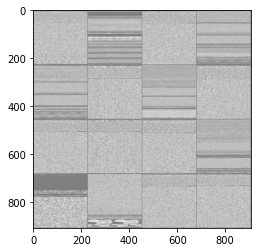

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

In [ ]:
device = torch.device("cuda")  # device = torch.device("cuda")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(224*224, 1000)
        self.fc21 = nn.Linear(1000, 100)
        self.fc22 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 1000)
        self.fc4 = nn.Linear(1000, 224*224)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 224*224))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-5)  # Exp03. Chage it 1e-3 to 1e-5
print(model)

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)


In [ ]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 224*224), reduction='mean')  # changed reduction to 'mean' 
                                                                                  # (input, target, ... reduction)

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

Epoch_Loss = {'train_epoch':[],
              'train_loss':[],
              'test_epoch':[],
              'test_loss':[]}

# Save & Loading Model for Inference
# Reference: https://pytorch.org/tutorials/beginner/saving_loading_models.html
PATH = './results_Exp03/Exp03_10-Epoch.pth'

def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    # plt.plot(train_loss / len(train_loader.dataset))
    Epoch_Loss['train_epoch'].append(epoch)
    Epoch_Loss['train_loss'].append(train_loss / len(train_loader.dataset))
    torch.save(model.state_dict(), PATH)


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(16, 1, 224, 224)[:n]])
                save_image(comparison.cpu(),
                         './results_Exp03/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    # plt.plot(test_loss)
    Epoch_Loss['test_epoch'].append(epoch)
    Epoch_Loss['test_loss'].append(test_loss)

In [ ]:
'''
plt.plot(Epoch_Loss['train_epoch'],Epoch_Loss['train_loss'], label="train_loss")
plt.plot(Epoch_Loss['test_epoch'],Epoch_Loss['test_loss'], label="test_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.title('Train_Test_Loss')
plt.legend()
plt.savefig('./plot_Exp03/'+str(1000000)+'_epoch.png', dpi=300)
plt.show()
'''

'\nplt.plot(Epoch_Loss[\'train_epoch\'],Epoch_Loss[\'train_loss\'], label="train_loss")\nplt.plot(Epoch_Loss[\'test_epoch\'],Epoch_Loss[\'test_loss\'], label="test_loss")\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Loss Score\')\nplt.title(\'Train_Test_Loss\')\nplt.legend()\nplt.savefig(\'./plot_Exp03/\'+str(1000000)+\'_epoch.png\', dpi=300)\nplt.show()\n'

1
Train Epoch: 1 [0/7471 (0%)]	Loss: 0.867902
Train Epoch: 1 [160/7471 (2%)]	Loss: 0.113820
Train Epoch: 1 [320/7471 (4%)]	Loss: 0.072674
Train Epoch: 1 [480/7471 (6%)]	Loss: 0.062939
Train Epoch: 1 [640/7471 (9%)]	Loss: 0.060122
Train Epoch: 1 [800/7471 (11%)]	Loss: 0.060089
Train Epoch: 1 [960/7471 (13%)]	Loss: 0.059142
Train Epoch: 1 [1120/7471 (15%)]	Loss: 0.058972
Train Epoch: 1 [1280/7471 (17%)]	Loss: 0.058265
Train Epoch: 1 [1440/7471 (19%)]	Loss: 0.056346
Train Epoch: 1 [1600/7471 (21%)]	Loss: 0.056702
Train Epoch: 1 [1760/7471 (24%)]	Loss: 0.057007
Train Epoch: 1 [1920/7471 (26%)]	Loss: 0.055526
Train Epoch: 1 [2080/7471 (28%)]	Loss: 0.056561
Train Epoch: 1 [2240/7471 (30%)]	Loss: 0.055084
Train Epoch: 1 [2400/7471 (32%)]	Loss: 0.054845
Train Epoch: 1 [2560/7471 (34%)]	Loss: 0.053636
Train Epoch: 1 [2720/7471 (36%)]	Loss: 0.054488
Train Epoch: 1 [2880/7471 (39%)]	Loss: 0.052772
Train Epoch: 1 [3040/7471 (41%)]	Loss: 0.052789
Train Epoch: 1 [3200/7471 (43%)]	Loss: 0.052101
Trai

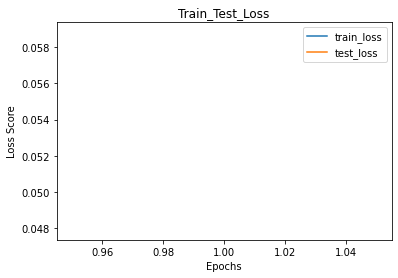

2
Train Epoch: 2 [0/7471 (0%)]	Loss: 0.046606
Train Epoch: 2 [160/7471 (2%)]	Loss: 0.047740
Train Epoch: 2 [320/7471 (4%)]	Loss: 0.046727
Train Epoch: 2 [480/7471 (6%)]	Loss: 0.047288
Train Epoch: 2 [640/7471 (9%)]	Loss: 0.045495
Train Epoch: 2 [800/7471 (11%)]	Loss: 0.048381
Train Epoch: 2 [960/7471 (13%)]	Loss: 0.048014
Train Epoch: 2 [1120/7471 (15%)]	Loss: 0.046468
Train Epoch: 2 [1280/7471 (17%)]	Loss: 0.046317
Train Epoch: 2 [1440/7471 (19%)]	Loss: 0.048036
Train Epoch: 2 [1600/7471 (21%)]	Loss: 0.046316
Train Epoch: 2 [1760/7471 (24%)]	Loss: 0.047098
Train Epoch: 2 [1920/7471 (26%)]	Loss: 0.045880
Train Epoch: 2 [2080/7471 (28%)]	Loss: 0.046590
Train Epoch: 2 [2240/7471 (30%)]	Loss: 0.048062
Train Epoch: 2 [2400/7471 (32%)]	Loss: 0.046764
Train Epoch: 2 [2560/7471 (34%)]	Loss: 0.046092
Train Epoch: 2 [2720/7471 (36%)]	Loss: 0.046674
Train Epoch: 2 [2880/7471 (39%)]	Loss: 0.047787
Train Epoch: 2 [3040/7471 (41%)]	Loss: 0.046419
Train Epoch: 2 [3200/7471 (43%)]	Loss: 0.047513
Trai

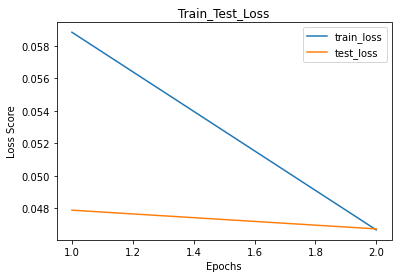

3
Train Epoch: 3 [0/7471 (0%)]	Loss: 0.046575
Train Epoch: 3 [160/7471 (2%)]	Loss: 0.046417
Train Epoch: 3 [320/7471 (4%)]	Loss: 0.045697
Train Epoch: 3 [480/7471 (6%)]	Loss: 0.046696
Train Epoch: 3 [640/7471 (9%)]	Loss: 0.045620
Train Epoch: 3 [800/7471 (11%)]	Loss: 0.045607
Train Epoch: 3 [960/7471 (13%)]	Loss: 0.047259
Train Epoch: 3 [1120/7471 (15%)]	Loss: 0.046781
Train Epoch: 3 [1280/7471 (17%)]	Loss: 0.045035
Train Epoch: 3 [1440/7471 (19%)]	Loss: 0.045357
Train Epoch: 3 [1600/7471 (21%)]	Loss: 0.045918
Train Epoch: 3 [1760/7471 (24%)]	Loss: 0.044963
Train Epoch: 3 [1920/7471 (26%)]	Loss: 0.045924
Train Epoch: 3 [2080/7471 (28%)]	Loss: 0.045644
Train Epoch: 3 [2240/7471 (30%)]	Loss: 0.045435
Train Epoch: 3 [2400/7471 (32%)]	Loss: 0.045625
Train Epoch: 3 [2560/7471 (34%)]	Loss: 0.046097
Train Epoch: 3 [2720/7471 (36%)]	Loss: 0.046261
Train Epoch: 3 [2880/7471 (39%)]	Loss: 0.046449
Train Epoch: 3 [3040/7471 (41%)]	Loss: 0.046908
Train Epoch: 3 [3200/7471 (43%)]	Loss: 0.046116
Trai

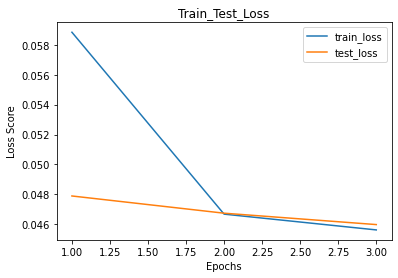

4
Train Epoch: 4 [0/7471 (0%)]	Loss: 0.045558
Train Epoch: 4 [160/7471 (2%)]	Loss: 0.046077
Train Epoch: 4 [320/7471 (4%)]	Loss: 0.045240
Train Epoch: 4 [480/7471 (6%)]	Loss: 0.044899
Train Epoch: 4 [640/7471 (9%)]	Loss: 0.044928
Train Epoch: 4 [800/7471 (11%)]	Loss: 0.044676
Train Epoch: 4 [960/7471 (13%)]	Loss: 0.045506
Train Epoch: 4 [1120/7471 (15%)]	Loss: 0.044566
Train Epoch: 4 [1280/7471 (17%)]	Loss: 0.045025
Train Epoch: 4 [1440/7471 (19%)]	Loss: 0.045454
Train Epoch: 4 [1600/7471 (21%)]	Loss: 0.045641
Train Epoch: 4 [1760/7471 (24%)]	Loss: 0.044045
Train Epoch: 4 [1920/7471 (26%)]	Loss: 0.045224
Train Epoch: 4 [2080/7471 (28%)]	Loss: 0.046472
Train Epoch: 4 [2240/7471 (30%)]	Loss: 0.045827
Train Epoch: 4 [2400/7471 (32%)]	Loss: 0.045501
Train Epoch: 4 [2560/7471 (34%)]	Loss: 0.045043
Train Epoch: 4 [2720/7471 (36%)]	Loss: 0.045470
Train Epoch: 4 [2880/7471 (39%)]	Loss: 0.045460
Train Epoch: 4 [3040/7471 (41%)]	Loss: 0.044783
Train Epoch: 4 [3200/7471 (43%)]	Loss: 0.044719
Trai

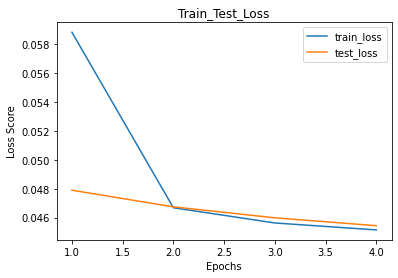

5
Train Epoch: 5 [0/7471 (0%)]	Loss: 0.045092
Train Epoch: 5 [160/7471 (2%)]	Loss: 0.044081
Train Epoch: 5 [320/7471 (4%)]	Loss: 0.044102
Train Epoch: 5 [480/7471 (6%)]	Loss: 0.044009
Train Epoch: 5 [640/7471 (9%)]	Loss: 0.045933
Train Epoch: 5 [800/7471 (11%)]	Loss: 0.045623
Train Epoch: 5 [960/7471 (13%)]	Loss: 0.044646
Train Epoch: 5 [1120/7471 (15%)]	Loss: 0.043569
Train Epoch: 5 [1280/7471 (17%)]	Loss: 0.045697
Train Epoch: 5 [1440/7471 (19%)]	Loss: 0.044679
Train Epoch: 5 [1600/7471 (21%)]	Loss: 0.044386
Train Epoch: 5 [1760/7471 (24%)]	Loss: 0.044731
Train Epoch: 5 [1920/7471 (26%)]	Loss: 0.043990
Train Epoch: 5 [2080/7471 (28%)]	Loss: 0.044080
Train Epoch: 5 [2240/7471 (30%)]	Loss: 0.044644
Train Epoch: 5 [2400/7471 (32%)]	Loss: 0.044753
Train Epoch: 5 [2560/7471 (34%)]	Loss: 0.044519
Train Epoch: 5 [2720/7471 (36%)]	Loss: 0.044552
Train Epoch: 5 [2880/7471 (39%)]	Loss: 0.043539
Train Epoch: 5 [3040/7471 (41%)]	Loss: 0.044216
Train Epoch: 5 [3200/7471 (43%)]	Loss: 0.044559
Trai

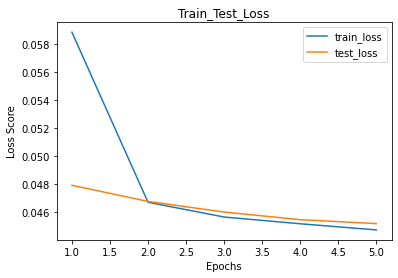

6
Train Epoch: 6 [0/7471 (0%)]	Loss: 0.044558
Train Epoch: 6 [160/7471 (2%)]	Loss: 0.044612
Train Epoch: 6 [320/7471 (4%)]	Loss: 0.044477
Train Epoch: 6 [480/7471 (6%)]	Loss: 0.044254
Train Epoch: 6 [640/7471 (9%)]	Loss: 0.044636
Train Epoch: 6 [800/7471 (11%)]	Loss: 0.044990
Train Epoch: 6 [960/7471 (13%)]	Loss: 0.044478
Train Epoch: 6 [1120/7471 (15%)]	Loss: 0.044452
Train Epoch: 6 [1280/7471 (17%)]	Loss: 0.044792
Train Epoch: 6 [1440/7471 (19%)]	Loss: 0.044282
Train Epoch: 6 [1600/7471 (21%)]	Loss: 0.044425
Train Epoch: 6 [1760/7471 (24%)]	Loss: 0.044082
Train Epoch: 6 [1920/7471 (26%)]	Loss: 0.043914
Train Epoch: 6 [2080/7471 (28%)]	Loss: 0.043815
Train Epoch: 6 [2240/7471 (30%)]	Loss: 0.044439
Train Epoch: 6 [2400/7471 (32%)]	Loss: 0.045072
Train Epoch: 6 [2560/7471 (34%)]	Loss: 0.044594
Train Epoch: 6 [2720/7471 (36%)]	Loss: 0.045006
Train Epoch: 6 [2880/7471 (39%)]	Loss: 0.045432
Train Epoch: 6 [3040/7471 (41%)]	Loss: 0.043955
Train Epoch: 6 [3200/7471 (43%)]	Loss: 0.045147
Trai

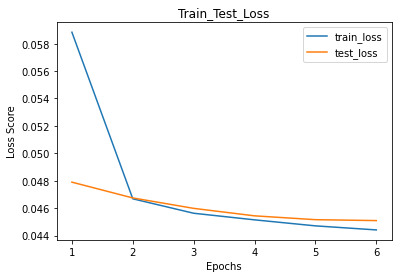

7
Train Epoch: 7 [0/7471 (0%)]	Loss: 0.045090
Train Epoch: 7 [160/7471 (2%)]	Loss: 0.044183
Train Epoch: 7 [320/7471 (4%)]	Loss: 0.044867
Train Epoch: 7 [480/7471 (6%)]	Loss: 0.044485
Train Epoch: 7 [640/7471 (9%)]	Loss: 0.044491
Train Epoch: 7 [800/7471 (11%)]	Loss: 0.044914
Train Epoch: 7 [960/7471 (13%)]	Loss: 0.044033
Train Epoch: 7 [1120/7471 (15%)]	Loss: 0.044790
Train Epoch: 7 [1280/7471 (17%)]	Loss: 0.044734
Train Epoch: 7 [1440/7471 (19%)]	Loss: 0.044958
Train Epoch: 7 [1600/7471 (21%)]	Loss: 0.044279
Train Epoch: 7 [1760/7471 (24%)]	Loss: 0.044151
Train Epoch: 7 [1920/7471 (26%)]	Loss: 0.043242
Train Epoch: 7 [2080/7471 (28%)]	Loss: 0.044481
Train Epoch: 7 [2240/7471 (30%)]	Loss: 0.044615
Train Epoch: 7 [2400/7471 (32%)]	Loss: 0.043251
Train Epoch: 7 [2560/7471 (34%)]	Loss: 0.043899
Train Epoch: 7 [2720/7471 (36%)]	Loss: 0.043639
Train Epoch: 7 [2880/7471 (39%)]	Loss: 0.043649
Train Epoch: 7 [3040/7471 (41%)]	Loss: 0.044641
Train Epoch: 7 [3200/7471 (43%)]	Loss: 0.044353
Trai

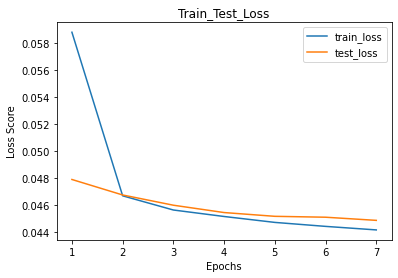

8
Train Epoch: 8 [0/7471 (0%)]	Loss: 0.043932
Train Epoch: 8 [160/7471 (2%)]	Loss: 0.044021
Train Epoch: 8 [320/7471 (4%)]	Loss: 0.044303
Train Epoch: 8 [480/7471 (6%)]	Loss: 0.043783
Train Epoch: 8 [640/7471 (9%)]	Loss: 0.044900
Train Epoch: 8 [800/7471 (11%)]	Loss: 0.044233
Train Epoch: 8 [960/7471 (13%)]	Loss: 0.043601
Train Epoch: 8 [1120/7471 (15%)]	Loss: 0.043905
Train Epoch: 8 [1280/7471 (17%)]	Loss: 0.044009
Train Epoch: 8 [1440/7471 (19%)]	Loss: 0.043679
Train Epoch: 8 [1600/7471 (21%)]	Loss: 0.044812
Train Epoch: 8 [1760/7471 (24%)]	Loss: 0.044375
Train Epoch: 8 [1920/7471 (26%)]	Loss: 0.044472
Train Epoch: 8 [2080/7471 (28%)]	Loss: 0.043554
Train Epoch: 8 [2240/7471 (30%)]	Loss: 0.043698
Train Epoch: 8 [2400/7471 (32%)]	Loss: 0.044223
Train Epoch: 8 [2560/7471 (34%)]	Loss: 0.043763
Train Epoch: 8 [2720/7471 (36%)]	Loss: 0.043147
Train Epoch: 8 [2880/7471 (39%)]	Loss: 0.044092
Train Epoch: 8 [3040/7471 (41%)]	Loss: 0.043951
Train Epoch: 8 [3200/7471 (43%)]	Loss: 0.044035
Trai

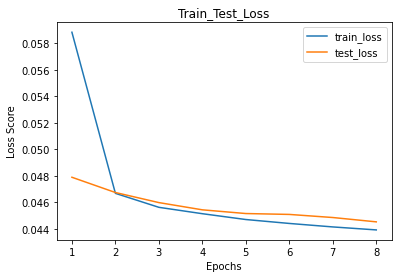

9
Train Epoch: 9 [0/7471 (0%)]	Loss: 0.043878
Train Epoch: 9 [160/7471 (2%)]	Loss: 0.043686
Train Epoch: 9 [320/7471 (4%)]	Loss: 0.044073
Train Epoch: 9 [480/7471 (6%)]	Loss: 0.043686
Train Epoch: 9 [640/7471 (9%)]	Loss: 0.043362
Train Epoch: 9 [800/7471 (11%)]	Loss: 0.044165
Train Epoch: 9 [960/7471 (13%)]	Loss: 0.043472
Train Epoch: 9 [1120/7471 (15%)]	Loss: 0.043441
Train Epoch: 9 [1280/7471 (17%)]	Loss: 0.043384
Train Epoch: 9 [1440/7471 (19%)]	Loss: 0.043769
Train Epoch: 9 [1600/7471 (21%)]	Loss: 0.043865
Train Epoch: 9 [1760/7471 (24%)]	Loss: 0.043378
Train Epoch: 9 [1920/7471 (26%)]	Loss: 0.043694
Train Epoch: 9 [2080/7471 (28%)]	Loss: 0.043571
Train Epoch: 9 [2240/7471 (30%)]	Loss: 0.043800
Train Epoch: 9 [2400/7471 (32%)]	Loss: 0.043563
Train Epoch: 9 [2560/7471 (34%)]	Loss: 0.043416
Train Epoch: 9 [2720/7471 (36%)]	Loss: 0.043949
Train Epoch: 9 [2880/7471 (39%)]	Loss: 0.043968
Train Epoch: 9 [3040/7471 (41%)]	Loss: 0.043733
Train Epoch: 9 [3200/7471 (43%)]	Loss: 0.044460
Trai

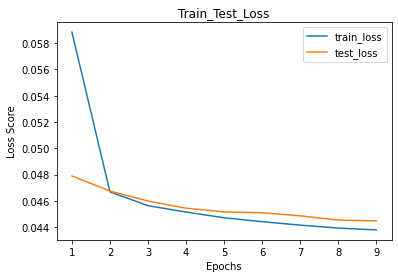

10
Train Epoch: 10 [0/7471 (0%)]	Loss: 0.043700
Train Epoch: 10 [160/7471 (2%)]	Loss: 0.043823
Train Epoch: 10 [320/7471 (4%)]	Loss: 0.043895
Train Epoch: 10 [480/7471 (6%)]	Loss: 0.043198
Train Epoch: 10 [640/7471 (9%)]	Loss: 0.043232
Train Epoch: 10 [800/7471 (11%)]	Loss: 0.043778
Train Epoch: 10 [960/7471 (13%)]	Loss: 0.043328
Train Epoch: 10 [1120/7471 (15%)]	Loss: 0.043822
Train Epoch: 10 [1280/7471 (17%)]	Loss: 0.043085
Train Epoch: 10 [1440/7471 (19%)]	Loss: 0.043511
Train Epoch: 10 [1600/7471 (21%)]	Loss: 0.043570
Train Epoch: 10 [1760/7471 (24%)]	Loss: 0.043443
Train Epoch: 10 [1920/7471 (26%)]	Loss: 0.043836
Train Epoch: 10 [2080/7471 (28%)]	Loss: 0.043344
Train Epoch: 10 [2240/7471 (30%)]	Loss: 0.044054
Train Epoch: 10 [2400/7471 (32%)]	Loss: 0.043902
Train Epoch: 10 [2560/7471 (34%)]	Loss: 0.044097
Train Epoch: 10 [2720/7471 (36%)]	Loss: 0.043716
Train Epoch: 10 [2880/7471 (39%)]	Loss: 0.044046
Train Epoch: 10 [3040/7471 (41%)]	Loss: 0.043917
Train Epoch: 10 [3200/7471 (43%

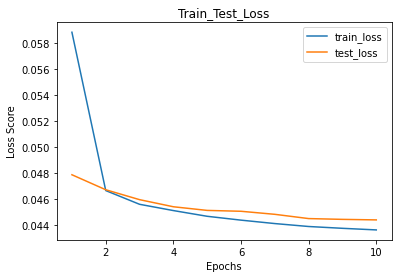

11
Train Epoch: 11 [0/7471 (0%)]	Loss: 0.043492
Train Epoch: 11 [160/7471 (2%)]	Loss: 0.043423
Train Epoch: 11 [320/7471 (4%)]	Loss: 0.043437
Train Epoch: 11 [480/7471 (6%)]	Loss: 0.043222
Train Epoch: 11 [640/7471 (9%)]	Loss: 0.043586
Train Epoch: 11 [800/7471 (11%)]	Loss: 0.044141
Train Epoch: 11 [960/7471 (13%)]	Loss: 0.044128
Train Epoch: 11 [1120/7471 (15%)]	Loss: 0.043692
Train Epoch: 11 [1280/7471 (17%)]	Loss: 0.043328
Train Epoch: 11 [1440/7471 (19%)]	Loss: 0.043354
Train Epoch: 11 [1600/7471 (21%)]	Loss: 0.043301
Train Epoch: 11 [1760/7471 (24%)]	Loss: 0.043632
Train Epoch: 11 [1920/7471 (26%)]	Loss: 0.043848
Train Epoch: 11 [2080/7471 (28%)]	Loss: 0.044306
Train Epoch: 11 [2240/7471 (30%)]	Loss: 0.043432
Train Epoch: 11 [2400/7471 (32%)]	Loss: 0.043366
Train Epoch: 11 [2560/7471 (34%)]	Loss: 0.043771
Train Epoch: 11 [2720/7471 (36%)]	Loss: 0.043902
Train Epoch: 11 [2880/7471 (39%)]	Loss: 0.043569
Train Epoch: 11 [3040/7471 (41%)]	Loss: 0.043108
Train Epoch: 11 [3200/7471 (43%

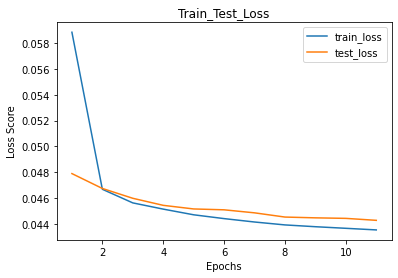

12
Train Epoch: 12 [0/7471 (0%)]	Loss: 0.043467
Train Epoch: 12 [160/7471 (2%)]	Loss: 0.043222
Train Epoch: 12 [320/7471 (4%)]	Loss: 0.043389
Train Epoch: 12 [480/7471 (6%)]	Loss: 0.043174
Train Epoch: 12 [640/7471 (9%)]	Loss: 0.043621
Train Epoch: 12 [800/7471 (11%)]	Loss: 0.043233
Train Epoch: 12 [960/7471 (13%)]	Loss: 0.043322
Train Epoch: 12 [1120/7471 (15%)]	Loss: 0.043734
Train Epoch: 12 [1280/7471 (17%)]	Loss: 0.043489
Train Epoch: 12 [1440/7471 (19%)]	Loss: 0.043603
Train Epoch: 12 [1600/7471 (21%)]	Loss: 0.043391
Train Epoch: 12 [1760/7471 (24%)]	Loss: 0.043651
Train Epoch: 12 [1920/7471 (26%)]	Loss: 0.043650
Train Epoch: 12 [2080/7471 (28%)]	Loss: 0.043035
Train Epoch: 12 [2240/7471 (30%)]	Loss: 0.043643
Train Epoch: 12 [2400/7471 (32%)]	Loss: 0.043454
Train Epoch: 12 [2560/7471 (34%)]	Loss: 0.043714
Train Epoch: 12 [2720/7471 (36%)]	Loss: 0.043445
Train Epoch: 12 [2880/7471 (39%)]	Loss: 0.043786
Train Epoch: 12 [3040/7471 (41%)]	Loss: 0.043212
Train Epoch: 12 [3200/7471 (43%

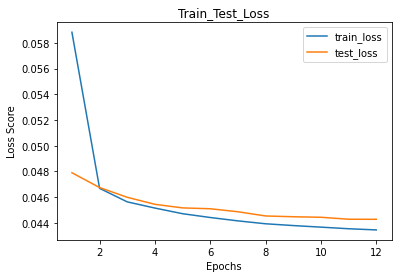

13
Train Epoch: 13 [0/7471 (0%)]	Loss: 0.043762
Train Epoch: 13 [160/7471 (2%)]	Loss: 0.043307
Train Epoch: 13 [320/7471 (4%)]	Loss: 0.043100
Train Epoch: 13 [480/7471 (6%)]	Loss: 0.043359
Train Epoch: 13 [640/7471 (9%)]	Loss: 0.043227
Train Epoch: 13 [800/7471 (11%)]	Loss: 0.043471
Train Epoch: 13 [960/7471 (13%)]	Loss: 0.043445
Train Epoch: 13 [1120/7471 (15%)]	Loss: 0.043465
Train Epoch: 13 [1280/7471 (17%)]	Loss: 0.042912
Train Epoch: 13 [1440/7471 (19%)]	Loss: 0.043306
Train Epoch: 13 [1600/7471 (21%)]	Loss: 0.043035
Train Epoch: 13 [1760/7471 (24%)]	Loss: 0.043612
Train Epoch: 13 [1920/7471 (26%)]	Loss: 0.043927
Train Epoch: 13 [2080/7471 (28%)]	Loss: 0.043488
Train Epoch: 13 [2240/7471 (30%)]	Loss: 0.043282
Train Epoch: 13 [2400/7471 (32%)]	Loss: 0.043330
Train Epoch: 13 [2560/7471 (34%)]	Loss: 0.043711
Train Epoch: 13 [2720/7471 (36%)]	Loss: 0.043547
Train Epoch: 13 [2880/7471 (39%)]	Loss: 0.043584
Train Epoch: 13 [3040/7471 (41%)]	Loss: 0.043534
Train Epoch: 13 [3200/7471 (43%

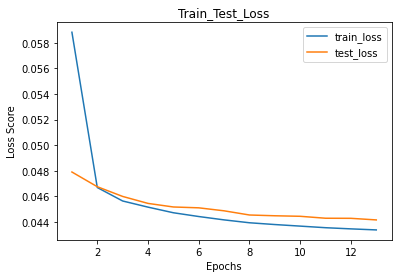

14
Train Epoch: 14 [0/7471 (0%)]	Loss: 0.043323
Train Epoch: 14 [160/7471 (2%)]	Loss: 0.043373
Train Epoch: 14 [320/7471 (4%)]	Loss: 0.043221
Train Epoch: 14 [480/7471 (6%)]	Loss: 0.043007
Train Epoch: 14 [640/7471 (9%)]	Loss: 0.043262
Train Epoch: 14 [800/7471 (11%)]	Loss: 0.043657
Train Epoch: 14 [960/7471 (13%)]	Loss: 0.043237
Train Epoch: 14 [1120/7471 (15%)]	Loss: 0.043007
Train Epoch: 14 [1280/7471 (17%)]	Loss: 0.043742
Train Epoch: 14 [1440/7471 (19%)]	Loss: 0.042968
Train Epoch: 14 [1600/7471 (21%)]	Loss: 0.043282
Train Epoch: 14 [1760/7471 (24%)]	Loss: 0.043384
Train Epoch: 14 [1920/7471 (26%)]	Loss: 0.043187
Train Epoch: 14 [2080/7471 (28%)]	Loss: 0.043197
Train Epoch: 14 [2240/7471 (30%)]	Loss: 0.043123
Train Epoch: 14 [2400/7471 (32%)]	Loss: 0.042862
Train Epoch: 14 [2560/7471 (34%)]	Loss: 0.043188
Train Epoch: 14 [2720/7471 (36%)]	Loss: 0.043319
Train Epoch: 14 [2880/7471 (39%)]	Loss: 0.043480
Train Epoch: 14 [3040/7471 (41%)]	Loss: 0.042972
Train Epoch: 14 [3200/7471 (43%

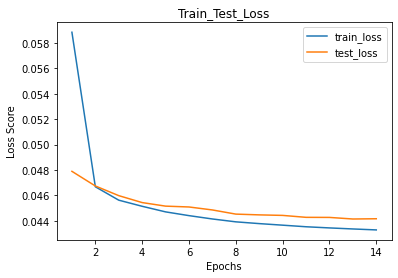

15
Train Epoch: 15 [0/7471 (0%)]	Loss: 0.043274
Train Epoch: 15 [160/7471 (2%)]	Loss: 0.043263
Train Epoch: 15 [320/7471 (4%)]	Loss: 0.043542
Train Epoch: 15 [480/7471 (6%)]	Loss: 0.043505
Train Epoch: 15 [640/7471 (9%)]	Loss: 0.043028
Train Epoch: 15 [800/7471 (11%)]	Loss: 0.043513
Train Epoch: 15 [960/7471 (13%)]	Loss: 0.042961
Train Epoch: 15 [1120/7471 (15%)]	Loss: 0.042930
Train Epoch: 15 [1280/7471 (17%)]	Loss: 0.043182
Train Epoch: 15 [1440/7471 (19%)]	Loss: 0.043579
Train Epoch: 15 [1600/7471 (21%)]	Loss: 0.043711
Train Epoch: 15 [1760/7471 (24%)]	Loss: 0.043232
Train Epoch: 15 [1920/7471 (26%)]	Loss: 0.043317
Train Epoch: 15 [2080/7471 (28%)]	Loss: 0.043312
Train Epoch: 15 [2240/7471 (30%)]	Loss: 0.043363
Train Epoch: 15 [2400/7471 (32%)]	Loss: 0.043345
Train Epoch: 15 [2560/7471 (34%)]	Loss: 0.042877
Train Epoch: 15 [2720/7471 (36%)]	Loss: 0.043149
Train Epoch: 15 [2880/7471 (39%)]	Loss: 0.043088
Train Epoch: 15 [3040/7471 (41%)]	Loss: 0.043555
Train Epoch: 15 [3200/7471 (43%

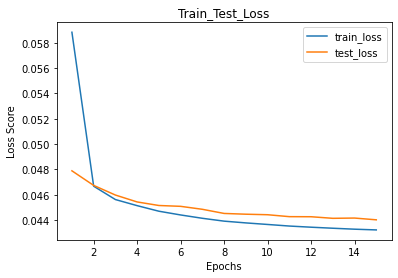

16
Train Epoch: 16 [0/7471 (0%)]	Loss: 0.043166
Train Epoch: 16 [160/7471 (2%)]	Loss: 0.042999
Train Epoch: 16 [320/7471 (4%)]	Loss: 0.043259
Train Epoch: 16 [480/7471 (6%)]	Loss: 0.042968
Train Epoch: 16 [640/7471 (9%)]	Loss: 0.043543
Train Epoch: 16 [800/7471 (11%)]	Loss: 0.043636
Train Epoch: 16 [960/7471 (13%)]	Loss: 0.043062
Train Epoch: 16 [1120/7471 (15%)]	Loss: 0.043558
Train Epoch: 16 [1280/7471 (17%)]	Loss: 0.043127
Train Epoch: 16 [1440/7471 (19%)]	Loss: 0.043363
Train Epoch: 16 [1600/7471 (21%)]	Loss: 0.042867
Train Epoch: 16 [1760/7471 (24%)]	Loss: 0.043294
Train Epoch: 16 [1920/7471 (26%)]	Loss: 0.043570
Train Epoch: 16 [2080/7471 (28%)]	Loss: 0.042854
Train Epoch: 16 [2240/7471 (30%)]	Loss: 0.043940
Train Epoch: 16 [2400/7471 (32%)]	Loss: 0.043174
Train Epoch: 16 [2560/7471 (34%)]	Loss: 0.042889
Train Epoch: 16 [2720/7471 (36%)]	Loss: 0.042959
Train Epoch: 16 [2880/7471 (39%)]	Loss: 0.042871
Train Epoch: 16 [3040/7471 (41%)]	Loss: 0.043029
Train Epoch: 16 [3200/7471 (43%

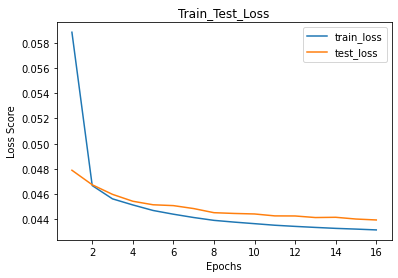

17
Train Epoch: 17 [0/7471 (0%)]	Loss: 0.043011
Train Epoch: 17 [160/7471 (2%)]	Loss: 0.042921
Train Epoch: 17 [320/7471 (4%)]	Loss: 0.042811
Train Epoch: 17 [480/7471 (6%)]	Loss: 0.042910
Train Epoch: 17 [640/7471 (9%)]	Loss: 0.043179
Train Epoch: 17 [800/7471 (11%)]	Loss: 0.043343
Train Epoch: 17 [960/7471 (13%)]	Loss: 0.043492
Train Epoch: 17 [1120/7471 (15%)]	Loss: 0.043443
Train Epoch: 17 [1280/7471 (17%)]	Loss: 0.043119
Train Epoch: 17 [1440/7471 (19%)]	Loss: 0.042663
Train Epoch: 17 [1600/7471 (21%)]	Loss: 0.042894
Train Epoch: 17 [1760/7471 (24%)]	Loss: 0.042970
Train Epoch: 17 [1920/7471 (26%)]	Loss: 0.043549
Train Epoch: 17 [2080/7471 (28%)]	Loss: 0.042872
Train Epoch: 17 [2240/7471 (30%)]	Loss: 0.043180
Train Epoch: 17 [2400/7471 (32%)]	Loss: 0.043330
Train Epoch: 17 [2560/7471 (34%)]	Loss: 0.043141
Train Epoch: 17 [2720/7471 (36%)]	Loss: 0.042820
Train Epoch: 17 [2880/7471 (39%)]	Loss: 0.042997
Train Epoch: 17 [3040/7471 (41%)]	Loss: 0.042718
Train Epoch: 17 [3200/7471 (43%

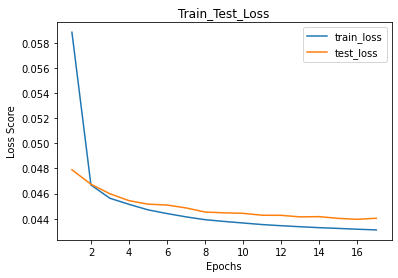

18
Train Epoch: 18 [0/7471 (0%)]	Loss: 0.043269
Train Epoch: 18 [160/7471 (2%)]	Loss: 0.043183
Train Epoch: 18 [320/7471 (4%)]	Loss: 0.043022
Train Epoch: 18 [480/7471 (6%)]	Loss: 0.043046
Train Epoch: 18 [640/7471 (9%)]	Loss: 0.042962
Train Epoch: 18 [800/7471 (11%)]	Loss: 0.043051
Train Epoch: 18 [960/7471 (13%)]	Loss: 0.042814
Train Epoch: 18 [1120/7471 (15%)]	Loss: 0.043520
Train Epoch: 18 [1280/7471 (17%)]	Loss: 0.042873
Train Epoch: 18 [1440/7471 (19%)]	Loss: 0.043091
Train Epoch: 18 [1600/7471 (21%)]	Loss: 0.042852
Train Epoch: 18 [1760/7471 (24%)]	Loss: 0.043079
Train Epoch: 18 [1920/7471 (26%)]	Loss: 0.042873
Train Epoch: 18 [2080/7471 (28%)]	Loss: 0.043241
Train Epoch: 18 [2240/7471 (30%)]	Loss: 0.043212
Train Epoch: 18 [2400/7471 (32%)]	Loss: 0.042799
Train Epoch: 18 [2560/7471 (34%)]	Loss: 0.042935
Train Epoch: 18 [2720/7471 (36%)]	Loss: 0.043181
Train Epoch: 18 [2880/7471 (39%)]	Loss: 0.042816
Train Epoch: 18 [3040/7471 (41%)]	Loss: 0.042315
Train Epoch: 18 [3200/7471 (43%

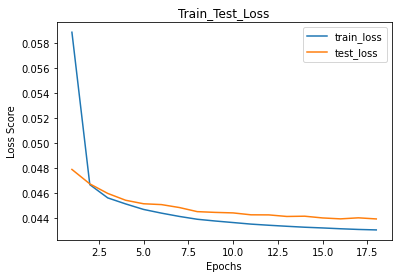

19
Train Epoch: 19 [0/7471 (0%)]	Loss: 0.043328
Train Epoch: 19 [160/7471 (2%)]	Loss: 0.043473
Train Epoch: 19 [320/7471 (4%)]	Loss: 0.042971
Train Epoch: 19 [480/7471 (6%)]	Loss: 0.043317
Train Epoch: 19 [640/7471 (9%)]	Loss: 0.042978
Train Epoch: 19 [800/7471 (11%)]	Loss: 0.042880
Train Epoch: 19 [960/7471 (13%)]	Loss: 0.043022
Train Epoch: 19 [1120/7471 (15%)]	Loss: 0.042828
Train Epoch: 19 [1280/7471 (17%)]	Loss: 0.042961
Train Epoch: 19 [1440/7471 (19%)]	Loss: 0.043217
Train Epoch: 19 [1600/7471 (21%)]	Loss: 0.042891
Train Epoch: 19 [1760/7471 (24%)]	Loss: 0.043401
Train Epoch: 19 [1920/7471 (26%)]	Loss: 0.042707
Train Epoch: 19 [2080/7471 (28%)]	Loss: 0.042885
Train Epoch: 19 [2240/7471 (30%)]	Loss: 0.043086
Train Epoch: 19 [2400/7471 (32%)]	Loss: 0.042403
Train Epoch: 19 [2560/7471 (34%)]	Loss: 0.043006
Train Epoch: 19 [2720/7471 (36%)]	Loss: 0.043067
Train Epoch: 19 [2880/7471 (39%)]	Loss: 0.042879
Train Epoch: 19 [3040/7471 (41%)]	Loss: 0.043119
Train Epoch: 19 [3200/7471 (43%

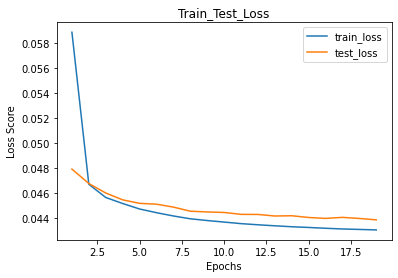

20
Train Epoch: 20 [0/7471 (0%)]	Loss: 0.043147
Train Epoch: 20 [160/7471 (2%)]	Loss: 0.043214
Train Epoch: 20 [320/7471 (4%)]	Loss: 0.042921
Train Epoch: 20 [480/7471 (6%)]	Loss: 0.043666
Train Epoch: 20 [640/7471 (9%)]	Loss: 0.042921
Train Epoch: 20 [800/7471 (11%)]	Loss: 0.043541
Train Epoch: 20 [960/7471 (13%)]	Loss: 0.042774
Train Epoch: 20 [1120/7471 (15%)]	Loss: 0.043506
Train Epoch: 20 [1280/7471 (17%)]	Loss: 0.042504
Train Epoch: 20 [1440/7471 (19%)]	Loss: 0.043419
Train Epoch: 20 [1600/7471 (21%)]	Loss: 0.043261
Train Epoch: 20 [1760/7471 (24%)]	Loss: 0.042547
Train Epoch: 20 [1920/7471 (26%)]	Loss: 0.043429
Train Epoch: 20 [2080/7471 (28%)]	Loss: 0.042955
Train Epoch: 20 [2240/7471 (30%)]	Loss: 0.043171
Train Epoch: 20 [2400/7471 (32%)]	Loss: 0.042916
Train Epoch: 20 [2560/7471 (34%)]	Loss: 0.043413
Train Epoch: 20 [2720/7471 (36%)]	Loss: 0.043254
Train Epoch: 20 [2880/7471 (39%)]	Loss: 0.042685
Train Epoch: 20 [3040/7471 (41%)]	Loss: 0.043309
Train Epoch: 20 [3200/7471 (43%

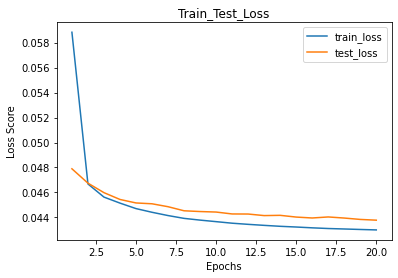

21
Train Epoch: 21 [0/7471 (0%)]	Loss: 0.043208
Train Epoch: 21 [160/7471 (2%)]	Loss: 0.043216
Train Epoch: 21 [320/7471 (4%)]	Loss: 0.043022
Train Epoch: 21 [480/7471 (6%)]	Loss: 0.043425
Train Epoch: 21 [640/7471 (9%)]	Loss: 0.042571
Train Epoch: 21 [800/7471 (11%)]	Loss: 0.042914
Train Epoch: 21 [960/7471 (13%)]	Loss: 0.042668
Train Epoch: 21 [1120/7471 (15%)]	Loss: 0.042764
Train Epoch: 21 [1280/7471 (17%)]	Loss: 0.043009
Train Epoch: 21 [1440/7471 (19%)]	Loss: 0.042842
Train Epoch: 21 [1600/7471 (21%)]	Loss: 0.043130
Train Epoch: 21 [1760/7471 (24%)]	Loss: 0.043069
Train Epoch: 21 [1920/7471 (26%)]	Loss: 0.043048
Train Epoch: 21 [2080/7471 (28%)]	Loss: 0.043326
Train Epoch: 21 [2240/7471 (30%)]	Loss: 0.043077
Train Epoch: 21 [2400/7471 (32%)]	Loss: 0.042632
Train Epoch: 21 [2560/7471 (34%)]	Loss: 0.043130
Train Epoch: 21 [2720/7471 (36%)]	Loss: 0.042932
Train Epoch: 21 [2880/7471 (39%)]	Loss: 0.042748
Train Epoch: 21 [3040/7471 (41%)]	Loss: 0.042862
Train Epoch: 21 [3200/7471 (43%

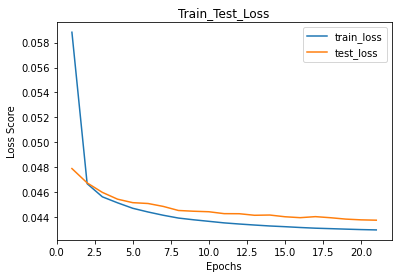

22
Train Epoch: 22 [0/7471 (0%)]	Loss: 0.042347
Train Epoch: 22 [160/7471 (2%)]	Loss: 0.042612
Train Epoch: 22 [320/7471 (4%)]	Loss: 0.042569
Train Epoch: 22 [480/7471 (6%)]	Loss: 0.042777
Train Epoch: 22 [640/7471 (9%)]	Loss: 0.042783
Train Epoch: 22 [800/7471 (11%)]	Loss: 0.042595
Train Epoch: 22 [960/7471 (13%)]	Loss: 0.042434
Train Epoch: 22 [1120/7471 (15%)]	Loss: 0.042757
Train Epoch: 22 [1280/7471 (17%)]	Loss: 0.042819
Train Epoch: 22 [1440/7471 (19%)]	Loss: 0.042479
Train Epoch: 22 [1600/7471 (21%)]	Loss: 0.042701
Train Epoch: 22 [1760/7471 (24%)]	Loss: 0.042942
Train Epoch: 22 [1920/7471 (26%)]	Loss: 0.043278
Train Epoch: 22 [2080/7471 (28%)]	Loss: 0.042501
Train Epoch: 22 [2240/7471 (30%)]	Loss: 0.042680
Train Epoch: 22 [2400/7471 (32%)]	Loss: 0.043194
Train Epoch: 22 [2560/7471 (34%)]	Loss: 0.042964
Train Epoch: 22 [2720/7471 (36%)]	Loss: 0.042774
Train Epoch: 22 [2880/7471 (39%)]	Loss: 0.042834
Train Epoch: 22 [3040/7471 (41%)]	Loss: 0.043086
Train Epoch: 22 [3200/7471 (43%

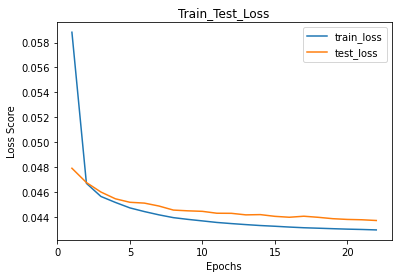

23
Train Epoch: 23 [0/7471 (0%)]	Loss: 0.042821
Train Epoch: 23 [160/7471 (2%)]	Loss: 0.042607
Train Epoch: 23 [320/7471 (4%)]	Loss: 0.042975
Train Epoch: 23 [480/7471 (6%)]	Loss: 0.043449
Train Epoch: 23 [640/7471 (9%)]	Loss: 0.043129
Train Epoch: 23 [800/7471 (11%)]	Loss: 0.042872
Train Epoch: 23 [960/7471 (13%)]	Loss: 0.042856
Train Epoch: 23 [1120/7471 (15%)]	Loss: 0.041913
Train Epoch: 23 [1280/7471 (17%)]	Loss: 0.043029
Train Epoch: 23 [1440/7471 (19%)]	Loss: 0.043336
Train Epoch: 23 [1600/7471 (21%)]	Loss: 0.042775
Train Epoch: 23 [1760/7471 (24%)]	Loss: 0.042791
Train Epoch: 23 [1920/7471 (26%)]	Loss: 0.043007
Train Epoch: 23 [2080/7471 (28%)]	Loss: 0.043001
Train Epoch: 23 [2240/7471 (30%)]	Loss: 0.042473
Train Epoch: 23 [2400/7471 (32%)]	Loss: 0.043299
Train Epoch: 23 [2560/7471 (34%)]	Loss: 0.042603
Train Epoch: 23 [2720/7471 (36%)]	Loss: 0.043620
Train Epoch: 23 [2880/7471 (39%)]	Loss: 0.042692
Train Epoch: 23 [3040/7471 (41%)]	Loss: 0.042802
Train Epoch: 23 [3200/7471 (43%

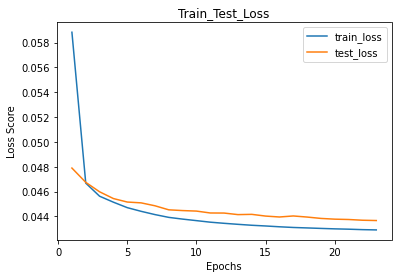

24
Train Epoch: 24 [0/7471 (0%)]	Loss: 0.043013
Train Epoch: 24 [160/7471 (2%)]	Loss: 0.042717
Train Epoch: 24 [320/7471 (4%)]	Loss: 0.042704
Train Epoch: 24 [480/7471 (6%)]	Loss: 0.042576
Train Epoch: 24 [640/7471 (9%)]	Loss: 0.042703
Train Epoch: 24 [800/7471 (11%)]	Loss: 0.043096
Train Epoch: 24 [960/7471 (13%)]	Loss: 0.043197
Train Epoch: 24 [1120/7471 (15%)]	Loss: 0.042647
Train Epoch: 24 [1280/7471 (17%)]	Loss: 0.042813
Train Epoch: 24 [1440/7471 (19%)]	Loss: 0.042833
Train Epoch: 24 [1600/7471 (21%)]	Loss: 0.042907
Train Epoch: 24 [1760/7471 (24%)]	Loss: 0.042925
Train Epoch: 24 [1920/7471 (26%)]	Loss: 0.042844
Train Epoch: 24 [2080/7471 (28%)]	Loss: 0.042902
Train Epoch: 24 [2240/7471 (30%)]	Loss: 0.042711
Train Epoch: 24 [2400/7471 (32%)]	Loss: 0.043137
Train Epoch: 24 [2560/7471 (34%)]	Loss: 0.042945
Train Epoch: 24 [2720/7471 (36%)]	Loss: 0.042861
Train Epoch: 24 [2880/7471 (39%)]	Loss: 0.042822
Train Epoch: 24 [3040/7471 (41%)]	Loss: 0.043100
Train Epoch: 24 [3200/7471 (43%

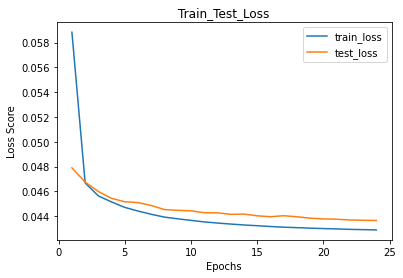

25
Train Epoch: 25 [0/7471 (0%)]	Loss: 0.043266
Train Epoch: 25 [160/7471 (2%)]	Loss: 0.043410
Train Epoch: 25 [320/7471 (4%)]	Loss: 0.042691
Train Epoch: 25 [480/7471 (6%)]	Loss: 0.042776
Train Epoch: 25 [640/7471 (9%)]	Loss: 0.042683
Train Epoch: 25 [800/7471 (11%)]	Loss: 0.043263
Train Epoch: 25 [960/7471 (13%)]	Loss: 0.042583
Train Epoch: 25 [1120/7471 (15%)]	Loss: 0.042621
Train Epoch: 25 [1280/7471 (17%)]	Loss: 0.042823
Train Epoch: 25 [1440/7471 (19%)]	Loss: 0.043185
Train Epoch: 25 [1600/7471 (21%)]	Loss: 0.042623
Train Epoch: 25 [1760/7471 (24%)]	Loss: 0.043202
Train Epoch: 25 [1920/7471 (26%)]	Loss: 0.042757
Train Epoch: 25 [2080/7471 (28%)]	Loss: 0.043158
Train Epoch: 25 [2240/7471 (30%)]	Loss: 0.042917
Train Epoch: 25 [2400/7471 (32%)]	Loss: 0.042681
Train Epoch: 25 [2560/7471 (34%)]	Loss: 0.042948
Train Epoch: 25 [2720/7471 (36%)]	Loss: 0.042894
Train Epoch: 25 [2880/7471 (39%)]	Loss: 0.042532
Train Epoch: 25 [3040/7471 (41%)]	Loss: 0.042636
Train Epoch: 25 [3200/7471 (43%

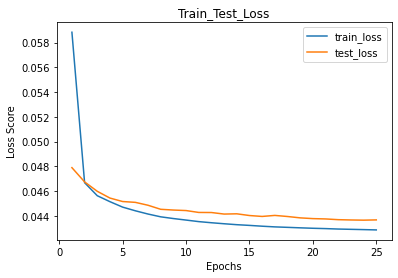

26
Train Epoch: 26 [0/7471 (0%)]	Loss: 0.042728
Train Epoch: 26 [160/7471 (2%)]	Loss: 0.042930
Train Epoch: 26 [320/7471 (4%)]	Loss: 0.042740
Train Epoch: 26 [480/7471 (6%)]	Loss: 0.042462
Train Epoch: 26 [640/7471 (9%)]	Loss: 0.042536
Train Epoch: 26 [800/7471 (11%)]	Loss: 0.042895
Train Epoch: 26 [960/7471 (13%)]	Loss: 0.043163
Train Epoch: 26 [1120/7471 (15%)]	Loss: 0.042525
Train Epoch: 26 [1280/7471 (17%)]	Loss: 0.043147
Train Epoch: 26 [1440/7471 (19%)]	Loss: 0.042757
Train Epoch: 26 [1600/7471 (21%)]	Loss: 0.042718
Train Epoch: 26 [1760/7471 (24%)]	Loss: 0.042998
Train Epoch: 26 [1920/7471 (26%)]	Loss: 0.042765
Train Epoch: 26 [2080/7471 (28%)]	Loss: 0.042644
Train Epoch: 26 [2240/7471 (30%)]	Loss: 0.043156
Train Epoch: 26 [2400/7471 (32%)]	Loss: 0.043048
Train Epoch: 26 [2560/7471 (34%)]	Loss: 0.042948
Train Epoch: 26 [2720/7471 (36%)]	Loss: 0.042531
Train Epoch: 26 [2880/7471 (39%)]	Loss: 0.042738
Train Epoch: 26 [3040/7471 (41%)]	Loss: 0.042560
Train Epoch: 26 [3200/7471 (43%

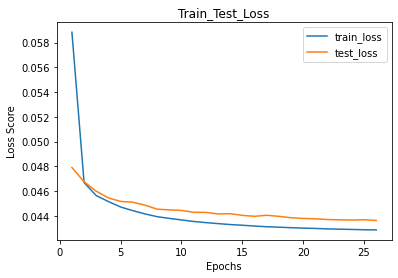

27
Train Epoch: 27 [0/7471 (0%)]	Loss: 0.043039
Train Epoch: 27 [160/7471 (2%)]	Loss: 0.042962
Train Epoch: 27 [320/7471 (4%)]	Loss: 0.042784
Train Epoch: 27 [480/7471 (6%)]	Loss: 0.043125
Train Epoch: 27 [640/7471 (9%)]	Loss: 0.042871
Train Epoch: 27 [800/7471 (11%)]	Loss: 0.042671
Train Epoch: 27 [960/7471 (13%)]	Loss: 0.042848
Train Epoch: 27 [1120/7471 (15%)]	Loss: 0.042990
Train Epoch: 27 [1280/7471 (17%)]	Loss: 0.042855
Train Epoch: 27 [1440/7471 (19%)]	Loss: 0.042911
Train Epoch: 27 [1600/7471 (21%)]	Loss: 0.042885
Train Epoch: 27 [1760/7471 (24%)]	Loss: 0.042687
Train Epoch: 27 [1920/7471 (26%)]	Loss: 0.042815
Train Epoch: 27 [2080/7471 (28%)]	Loss: 0.042700
Train Epoch: 27 [2240/7471 (30%)]	Loss: 0.042837
Train Epoch: 27 [2400/7471 (32%)]	Loss: 0.042816
Train Epoch: 27 [2560/7471 (34%)]	Loss: 0.042466
Train Epoch: 27 [2720/7471 (36%)]	Loss: 0.042973
Train Epoch: 27 [2880/7471 (39%)]	Loss: 0.042803
Train Epoch: 27 [3040/7471 (41%)]	Loss: 0.042615
Train Epoch: 27 [3200/7471 (43%

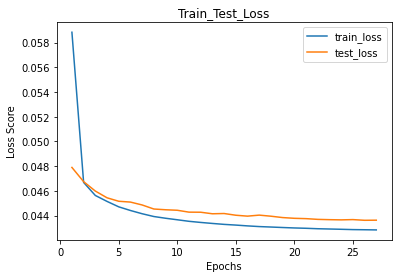

28
Train Epoch: 28 [0/7471 (0%)]	Loss: 0.042882
Train Epoch: 28 [160/7471 (2%)]	Loss: 0.043146
Train Epoch: 28 [320/7471 (4%)]	Loss: 0.043199
Train Epoch: 28 [480/7471 (6%)]	Loss: 0.042627
Train Epoch: 28 [640/7471 (9%)]	Loss: 0.043211
Train Epoch: 28 [800/7471 (11%)]	Loss: 0.042941
Train Epoch: 28 [960/7471 (13%)]	Loss: 0.042753
Train Epoch: 28 [1120/7471 (15%)]	Loss: 0.043017
Train Epoch: 28 [1280/7471 (17%)]	Loss: 0.042947
Train Epoch: 28 [1440/7471 (19%)]	Loss: 0.042682
Train Epoch: 28 [1600/7471 (21%)]	Loss: 0.042950
Train Epoch: 28 [1760/7471 (24%)]	Loss: 0.043047
Train Epoch: 28 [1920/7471 (26%)]	Loss: 0.043007
Train Epoch: 28 [2080/7471 (28%)]	Loss: 0.042951
Train Epoch: 28 [2240/7471 (30%)]	Loss: 0.043011
Train Epoch: 28 [2400/7471 (32%)]	Loss: 0.042972
Train Epoch: 28 [2560/7471 (34%)]	Loss: 0.043222
Train Epoch: 28 [2720/7471 (36%)]	Loss: 0.043203
Train Epoch: 28 [2880/7471 (39%)]	Loss: 0.042779
Train Epoch: 28 [3040/7471 (41%)]	Loss: 0.042307
Train Epoch: 28 [3200/7471 (43%

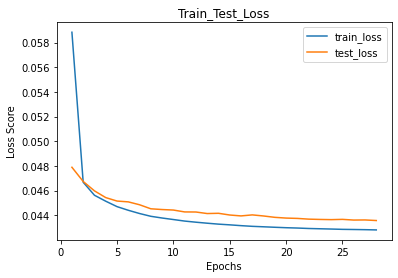

29
Train Epoch: 29 [0/7471 (0%)]	Loss: 0.043070
Train Epoch: 29 [160/7471 (2%)]	Loss: 0.042619
Train Epoch: 29 [320/7471 (4%)]	Loss: 0.042843
Train Epoch: 29 [480/7471 (6%)]	Loss: 0.042830
Train Epoch: 29 [640/7471 (9%)]	Loss: 0.042793
Train Epoch: 29 [800/7471 (11%)]	Loss: 0.042556
Train Epoch: 29 [960/7471 (13%)]	Loss: 0.042791
Train Epoch: 29 [1120/7471 (15%)]	Loss: 0.042668
Train Epoch: 29 [1280/7471 (17%)]	Loss: 0.042966
Train Epoch: 29 [1440/7471 (19%)]	Loss: 0.043061
Train Epoch: 29 [1600/7471 (21%)]	Loss: 0.042819
Train Epoch: 29 [1760/7471 (24%)]	Loss: 0.042873
Train Epoch: 29 [1920/7471 (26%)]	Loss: 0.042886
Train Epoch: 29 [2080/7471 (28%)]	Loss: 0.042565
Train Epoch: 29 [2240/7471 (30%)]	Loss: 0.043118
Train Epoch: 29 [2400/7471 (32%)]	Loss: 0.042476
Train Epoch: 29 [2560/7471 (34%)]	Loss: 0.042958
Train Epoch: 29 [2720/7471 (36%)]	Loss: 0.043324
Train Epoch: 29 [2880/7471 (39%)]	Loss: 0.043261
Train Epoch: 29 [3040/7471 (41%)]	Loss: 0.043114
Train Epoch: 29 [3200/7471 (43%

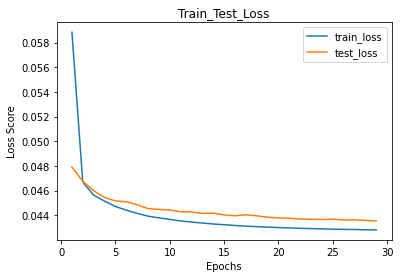

30
Train Epoch: 30 [0/7471 (0%)]	Loss: 0.042504
Train Epoch: 30 [160/7471 (2%)]	Loss: 0.042526
Train Epoch: 30 [320/7471 (4%)]	Loss: 0.042740
Train Epoch: 30 [480/7471 (6%)]	Loss: 0.042586
Train Epoch: 30 [640/7471 (9%)]	Loss: 0.042795
Train Epoch: 30 [800/7471 (11%)]	Loss: 0.043076
Train Epoch: 30 [960/7471 (13%)]	Loss: 0.042360
Train Epoch: 30 [1120/7471 (15%)]	Loss: 0.043018
Train Epoch: 30 [1280/7471 (17%)]	Loss: 0.042939
Train Epoch: 30 [1440/7471 (19%)]	Loss: 0.043044
Train Epoch: 30 [1600/7471 (21%)]	Loss: 0.042834
Train Epoch: 30 [1760/7471 (24%)]	Loss: 0.043044
Train Epoch: 30 [1920/7471 (26%)]	Loss: 0.042353
Train Epoch: 30 [2080/7471 (28%)]	Loss: 0.042811
Train Epoch: 30 [2240/7471 (30%)]	Loss: 0.042112
Train Epoch: 30 [2400/7471 (32%)]	Loss: 0.042811
Train Epoch: 30 [2560/7471 (34%)]	Loss: 0.042927
Train Epoch: 30 [2720/7471 (36%)]	Loss: 0.042737
Train Epoch: 30 [2880/7471 (39%)]	Loss: 0.042807
Train Epoch: 30 [3040/7471 (41%)]	Loss: 0.043205
Train Epoch: 30 [3200/7471 (43%

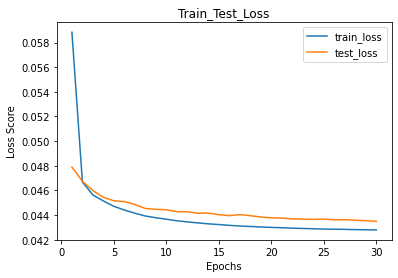

31
Train Epoch: 31 [0/7471 (0%)]	Loss: 0.042757
Train Epoch: 31 [160/7471 (2%)]	Loss: 0.042914
Train Epoch: 31 [320/7471 (4%)]	Loss: 0.042814
Train Epoch: 31 [480/7471 (6%)]	Loss: 0.042759
Train Epoch: 31 [640/7471 (9%)]	Loss: 0.042624
Train Epoch: 31 [800/7471 (11%)]	Loss: 0.042274
Train Epoch: 31 [960/7471 (13%)]	Loss: 0.042787
Train Epoch: 31 [1120/7471 (15%)]	Loss: 0.042716
Train Epoch: 31 [1280/7471 (17%)]	Loss: 0.042867
Train Epoch: 31 [1440/7471 (19%)]	Loss: 0.043000
Train Epoch: 31 [1600/7471 (21%)]	Loss: 0.042720
Train Epoch: 31 [1760/7471 (24%)]	Loss: 0.043024
Train Epoch: 31 [1920/7471 (26%)]	Loss: 0.043289
Train Epoch: 31 [2080/7471 (28%)]	Loss: 0.043005
Train Epoch: 31 [2240/7471 (30%)]	Loss: 0.042971
Train Epoch: 31 [2400/7471 (32%)]	Loss: 0.042905
Train Epoch: 31 [2560/7471 (34%)]	Loss: 0.043044
Train Epoch: 31 [2720/7471 (36%)]	Loss: 0.042910
Train Epoch: 31 [2880/7471 (39%)]	Loss: 0.042915
Train Epoch: 31 [3040/7471 (41%)]	Loss: 0.042674
Train Epoch: 31 [3200/7471 (43%

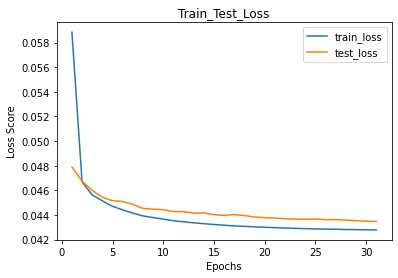

32
Train Epoch: 32 [0/7471 (0%)]	Loss: 0.042581
Train Epoch: 32 [160/7471 (2%)]	Loss: 0.042885
Train Epoch: 32 [320/7471 (4%)]	Loss: 0.043168
Train Epoch: 32 [480/7471 (6%)]	Loss: 0.042436
Train Epoch: 32 [640/7471 (9%)]	Loss: 0.042901
Train Epoch: 32 [800/7471 (11%)]	Loss: 0.042760
Train Epoch: 32 [960/7471 (13%)]	Loss: 0.043023
Train Epoch: 32 [1120/7471 (15%)]	Loss: 0.042680
Train Epoch: 32 [1280/7471 (17%)]	Loss: 0.042791
Train Epoch: 32 [1440/7471 (19%)]	Loss: 0.042772
Train Epoch: 32 [1600/7471 (21%)]	Loss: 0.042910
Train Epoch: 32 [1760/7471 (24%)]	Loss: 0.042685
Train Epoch: 32 [1920/7471 (26%)]	Loss: 0.042940
Train Epoch: 32 [2080/7471 (28%)]	Loss: 0.042389
Train Epoch: 32 [2240/7471 (30%)]	Loss: 0.042879
Train Epoch: 32 [2400/7471 (32%)]	Loss: 0.042919
Train Epoch: 32 [2560/7471 (34%)]	Loss: 0.043241
Train Epoch: 32 [2720/7471 (36%)]	Loss: 0.042955
Train Epoch: 32 [2880/7471 (39%)]	Loss: 0.042725
Train Epoch: 32 [3040/7471 (41%)]	Loss: 0.042510
Train Epoch: 32 [3200/7471 (43%

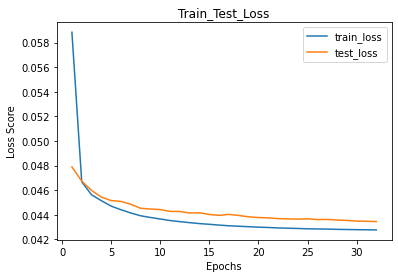

33
Train Epoch: 33 [0/7471 (0%)]	Loss: 0.042655
Train Epoch: 33 [160/7471 (2%)]	Loss: 0.042722
Train Epoch: 33 [320/7471 (4%)]	Loss: 0.043000
Train Epoch: 33 [480/7471 (6%)]	Loss: 0.042426
Train Epoch: 33 [640/7471 (9%)]	Loss: 0.042829
Train Epoch: 33 [800/7471 (11%)]	Loss: 0.042397
Train Epoch: 33 [960/7471 (13%)]	Loss: 0.042783
Train Epoch: 33 [1120/7471 (15%)]	Loss: 0.042558
Train Epoch: 33 [1280/7471 (17%)]	Loss: 0.042299
Train Epoch: 33 [1440/7471 (19%)]	Loss: 0.043015
Train Epoch: 33 [1600/7471 (21%)]	Loss: 0.042647
Train Epoch: 33 [1760/7471 (24%)]	Loss: 0.042447
Train Epoch: 33 [1920/7471 (26%)]	Loss: 0.042943
Train Epoch: 33 [2080/7471 (28%)]	Loss: 0.042897
Train Epoch: 33 [2240/7471 (30%)]	Loss: 0.042968
Train Epoch: 33 [2400/7471 (32%)]	Loss: 0.042858
Train Epoch: 33 [2560/7471 (34%)]	Loss: 0.042688
Train Epoch: 33 [2720/7471 (36%)]	Loss: 0.042679
Train Epoch: 33 [2880/7471 (39%)]	Loss: 0.042655
Train Epoch: 33 [3040/7471 (41%)]	Loss: 0.042488
Train Epoch: 33 [3200/7471 (43%

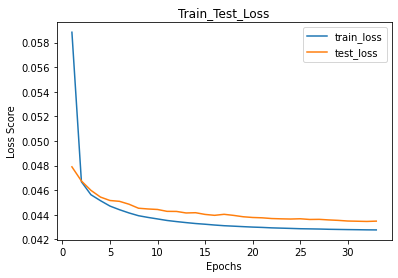

34
Train Epoch: 34 [0/7471 (0%)]	Loss: 0.042418
Train Epoch: 34 [160/7471 (2%)]	Loss: 0.042615
Train Epoch: 34 [320/7471 (4%)]	Loss: 0.042710
Train Epoch: 34 [480/7471 (6%)]	Loss: 0.042775
Train Epoch: 34 [640/7471 (9%)]	Loss: 0.042435
Train Epoch: 34 [800/7471 (11%)]	Loss: 0.043254
Train Epoch: 34 [960/7471 (13%)]	Loss: 0.042609
Train Epoch: 34 [1120/7471 (15%)]	Loss: 0.042748
Train Epoch: 34 [1280/7471 (17%)]	Loss: 0.042813
Train Epoch: 34 [1440/7471 (19%)]	Loss: 0.042624
Train Epoch: 34 [1600/7471 (21%)]	Loss: 0.042371
Train Epoch: 34 [1760/7471 (24%)]	Loss: 0.042591
Train Epoch: 34 [1920/7471 (26%)]	Loss: 0.043061
Train Epoch: 34 [2080/7471 (28%)]	Loss: 0.042601
Train Epoch: 34 [2240/7471 (30%)]	Loss: 0.043310
Train Epoch: 34 [2400/7471 (32%)]	Loss: 0.043097
Train Epoch: 34 [2560/7471 (34%)]	Loss: 0.043273
Train Epoch: 34 [2720/7471 (36%)]	Loss: 0.042743
Train Epoch: 34 [2880/7471 (39%)]	Loss: 0.042617
Train Epoch: 34 [3040/7471 (41%)]	Loss: 0.042697
Train Epoch: 34 [3200/7471 (43%

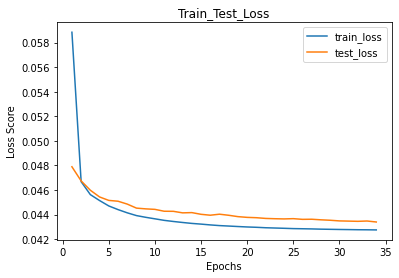

35
Train Epoch: 35 [0/7471 (0%)]	Loss: 0.042646
Train Epoch: 35 [160/7471 (2%)]	Loss: 0.042610
Train Epoch: 35 [320/7471 (4%)]	Loss: 0.042459
Train Epoch: 35 [480/7471 (6%)]	Loss: 0.042715
Train Epoch: 35 [640/7471 (9%)]	Loss: 0.043314
Train Epoch: 35 [800/7471 (11%)]	Loss: 0.042947
Train Epoch: 35 [960/7471 (13%)]	Loss: 0.042857
Train Epoch: 35 [1120/7471 (15%)]	Loss: 0.042803
Train Epoch: 35 [1280/7471 (17%)]	Loss: 0.042489
Train Epoch: 35 [1440/7471 (19%)]	Loss: 0.042730
Train Epoch: 35 [1600/7471 (21%)]	Loss: 0.042618
Train Epoch: 35 [1760/7471 (24%)]	Loss: 0.042221
Train Epoch: 35 [1920/7471 (26%)]	Loss: 0.042448
Train Epoch: 35 [2080/7471 (28%)]	Loss: 0.042966
Train Epoch: 35 [2240/7471 (30%)]	Loss: 0.042517
Train Epoch: 35 [2400/7471 (32%)]	Loss: 0.043033
Train Epoch: 35 [2560/7471 (34%)]	Loss: 0.042491
Train Epoch: 35 [2720/7471 (36%)]	Loss: 0.042700
Train Epoch: 35 [2880/7471 (39%)]	Loss: 0.042638
Train Epoch: 35 [3040/7471 (41%)]	Loss: 0.042531
Train Epoch: 35 [3200/7471 (43%

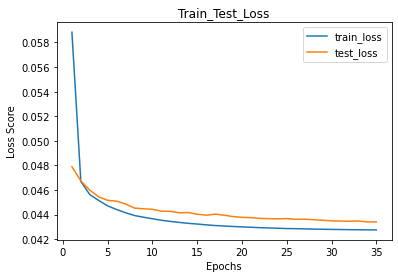

36
Train Epoch: 36 [0/7471 (0%)]	Loss: 0.042783
Train Epoch: 36 [160/7471 (2%)]	Loss: 0.042767
Train Epoch: 36 [320/7471 (4%)]	Loss: 0.042516
Train Epoch: 36 [480/7471 (6%)]	Loss: 0.042560
Train Epoch: 36 [640/7471 (9%)]	Loss: 0.042969
Train Epoch: 36 [800/7471 (11%)]	Loss: 0.042383
Train Epoch: 36 [960/7471 (13%)]	Loss: 0.042704
Train Epoch: 36 [1120/7471 (15%)]	Loss: 0.042680
Train Epoch: 36 [1280/7471 (17%)]	Loss: 0.043063
Train Epoch: 36 [1440/7471 (19%)]	Loss: 0.042526
Train Epoch: 36 [1600/7471 (21%)]	Loss: 0.042655
Train Epoch: 36 [1760/7471 (24%)]	Loss: 0.043156
Train Epoch: 36 [1920/7471 (26%)]	Loss: 0.042749
Train Epoch: 36 [2080/7471 (28%)]	Loss: 0.042471
Train Epoch: 36 [2240/7471 (30%)]	Loss: 0.042696
Train Epoch: 36 [2400/7471 (32%)]	Loss: 0.042646
Train Epoch: 36 [2560/7471 (34%)]	Loss: 0.042997
Train Epoch: 36 [2720/7471 (36%)]	Loss: 0.042527
Train Epoch: 36 [2880/7471 (39%)]	Loss: 0.042802
Train Epoch: 36 [3040/7471 (41%)]	Loss: 0.042439
Train Epoch: 36 [3200/7471 (43%

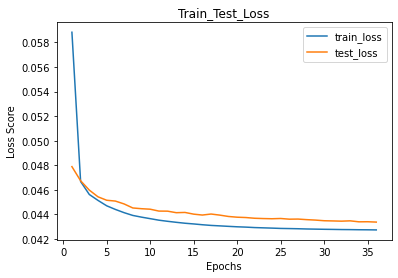

37
Train Epoch: 37 [0/7471 (0%)]	Loss: 0.042730
Train Epoch: 37 [160/7471 (2%)]	Loss: 0.042270
Train Epoch: 37 [320/7471 (4%)]	Loss: 0.042504
Train Epoch: 37 [480/7471 (6%)]	Loss: 0.042526
Train Epoch: 37 [640/7471 (9%)]	Loss: 0.042435
Train Epoch: 37 [800/7471 (11%)]	Loss: 0.043113
Train Epoch: 37 [960/7471 (13%)]	Loss: 0.042309
Train Epoch: 37 [1120/7471 (15%)]	Loss: 0.042648
Train Epoch: 37 [1280/7471 (17%)]	Loss: 0.042754
Train Epoch: 37 [1440/7471 (19%)]	Loss: 0.042427
Train Epoch: 37 [1600/7471 (21%)]	Loss: 0.042294
Train Epoch: 37 [1760/7471 (24%)]	Loss: 0.043030
Train Epoch: 37 [1920/7471 (26%)]	Loss: 0.042568
Train Epoch: 37 [2080/7471 (28%)]	Loss: 0.042962
Train Epoch: 37 [2240/7471 (30%)]	Loss: 0.042106
Train Epoch: 37 [2400/7471 (32%)]	Loss: 0.042419
Train Epoch: 37 [2560/7471 (34%)]	Loss: 0.042853
Train Epoch: 37 [2720/7471 (36%)]	Loss: 0.042650
Train Epoch: 37 [2880/7471 (39%)]	Loss: 0.042768
Train Epoch: 37 [3040/7471 (41%)]	Loss: 0.042628
Train Epoch: 37 [3200/7471 (43%

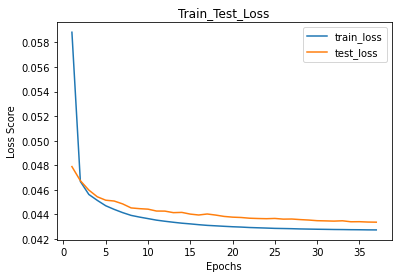

38
Train Epoch: 38 [0/7471 (0%)]	Loss: 0.042932
Train Epoch: 38 [160/7471 (2%)]	Loss: 0.042509
Train Epoch: 38 [320/7471 (4%)]	Loss: 0.042807
Train Epoch: 38 [480/7471 (6%)]	Loss: 0.042783
Train Epoch: 38 [640/7471 (9%)]	Loss: 0.041869
Train Epoch: 38 [800/7471 (11%)]	Loss: 0.042490
Train Epoch: 38 [960/7471 (13%)]	Loss: 0.042343
Train Epoch: 38 [1120/7471 (15%)]	Loss: 0.043125
Train Epoch: 38 [1280/7471 (17%)]	Loss: 0.042441
Train Epoch: 38 [1440/7471 (19%)]	Loss: 0.042821
Train Epoch: 38 [1600/7471 (21%)]	Loss: 0.043003
Train Epoch: 38 [1760/7471 (24%)]	Loss: 0.042796
Train Epoch: 38 [1920/7471 (26%)]	Loss: 0.043211
Train Epoch: 38 [2080/7471 (28%)]	Loss: 0.043048
Train Epoch: 38 [2240/7471 (30%)]	Loss: 0.043196
Train Epoch: 38 [2400/7471 (32%)]	Loss: 0.042790
Train Epoch: 38 [2560/7471 (34%)]	Loss: 0.043183
Train Epoch: 38 [2720/7471 (36%)]	Loss: 0.042724
Train Epoch: 38 [2880/7471 (39%)]	Loss: 0.042518
Train Epoch: 38 [3040/7471 (41%)]	Loss: 0.042453
Train Epoch: 38 [3200/7471 (43%

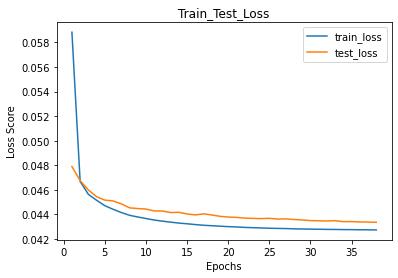

39
Train Epoch: 39 [0/7471 (0%)]	Loss: 0.042843
Train Epoch: 39 [160/7471 (2%)]	Loss: 0.042874
Train Epoch: 39 [320/7471 (4%)]	Loss: 0.042392
Train Epoch: 39 [480/7471 (6%)]	Loss: 0.042679
Train Epoch: 39 [640/7471 (9%)]	Loss: 0.042882
Train Epoch: 39 [800/7471 (11%)]	Loss: 0.042902
Train Epoch: 39 [960/7471 (13%)]	Loss: 0.042737
Train Epoch: 39 [1120/7471 (15%)]	Loss: 0.042737
Train Epoch: 39 [1280/7471 (17%)]	Loss: 0.042703
Train Epoch: 39 [1440/7471 (19%)]	Loss: 0.042991
Train Epoch: 39 [1600/7471 (21%)]	Loss: 0.042527
Train Epoch: 39 [1760/7471 (24%)]	Loss: 0.042877
Train Epoch: 39 [1920/7471 (26%)]	Loss: 0.042579
Train Epoch: 39 [2080/7471 (28%)]	Loss: 0.042935
Train Epoch: 39 [2240/7471 (30%)]	Loss: 0.043202
Train Epoch: 39 [2400/7471 (32%)]	Loss: 0.042306
Train Epoch: 39 [2560/7471 (34%)]	Loss: 0.042866
Train Epoch: 39 [2720/7471 (36%)]	Loss: 0.042105
Train Epoch: 39 [2880/7471 (39%)]	Loss: 0.042580
Train Epoch: 39 [3040/7471 (41%)]	Loss: 0.042266
Train Epoch: 39 [3200/7471 (43%

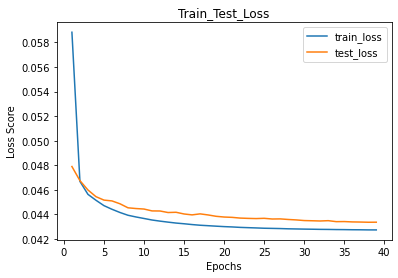

40
Train Epoch: 40 [0/7471 (0%)]	Loss: 0.042686
Train Epoch: 40 [160/7471 (2%)]	Loss: 0.042903
Train Epoch: 40 [320/7471 (4%)]	Loss: 0.042556
Train Epoch: 40 [480/7471 (6%)]	Loss: 0.042797
Train Epoch: 40 [640/7471 (9%)]	Loss: 0.042690
Train Epoch: 40 [800/7471 (11%)]	Loss: 0.043017
Train Epoch: 40 [960/7471 (13%)]	Loss: 0.042689
Train Epoch: 40 [1120/7471 (15%)]	Loss: 0.042230
Train Epoch: 40 [1280/7471 (17%)]	Loss: 0.042780
Train Epoch: 40 [1440/7471 (19%)]	Loss: 0.042927
Train Epoch: 40 [1600/7471 (21%)]	Loss: 0.042708
Train Epoch: 40 [1760/7471 (24%)]	Loss: 0.042827
Train Epoch: 40 [1920/7471 (26%)]	Loss: 0.042627
Train Epoch: 40 [2080/7471 (28%)]	Loss: 0.042825
Train Epoch: 40 [2240/7471 (30%)]	Loss: 0.042791
Train Epoch: 40 [2400/7471 (32%)]	Loss: 0.043228
Train Epoch: 40 [2560/7471 (34%)]	Loss: 0.042619
Train Epoch: 40 [2720/7471 (36%)]	Loss: 0.042456
Train Epoch: 40 [2880/7471 (39%)]	Loss: 0.042665
Train Epoch: 40 [3040/7471 (41%)]	Loss: 0.042814
Train Epoch: 40 [3200/7471 (43%

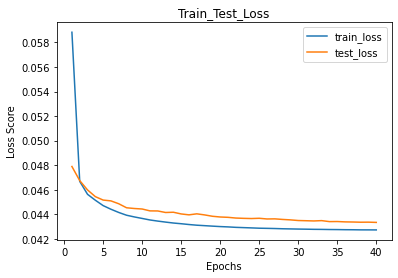

41
Train Epoch: 41 [0/7471 (0%)]	Loss: 0.042604
Train Epoch: 41 [160/7471 (2%)]	Loss: 0.042116
Train Epoch: 41 [320/7471 (4%)]	Loss: 0.042765
Train Epoch: 41 [480/7471 (6%)]	Loss: 0.042994
Train Epoch: 41 [640/7471 (9%)]	Loss: 0.041685
Train Epoch: 41 [800/7471 (11%)]	Loss: 0.042481
Train Epoch: 41 [960/7471 (13%)]	Loss: 0.043143
Train Epoch: 41 [1120/7471 (15%)]	Loss: 0.042542
Train Epoch: 41 [1280/7471 (17%)]	Loss: 0.042622
Train Epoch: 41 [1440/7471 (19%)]	Loss: 0.042570
Train Epoch: 41 [1600/7471 (21%)]	Loss: 0.042644
Train Epoch: 41 [1760/7471 (24%)]	Loss: 0.043386
Train Epoch: 41 [1920/7471 (26%)]	Loss: 0.042626
Train Epoch: 41 [2080/7471 (28%)]	Loss: 0.042656
Train Epoch: 41 [2240/7471 (30%)]	Loss: 0.042814
Train Epoch: 41 [2400/7471 (32%)]	Loss: 0.042774
Train Epoch: 41 [2560/7471 (34%)]	Loss: 0.042582
Train Epoch: 41 [2720/7471 (36%)]	Loss: 0.042808
Train Epoch: 41 [2880/7471 (39%)]	Loss: 0.042809
Train Epoch: 41 [3040/7471 (41%)]	Loss: 0.042875
Train Epoch: 41 [3200/7471 (43%

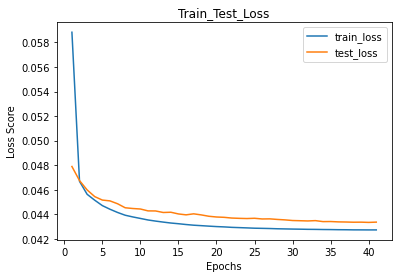

42
Train Epoch: 42 [0/7471 (0%)]	Loss: 0.042610
Train Epoch: 42 [160/7471 (2%)]	Loss: 0.042791
Train Epoch: 42 [320/7471 (4%)]	Loss: 0.043074
Train Epoch: 42 [480/7471 (6%)]	Loss: 0.042915
Train Epoch: 42 [640/7471 (9%)]	Loss: 0.042822
Train Epoch: 42 [800/7471 (11%)]	Loss: 0.042554
Train Epoch: 42 [960/7471 (13%)]	Loss: 0.042299
Train Epoch: 42 [1120/7471 (15%)]	Loss: 0.042717
Train Epoch: 42 [1280/7471 (17%)]	Loss: 0.042906
Train Epoch: 42 [1440/7471 (19%)]	Loss: 0.043266
Train Epoch: 42 [1600/7471 (21%)]	Loss: 0.042650
Train Epoch: 42 [1760/7471 (24%)]	Loss: 0.042923
Train Epoch: 42 [1920/7471 (26%)]	Loss: 0.042892
Train Epoch: 42 [2080/7471 (28%)]	Loss: 0.042314
Train Epoch: 42 [2240/7471 (30%)]	Loss: 0.042719
Train Epoch: 42 [2400/7471 (32%)]	Loss: 0.043014
Train Epoch: 42 [2560/7471 (34%)]	Loss: 0.042436
Train Epoch: 42 [2720/7471 (36%)]	Loss: 0.042531
Train Epoch: 42 [2880/7471 (39%)]	Loss: 0.042389
Train Epoch: 42 [3040/7471 (41%)]	Loss: 0.042577
Train Epoch: 42 [3200/7471 (43%

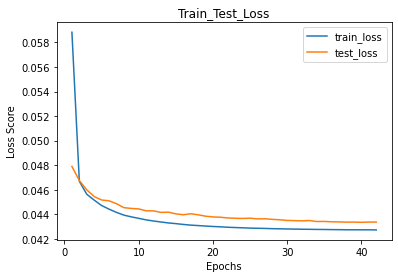

43
Train Epoch: 43 [0/7471 (0%)]	Loss: 0.042560
Train Epoch: 43 [160/7471 (2%)]	Loss: 0.042757
Train Epoch: 43 [320/7471 (4%)]	Loss: 0.042358
Train Epoch: 43 [480/7471 (6%)]	Loss: 0.042614
Train Epoch: 43 [640/7471 (9%)]	Loss: 0.042801
Train Epoch: 43 [800/7471 (11%)]	Loss: 0.042815
Train Epoch: 43 [960/7471 (13%)]	Loss: 0.042681
Train Epoch: 43 [1120/7471 (15%)]	Loss: 0.043045
Train Epoch: 43 [1280/7471 (17%)]	Loss: 0.042549
Train Epoch: 43 [1440/7471 (19%)]	Loss: 0.042754
Train Epoch: 43 [1600/7471 (21%)]	Loss: 0.042946
Train Epoch: 43 [1760/7471 (24%)]	Loss: 0.042559
Train Epoch: 43 [1920/7471 (26%)]	Loss: 0.042670
Train Epoch: 43 [2080/7471 (28%)]	Loss: 0.042893
Train Epoch: 43 [2240/7471 (30%)]	Loss: 0.042850
Train Epoch: 43 [2400/7471 (32%)]	Loss: 0.042763
Train Epoch: 43 [2560/7471 (34%)]	Loss: 0.042932
Train Epoch: 43 [2720/7471 (36%)]	Loss: 0.042802
Train Epoch: 43 [2880/7471 (39%)]	Loss: 0.042685
Train Epoch: 43 [3040/7471 (41%)]	Loss: 0.042741
Train Epoch: 43 [3200/7471 (43%

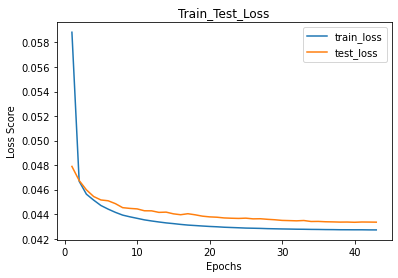

44
Train Epoch: 44 [0/7471 (0%)]	Loss: 0.042529
Train Epoch: 44 [160/7471 (2%)]	Loss: 0.042754
Train Epoch: 44 [320/7471 (4%)]	Loss: 0.042820
Train Epoch: 44 [480/7471 (6%)]	Loss: 0.043133
Train Epoch: 44 [640/7471 (9%)]	Loss: 0.042693
Train Epoch: 44 [800/7471 (11%)]	Loss: 0.042649
Train Epoch: 44 [960/7471 (13%)]	Loss: 0.043387
Train Epoch: 44 [1120/7471 (15%)]	Loss: 0.042933
Train Epoch: 44 [1280/7471 (17%)]	Loss: 0.042881
Train Epoch: 44 [1440/7471 (19%)]	Loss: 0.042832
Train Epoch: 44 [1600/7471 (21%)]	Loss: 0.042348
Train Epoch: 44 [1760/7471 (24%)]	Loss: 0.042528
Train Epoch: 44 [1920/7471 (26%)]	Loss: 0.042340
Train Epoch: 44 [2080/7471 (28%)]	Loss: 0.042640
Train Epoch: 44 [2240/7471 (30%)]	Loss: 0.042726
Train Epoch: 44 [2400/7471 (32%)]	Loss: 0.042760
Train Epoch: 44 [2560/7471 (34%)]	Loss: 0.042654
Train Epoch: 44 [2720/7471 (36%)]	Loss: 0.042926
Train Epoch: 44 [2880/7471 (39%)]	Loss: 0.042982
Train Epoch: 44 [3040/7471 (41%)]	Loss: 0.042889
Train Epoch: 44 [3200/7471 (43%

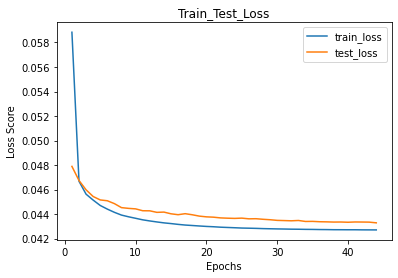

45
Train Epoch: 45 [0/7471 (0%)]	Loss: 0.042796
Train Epoch: 45 [160/7471 (2%)]	Loss: 0.042916
Train Epoch: 45 [320/7471 (4%)]	Loss: 0.042854
Train Epoch: 45 [480/7471 (6%)]	Loss: 0.042818
Train Epoch: 45 [640/7471 (9%)]	Loss: 0.043051
Train Epoch: 45 [800/7471 (11%)]	Loss: 0.042950
Train Epoch: 45 [960/7471 (13%)]	Loss: 0.042192
Train Epoch: 45 [1120/7471 (15%)]	Loss: 0.042490
Train Epoch: 45 [1280/7471 (17%)]	Loss: 0.042541
Train Epoch: 45 [1440/7471 (19%)]	Loss: 0.042844
Train Epoch: 45 [1600/7471 (21%)]	Loss: 0.043149
Train Epoch: 45 [1760/7471 (24%)]	Loss: 0.042839
Train Epoch: 45 [1920/7471 (26%)]	Loss: 0.042523
Train Epoch: 45 [2080/7471 (28%)]	Loss: 0.042211
Train Epoch: 45 [2240/7471 (30%)]	Loss: 0.042707
Train Epoch: 45 [2400/7471 (32%)]	Loss: 0.042775
Train Epoch: 45 [2560/7471 (34%)]	Loss: 0.042638
Train Epoch: 45 [2720/7471 (36%)]	Loss: 0.042493
Train Epoch: 45 [2880/7471 (39%)]	Loss: 0.042317
Train Epoch: 45 [3040/7471 (41%)]	Loss: 0.042692
Train Epoch: 45 [3200/7471 (43%

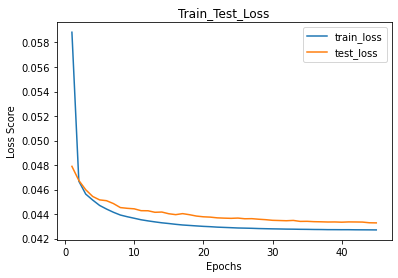

46
Train Epoch: 46 [0/7471 (0%)]	Loss: 0.042575
Train Epoch: 46 [160/7471 (2%)]	Loss: 0.042495
Train Epoch: 46 [320/7471 (4%)]	Loss: 0.043049
Train Epoch: 46 [480/7471 (6%)]	Loss: 0.042507
Train Epoch: 46 [640/7471 (9%)]	Loss: 0.042854
Train Epoch: 46 [800/7471 (11%)]	Loss: 0.042436
Train Epoch: 46 [960/7471 (13%)]	Loss: 0.042802
Train Epoch: 46 [1120/7471 (15%)]	Loss: 0.041942
Train Epoch: 46 [1280/7471 (17%)]	Loss: 0.042463
Train Epoch: 46 [1440/7471 (19%)]	Loss: 0.042294
Train Epoch: 46 [1600/7471 (21%)]	Loss: 0.042654
Train Epoch: 46 [1760/7471 (24%)]	Loss: 0.042734
Train Epoch: 46 [1920/7471 (26%)]	Loss: 0.042910
Train Epoch: 46 [2080/7471 (28%)]	Loss: 0.042677
Train Epoch: 46 [2240/7471 (30%)]	Loss: 0.042876
Train Epoch: 46 [2400/7471 (32%)]	Loss: 0.042392
Train Epoch: 46 [2560/7471 (34%)]	Loss: 0.041825
Train Epoch: 46 [2720/7471 (36%)]	Loss: 0.042354
Train Epoch: 46 [2880/7471 (39%)]	Loss: 0.042822
Train Epoch: 46 [3040/7471 (41%)]	Loss: 0.042643
Train Epoch: 46 [3200/7471 (43%

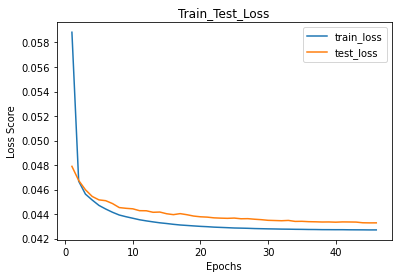

47
Train Epoch: 47 [0/7471 (0%)]	Loss: 0.042415
Train Epoch: 47 [160/7471 (2%)]	Loss: 0.042808
Train Epoch: 47 [320/7471 (4%)]	Loss: 0.043028
Train Epoch: 47 [480/7471 (6%)]	Loss: 0.042569
Train Epoch: 47 [640/7471 (9%)]	Loss: 0.042747
Train Epoch: 47 [800/7471 (11%)]	Loss: 0.042996
Train Epoch: 47 [960/7471 (13%)]	Loss: 0.042737
Train Epoch: 47 [1120/7471 (15%)]	Loss: 0.042992
Train Epoch: 47 [1280/7471 (17%)]	Loss: 0.042679
Train Epoch: 47 [1440/7471 (19%)]	Loss: 0.042513
Train Epoch: 47 [1600/7471 (21%)]	Loss: 0.042879
Train Epoch: 47 [1760/7471 (24%)]	Loss: 0.042606
Train Epoch: 47 [1920/7471 (26%)]	Loss: 0.042864
Train Epoch: 47 [2080/7471 (28%)]	Loss: 0.042692
Train Epoch: 47 [2240/7471 (30%)]	Loss: 0.042639
Train Epoch: 47 [2400/7471 (32%)]	Loss: 0.042803
Train Epoch: 47 [2560/7471 (34%)]	Loss: 0.042540
Train Epoch: 47 [2720/7471 (36%)]	Loss: 0.042889
Train Epoch: 47 [2880/7471 (39%)]	Loss: 0.042636
Train Epoch: 47 [3040/7471 (41%)]	Loss: 0.042455
Train Epoch: 47 [3200/7471 (43%

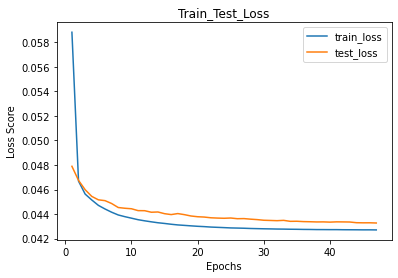

48
Train Epoch: 48 [0/7471 (0%)]	Loss: 0.042656
Train Epoch: 48 [160/7471 (2%)]	Loss: 0.042826
Train Epoch: 48 [320/7471 (4%)]	Loss: 0.043079
Train Epoch: 48 [480/7471 (6%)]	Loss: 0.042555
Train Epoch: 48 [640/7471 (9%)]	Loss: 0.042552
Train Epoch: 48 [800/7471 (11%)]	Loss: 0.042761
Train Epoch: 48 [960/7471 (13%)]	Loss: 0.042672
Train Epoch: 48 [1120/7471 (15%)]	Loss: 0.042699
Train Epoch: 48 [1280/7471 (17%)]	Loss: 0.042469
Train Epoch: 48 [1440/7471 (19%)]	Loss: 0.042707
Train Epoch: 48 [1600/7471 (21%)]	Loss: 0.042659
Train Epoch: 48 [1760/7471 (24%)]	Loss: 0.042852
Train Epoch: 48 [1920/7471 (26%)]	Loss: 0.042758
Train Epoch: 48 [2080/7471 (28%)]	Loss: 0.042592
Train Epoch: 48 [2240/7471 (30%)]	Loss: 0.042551
Train Epoch: 48 [2400/7471 (32%)]	Loss: 0.042582
Train Epoch: 48 [2560/7471 (34%)]	Loss: 0.043117
Train Epoch: 48 [2720/7471 (36%)]	Loss: 0.043031
Train Epoch: 48 [2880/7471 (39%)]	Loss: 0.042959
Train Epoch: 48 [3040/7471 (41%)]	Loss: 0.042863
Train Epoch: 48 [3200/7471 (43%

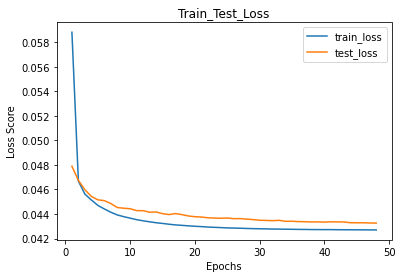

49
Train Epoch: 49 [0/7471 (0%)]	Loss: 0.042296
Train Epoch: 49 [160/7471 (2%)]	Loss: 0.042868
Train Epoch: 49 [320/7471 (4%)]	Loss: 0.042614
Train Epoch: 49 [480/7471 (6%)]	Loss: 0.042391
Train Epoch: 49 [640/7471 (9%)]	Loss: 0.042532
Train Epoch: 49 [800/7471 (11%)]	Loss: 0.042539
Train Epoch: 49 [960/7471 (13%)]	Loss: 0.042897
Train Epoch: 49 [1120/7471 (15%)]	Loss: 0.042737
Train Epoch: 49 [1280/7471 (17%)]	Loss: 0.042730
Train Epoch: 49 [1440/7471 (19%)]	Loss: 0.042887
Train Epoch: 49 [1600/7471 (21%)]	Loss: 0.042801
Train Epoch: 49 [1760/7471 (24%)]	Loss: 0.042402
Train Epoch: 49 [1920/7471 (26%)]	Loss: 0.042648
Train Epoch: 49 [2080/7471 (28%)]	Loss: 0.042723
Train Epoch: 49 [2240/7471 (30%)]	Loss: 0.042391
Train Epoch: 49 [2400/7471 (32%)]	Loss: 0.042438
Train Epoch: 49 [2560/7471 (34%)]	Loss: 0.042722
Train Epoch: 49 [2720/7471 (36%)]	Loss: 0.042399
Train Epoch: 49 [2880/7471 (39%)]	Loss: 0.042502
Train Epoch: 49 [3040/7471 (41%)]	Loss: 0.042741
Train Epoch: 49 [3200/7471 (43%

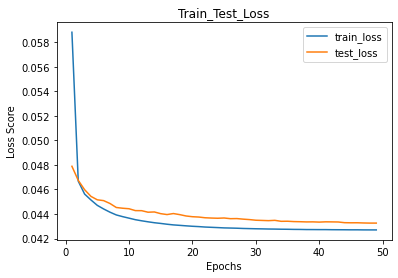

50
Train Epoch: 50 [0/7471 (0%)]	Loss: 0.042421
Train Epoch: 50 [160/7471 (2%)]	Loss: 0.042367
Train Epoch: 50 [320/7471 (4%)]	Loss: 0.042703
Train Epoch: 50 [480/7471 (6%)]	Loss: 0.042833
Train Epoch: 50 [640/7471 (9%)]	Loss: 0.042881
Train Epoch: 50 [800/7471 (11%)]	Loss: 0.042696
Train Epoch: 50 [960/7471 (13%)]	Loss: 0.042448
Train Epoch: 50 [1120/7471 (15%)]	Loss: 0.042462
Train Epoch: 50 [1280/7471 (17%)]	Loss: 0.042617
Train Epoch: 50 [1440/7471 (19%)]	Loss: 0.042712
Train Epoch: 50 [1600/7471 (21%)]	Loss: 0.042872
Train Epoch: 50 [1760/7471 (24%)]	Loss: 0.042998
Train Epoch: 50 [1920/7471 (26%)]	Loss: 0.042438
Train Epoch: 50 [2080/7471 (28%)]	Loss: 0.042435
Train Epoch: 50 [2240/7471 (30%)]	Loss: 0.042157
Train Epoch: 50 [2400/7471 (32%)]	Loss: 0.043014
Train Epoch: 50 [2560/7471 (34%)]	Loss: 0.042494
Train Epoch: 50 [2720/7471 (36%)]	Loss: 0.042894
Train Epoch: 50 [2880/7471 (39%)]	Loss: 0.042705
Train Epoch: 50 [3040/7471 (41%)]	Loss: 0.042378
Train Epoch: 50 [3200/7471 (43%

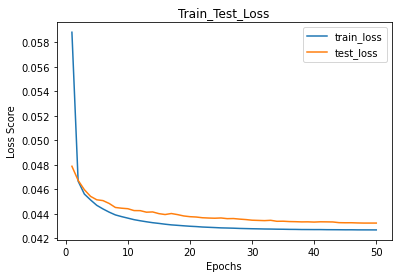

51
Train Epoch: 51 [0/7471 (0%)]	Loss: 0.042192
Train Epoch: 51 [160/7471 (2%)]	Loss: 0.042653
Train Epoch: 51 [320/7471 (4%)]	Loss: 0.042674
Train Epoch: 51 [480/7471 (6%)]	Loss: 0.042579
Train Epoch: 51 [640/7471 (9%)]	Loss: 0.043070
Train Epoch: 51 [800/7471 (11%)]	Loss: 0.043063
Train Epoch: 51 [960/7471 (13%)]	Loss: 0.041891
Train Epoch: 51 [1120/7471 (15%)]	Loss: 0.042992
Train Epoch: 51 [1280/7471 (17%)]	Loss: 0.042696
Train Epoch: 51 [1440/7471 (19%)]	Loss: 0.042510
Train Epoch: 51 [1600/7471 (21%)]	Loss: 0.042746
Train Epoch: 51 [1760/7471 (24%)]	Loss: 0.042349
Train Epoch: 51 [1920/7471 (26%)]	Loss: 0.042970
Train Epoch: 51 [2080/7471 (28%)]	Loss: 0.042933
Train Epoch: 51 [2240/7471 (30%)]	Loss: 0.042306
Train Epoch: 51 [2400/7471 (32%)]	Loss: 0.042544
Train Epoch: 51 [2560/7471 (34%)]	Loss: 0.042791
Train Epoch: 51 [2720/7471 (36%)]	Loss: 0.042448
Train Epoch: 51 [2880/7471 (39%)]	Loss: 0.042315
Train Epoch: 51 [3040/7471 (41%)]	Loss: 0.043110
Train Epoch: 51 [3200/7471 (43%

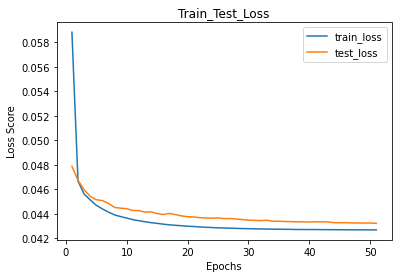

52
Train Epoch: 52 [0/7471 (0%)]	Loss: 0.042912
Train Epoch: 52 [160/7471 (2%)]	Loss: 0.042581
Train Epoch: 52 [320/7471 (4%)]	Loss: 0.042395
Train Epoch: 52 [480/7471 (6%)]	Loss: 0.042714
Train Epoch: 52 [640/7471 (9%)]	Loss: 0.042919
Train Epoch: 52 [800/7471 (11%)]	Loss: 0.043113
Train Epoch: 52 [960/7471 (13%)]	Loss: 0.042229
Train Epoch: 52 [1120/7471 (15%)]	Loss: 0.042342
Train Epoch: 52 [1280/7471 (17%)]	Loss: 0.042718
Train Epoch: 52 [1440/7471 (19%)]	Loss: 0.043014
Train Epoch: 52 [1600/7471 (21%)]	Loss: 0.042871
Train Epoch: 52 [1760/7471 (24%)]	Loss: 0.042925
Train Epoch: 52 [1920/7471 (26%)]	Loss: 0.042579
Train Epoch: 52 [2080/7471 (28%)]	Loss: 0.042584
Train Epoch: 52 [2240/7471 (30%)]	Loss: 0.042592
Train Epoch: 52 [2400/7471 (32%)]	Loss: 0.041934
Train Epoch: 52 [2560/7471 (34%)]	Loss: 0.042573
Train Epoch: 52 [2720/7471 (36%)]	Loss: 0.042925
Train Epoch: 52 [2880/7471 (39%)]	Loss: 0.042221
Train Epoch: 52 [3040/7471 (41%)]	Loss: 0.042088
Train Epoch: 52 [3200/7471 (43%

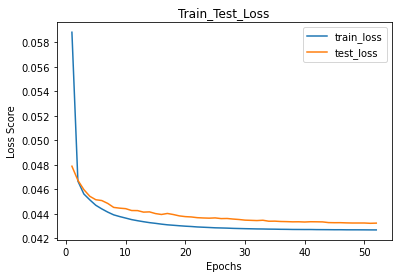

53
Train Epoch: 53 [0/7471 (0%)]	Loss: 0.042243
Train Epoch: 53 [160/7471 (2%)]	Loss: 0.042931
Train Epoch: 53 [320/7471 (4%)]	Loss: 0.042836
Train Epoch: 53 [480/7471 (6%)]	Loss: 0.042872
Train Epoch: 53 [640/7471 (9%)]	Loss: 0.042714
Train Epoch: 53 [800/7471 (11%)]	Loss: 0.042982
Train Epoch: 53 [960/7471 (13%)]	Loss: 0.042808
Train Epoch: 53 [1120/7471 (15%)]	Loss: 0.042430
Train Epoch: 53 [1280/7471 (17%)]	Loss: 0.042436
Train Epoch: 53 [1440/7471 (19%)]	Loss: 0.042904
Train Epoch: 53 [1600/7471 (21%)]	Loss: 0.042539
Train Epoch: 53 [1760/7471 (24%)]	Loss: 0.042646
Train Epoch: 53 [1920/7471 (26%)]	Loss: 0.042539
Train Epoch: 53 [2080/7471 (28%)]	Loss: 0.042552
Train Epoch: 53 [2240/7471 (30%)]	Loss: 0.042725
Train Epoch: 53 [2400/7471 (32%)]	Loss: 0.042880
Train Epoch: 53 [2560/7471 (34%)]	Loss: 0.042870
Train Epoch: 53 [2720/7471 (36%)]	Loss: 0.042972
Train Epoch: 53 [2880/7471 (39%)]	Loss: 0.042854
Train Epoch: 53 [3040/7471 (41%)]	Loss: 0.042755
Train Epoch: 53 [3200/7471 (43%

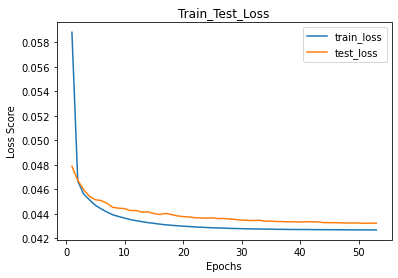

54
Train Epoch: 54 [0/7471 (0%)]	Loss: 0.042967
Train Epoch: 54 [160/7471 (2%)]	Loss: 0.043012
Train Epoch: 54 [320/7471 (4%)]	Loss: 0.042446
Train Epoch: 54 [480/7471 (6%)]	Loss: 0.042191
Train Epoch: 54 [640/7471 (9%)]	Loss: 0.042466
Train Epoch: 54 [800/7471 (11%)]	Loss: 0.042474
Train Epoch: 54 [960/7471 (13%)]	Loss: 0.042682
Train Epoch: 54 [1120/7471 (15%)]	Loss: 0.043080
Train Epoch: 54 [1280/7471 (17%)]	Loss: 0.042626
Train Epoch: 54 [1440/7471 (19%)]	Loss: 0.042565
Train Epoch: 54 [1600/7471 (21%)]	Loss: 0.042581
Train Epoch: 54 [1760/7471 (24%)]	Loss: 0.042987
Train Epoch: 54 [1920/7471 (26%)]	Loss: 0.042799
Train Epoch: 54 [2080/7471 (28%)]	Loss: 0.042777
Train Epoch: 54 [2240/7471 (30%)]	Loss: 0.042412
Train Epoch: 54 [2400/7471 (32%)]	Loss: 0.042679
Train Epoch: 54 [2560/7471 (34%)]	Loss: 0.042226
Train Epoch: 54 [2720/7471 (36%)]	Loss: 0.042549
Train Epoch: 54 [2880/7471 (39%)]	Loss: 0.043038
Train Epoch: 54 [3040/7471 (41%)]	Loss: 0.042297
Train Epoch: 54 [3200/7471 (43%

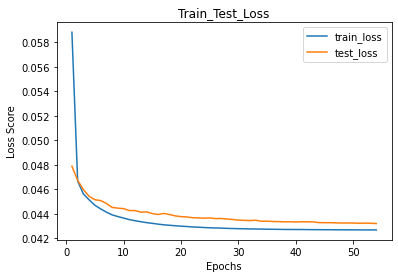

55
Train Epoch: 55 [0/7471 (0%)]	Loss: 0.042663
Train Epoch: 55 [160/7471 (2%)]	Loss: 0.041954
Train Epoch: 55 [320/7471 (4%)]	Loss: 0.042876
Train Epoch: 55 [480/7471 (6%)]	Loss: 0.042865
Train Epoch: 55 [640/7471 (9%)]	Loss: 0.042858
Train Epoch: 55 [800/7471 (11%)]	Loss: 0.042890
Train Epoch: 55 [960/7471 (13%)]	Loss: 0.042986
Train Epoch: 55 [1120/7471 (15%)]	Loss: 0.042575
Train Epoch: 55 [1280/7471 (17%)]	Loss: 0.042255
Train Epoch: 55 [1440/7471 (19%)]	Loss: 0.042457
Train Epoch: 55 [1600/7471 (21%)]	Loss: 0.042622
Train Epoch: 55 [1760/7471 (24%)]	Loss: 0.043136
Train Epoch: 55 [1920/7471 (26%)]	Loss: 0.042689
Train Epoch: 55 [2080/7471 (28%)]	Loss: 0.042891
Train Epoch: 55 [2240/7471 (30%)]	Loss: 0.042793
Train Epoch: 55 [2400/7471 (32%)]	Loss: 0.042924
Train Epoch: 55 [2560/7471 (34%)]	Loss: 0.042380
Train Epoch: 55 [2720/7471 (36%)]	Loss: 0.042475
Train Epoch: 55 [2880/7471 (39%)]	Loss: 0.042789
Train Epoch: 55 [3040/7471 (41%)]	Loss: 0.042645
Train Epoch: 55 [3200/7471 (43%

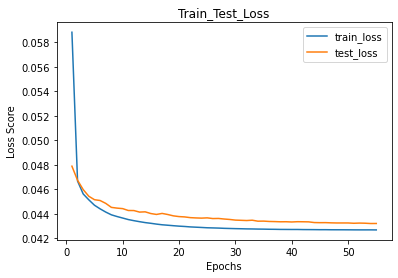

56
Train Epoch: 56 [0/7471 (0%)]	Loss: 0.042843
Train Epoch: 56 [160/7471 (2%)]	Loss: 0.042347
Train Epoch: 56 [320/7471 (4%)]	Loss: 0.042652
Train Epoch: 56 [480/7471 (6%)]	Loss: 0.042603
Train Epoch: 56 [640/7471 (9%)]	Loss: 0.042844
Train Epoch: 56 [800/7471 (11%)]	Loss: 0.042667
Train Epoch: 56 [960/7471 (13%)]	Loss: 0.042245
Train Epoch: 56 [1120/7471 (15%)]	Loss: 0.042772
Train Epoch: 56 [1280/7471 (17%)]	Loss: 0.042571
Train Epoch: 56 [1440/7471 (19%)]	Loss: 0.042727
Train Epoch: 56 [1600/7471 (21%)]	Loss: 0.042927
Train Epoch: 56 [1760/7471 (24%)]	Loss: 0.042225
Train Epoch: 56 [1920/7471 (26%)]	Loss: 0.042982
Train Epoch: 56 [2080/7471 (28%)]	Loss: 0.042415
Train Epoch: 56 [2240/7471 (30%)]	Loss: 0.042357
Train Epoch: 56 [2400/7471 (32%)]	Loss: 0.042952
Train Epoch: 56 [2560/7471 (34%)]	Loss: 0.042716
Train Epoch: 56 [2720/7471 (36%)]	Loss: 0.042826
Train Epoch: 56 [2880/7471 (39%)]	Loss: 0.042989
Train Epoch: 56 [3040/7471 (41%)]	Loss: 0.043000
Train Epoch: 56 [3200/7471 (43%

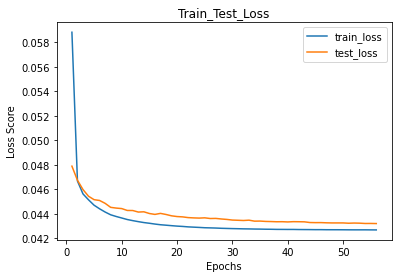

57
Train Epoch: 57 [0/7471 (0%)]	Loss: 0.042829
Train Epoch: 57 [160/7471 (2%)]	Loss: 0.042456
Train Epoch: 57 [320/7471 (4%)]	Loss: 0.042421
Train Epoch: 57 [480/7471 (6%)]	Loss: 0.042376
Train Epoch: 57 [640/7471 (9%)]	Loss: 0.042824
Train Epoch: 57 [800/7471 (11%)]	Loss: 0.042942
Train Epoch: 57 [960/7471 (13%)]	Loss: 0.042822
Train Epoch: 57 [1120/7471 (15%)]	Loss: 0.042451
Train Epoch: 57 [1280/7471 (17%)]	Loss: 0.043048
Train Epoch: 57 [1440/7471 (19%)]	Loss: 0.042843
Train Epoch: 57 [1600/7471 (21%)]	Loss: 0.042854
Train Epoch: 57 [1760/7471 (24%)]	Loss: 0.042422
Train Epoch: 57 [1920/7471 (26%)]	Loss: 0.043066
Train Epoch: 57 [2080/7471 (28%)]	Loss: 0.042634
Train Epoch: 57 [2240/7471 (30%)]	Loss: 0.042475
Train Epoch: 57 [2400/7471 (32%)]	Loss: 0.042989
Train Epoch: 57 [2560/7471 (34%)]	Loss: 0.042431
Train Epoch: 57 [2720/7471 (36%)]	Loss: 0.042622
Train Epoch: 57 [2880/7471 (39%)]	Loss: 0.042796
Train Epoch: 57 [3040/7471 (41%)]	Loss: 0.042719
Train Epoch: 57 [3200/7471 (43%

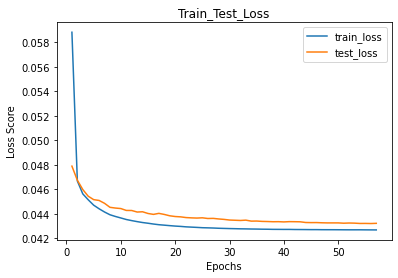

58
Train Epoch: 58 [0/7471 (0%)]	Loss: 0.042800
Train Epoch: 58 [160/7471 (2%)]	Loss: 0.042660
Train Epoch: 58 [320/7471 (4%)]	Loss: 0.042932
Train Epoch: 58 [480/7471 (6%)]	Loss: 0.042523
Train Epoch: 58 [640/7471 (9%)]	Loss: 0.043014
Train Epoch: 58 [800/7471 (11%)]	Loss: 0.042721
Train Epoch: 58 [960/7471 (13%)]	Loss: 0.042490
Train Epoch: 58 [1120/7471 (15%)]	Loss: 0.042912
Train Epoch: 58 [1280/7471 (17%)]	Loss: 0.042532
Train Epoch: 58 [1440/7471 (19%)]	Loss: 0.042612
Train Epoch: 58 [1600/7471 (21%)]	Loss: 0.042761
Train Epoch: 58 [1760/7471 (24%)]	Loss: 0.042748
Train Epoch: 58 [1920/7471 (26%)]	Loss: 0.041786
Train Epoch: 58 [2080/7471 (28%)]	Loss: 0.042853
Train Epoch: 58 [2240/7471 (30%)]	Loss: 0.043095
Train Epoch: 58 [2400/7471 (32%)]	Loss: 0.042805
Train Epoch: 58 [2560/7471 (34%)]	Loss: 0.042479
Train Epoch: 58 [2720/7471 (36%)]	Loss: 0.042493
Train Epoch: 58 [2880/7471 (39%)]	Loss: 0.042604
Train Epoch: 58 [3040/7471 (41%)]	Loss: 0.042720
Train Epoch: 58 [3200/7471 (43%

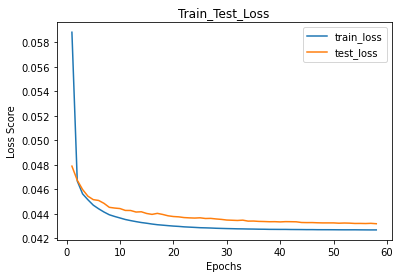

59
Train Epoch: 59 [0/7471 (0%)]	Loss: 0.042947
Train Epoch: 59 [160/7471 (2%)]	Loss: 0.042455
Train Epoch: 59 [320/7471 (4%)]	Loss: 0.043022
Train Epoch: 59 [480/7471 (6%)]	Loss: 0.042961
Train Epoch: 59 [640/7471 (9%)]	Loss: 0.042212
Train Epoch: 59 [800/7471 (11%)]	Loss: 0.042612
Train Epoch: 59 [960/7471 (13%)]	Loss: 0.042410
Train Epoch: 59 [1120/7471 (15%)]	Loss: 0.042585
Train Epoch: 59 [1280/7471 (17%)]	Loss: 0.042704
Train Epoch: 59 [1440/7471 (19%)]	Loss: 0.042589
Train Epoch: 59 [1600/7471 (21%)]	Loss: 0.042669
Train Epoch: 59 [1760/7471 (24%)]	Loss: 0.042797
Train Epoch: 59 [1920/7471 (26%)]	Loss: 0.042308
Train Epoch: 59 [2080/7471 (28%)]	Loss: 0.042625
Train Epoch: 59 [2240/7471 (30%)]	Loss: 0.042640
Train Epoch: 59 [2400/7471 (32%)]	Loss: 0.042762
Train Epoch: 59 [2560/7471 (34%)]	Loss: 0.042548
Train Epoch: 59 [2720/7471 (36%)]	Loss: 0.042699
Train Epoch: 59 [2880/7471 (39%)]	Loss: 0.042752
Train Epoch: 59 [3040/7471 (41%)]	Loss: 0.042578
Train Epoch: 59 [3200/7471 (43%

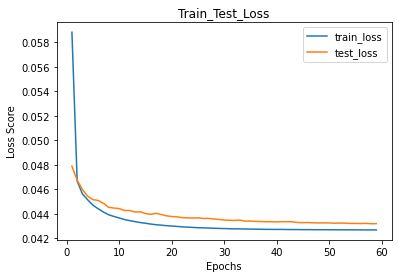

60
Train Epoch: 60 [0/7471 (0%)]	Loss: 0.042539
Train Epoch: 60 [160/7471 (2%)]	Loss: 0.042115
Train Epoch: 60 [320/7471 (4%)]	Loss: 0.042876
Train Epoch: 60 [480/7471 (6%)]	Loss: 0.042500
Train Epoch: 60 [640/7471 (9%)]	Loss: 0.042849
Train Epoch: 60 [800/7471 (11%)]	Loss: 0.042977
Train Epoch: 60 [960/7471 (13%)]	Loss: 0.042864
Train Epoch: 60 [1120/7471 (15%)]	Loss: 0.042575
Train Epoch: 60 [1280/7471 (17%)]	Loss: 0.042662
Train Epoch: 60 [1440/7471 (19%)]	Loss: 0.042342
Train Epoch: 60 [1600/7471 (21%)]	Loss: 0.043077
Train Epoch: 60 [1760/7471 (24%)]	Loss: 0.042553
Train Epoch: 60 [1920/7471 (26%)]	Loss: 0.042919
Train Epoch: 60 [2080/7471 (28%)]	Loss: 0.042704
Train Epoch: 60 [2240/7471 (30%)]	Loss: 0.042411
Train Epoch: 60 [2400/7471 (32%)]	Loss: 0.042691
Train Epoch: 60 [2560/7471 (34%)]	Loss: 0.042641
Train Epoch: 60 [2720/7471 (36%)]	Loss: 0.042525
Train Epoch: 60 [2880/7471 (39%)]	Loss: 0.042544
Train Epoch: 60 [3040/7471 (41%)]	Loss: 0.042333
Train Epoch: 60 [3200/7471 (43%

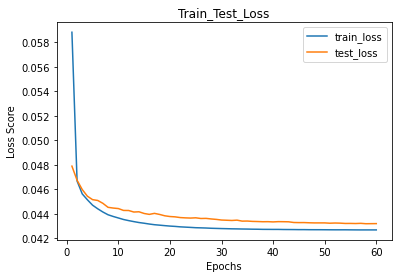

61
Train Epoch: 61 [0/7471 (0%)]	Loss: 0.042335
Train Epoch: 61 [160/7471 (2%)]	Loss: 0.042720
Train Epoch: 61 [320/7471 (4%)]	Loss: 0.042944
Train Epoch: 61 [480/7471 (6%)]	Loss: 0.042561
Train Epoch: 61 [640/7471 (9%)]	Loss: 0.042381
Train Epoch: 61 [800/7471 (11%)]	Loss: 0.042982
Train Epoch: 61 [960/7471 (13%)]	Loss: 0.042642
Train Epoch: 61 [1120/7471 (15%)]	Loss: 0.042023
Train Epoch: 61 [1280/7471 (17%)]	Loss: 0.042657
Train Epoch: 61 [1440/7471 (19%)]	Loss: 0.042529
Train Epoch: 61 [1600/7471 (21%)]	Loss: 0.042895
Train Epoch: 61 [1760/7471 (24%)]	Loss: 0.043064
Train Epoch: 61 [1920/7471 (26%)]	Loss: 0.042400
Train Epoch: 61 [2080/7471 (28%)]	Loss: 0.042397
Train Epoch: 61 [2240/7471 (30%)]	Loss: 0.042365
Train Epoch: 61 [2400/7471 (32%)]	Loss: 0.042756
Train Epoch: 61 [2560/7471 (34%)]	Loss: 0.043007
Train Epoch: 61 [2720/7471 (36%)]	Loss: 0.043187
Train Epoch: 61 [2880/7471 (39%)]	Loss: 0.042731
Train Epoch: 61 [3040/7471 (41%)]	Loss: 0.042663
Train Epoch: 61 [3200/7471 (43%

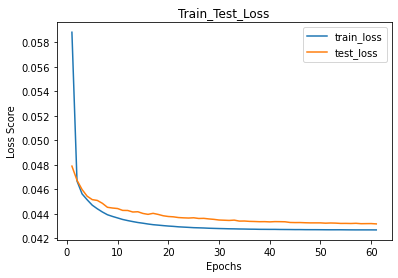

62
Train Epoch: 62 [0/7471 (0%)]	Loss: 0.042565
Train Epoch: 62 [160/7471 (2%)]	Loss: 0.042418
Train Epoch: 62 [320/7471 (4%)]	Loss: 0.042628
Train Epoch: 62 [480/7471 (6%)]	Loss: 0.043006
Train Epoch: 62 [640/7471 (9%)]	Loss: 0.042464
Train Epoch: 62 [800/7471 (11%)]	Loss: 0.042900
Train Epoch: 62 [960/7471 (13%)]	Loss: 0.042733
Train Epoch: 62 [1120/7471 (15%)]	Loss: 0.042776
Train Epoch: 62 [1280/7471 (17%)]	Loss: 0.042847
Train Epoch: 62 [1440/7471 (19%)]	Loss: 0.042456
Train Epoch: 62 [1600/7471 (21%)]	Loss: 0.042363
Train Epoch: 62 [1760/7471 (24%)]	Loss: 0.042751
Train Epoch: 62 [1920/7471 (26%)]	Loss: 0.042580
Train Epoch: 62 [2080/7471 (28%)]	Loss: 0.042536
Train Epoch: 62 [2240/7471 (30%)]	Loss: 0.042636
Train Epoch: 62 [2400/7471 (32%)]	Loss: 0.042498
Train Epoch: 62 [2560/7471 (34%)]	Loss: 0.042623
Train Epoch: 62 [2720/7471 (36%)]	Loss: 0.042870
Train Epoch: 62 [2880/7471 (39%)]	Loss: 0.042954
Train Epoch: 62 [3040/7471 (41%)]	Loss: 0.042719
Train Epoch: 62 [3200/7471 (43%

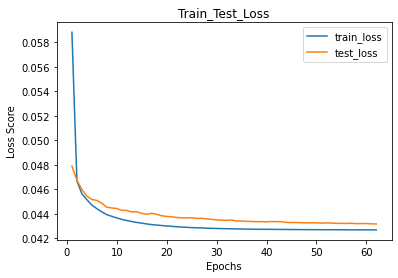

63
Train Epoch: 63 [0/7471 (0%)]	Loss: 0.043019
Train Epoch: 63 [160/7471 (2%)]	Loss: 0.042160
Train Epoch: 63 [320/7471 (4%)]	Loss: 0.042761
Train Epoch: 63 [480/7471 (6%)]	Loss: 0.042501
Train Epoch: 63 [640/7471 (9%)]	Loss: 0.042746
Train Epoch: 63 [800/7471 (11%)]	Loss: 0.042753
Train Epoch: 63 [960/7471 (13%)]	Loss: 0.042995
Train Epoch: 63 [1120/7471 (15%)]	Loss: 0.042879
Train Epoch: 63 [1280/7471 (17%)]	Loss: 0.042401
Train Epoch: 63 [1440/7471 (19%)]	Loss: 0.042852
Train Epoch: 63 [1600/7471 (21%)]	Loss: 0.042670
Train Epoch: 63 [1760/7471 (24%)]	Loss: 0.042963
Train Epoch: 63 [1920/7471 (26%)]	Loss: 0.042749
Train Epoch: 63 [2080/7471 (28%)]	Loss: 0.042536
Train Epoch: 63 [2240/7471 (30%)]	Loss: 0.042864
Train Epoch: 63 [2400/7471 (32%)]	Loss: 0.042435
Train Epoch: 63 [2560/7471 (34%)]	Loss: 0.042729
Train Epoch: 63 [2720/7471 (36%)]	Loss: 0.042978
Train Epoch: 63 [2880/7471 (39%)]	Loss: 0.042895
Train Epoch: 63 [3040/7471 (41%)]	Loss: 0.042655
Train Epoch: 63 [3200/7471 (43%

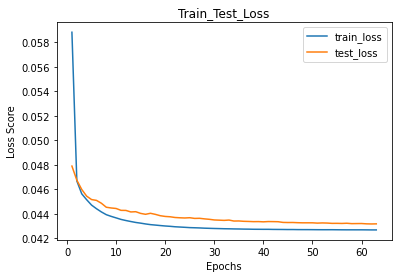

64
Train Epoch: 64 [0/7471 (0%)]	Loss: 0.042876
Train Epoch: 64 [160/7471 (2%)]	Loss: 0.042621
Train Epoch: 64 [320/7471 (4%)]	Loss: 0.042638
Train Epoch: 64 [480/7471 (6%)]	Loss: 0.042695
Train Epoch: 64 [640/7471 (9%)]	Loss: 0.042452
Train Epoch: 64 [800/7471 (11%)]	Loss: 0.042668
Train Epoch: 64 [960/7471 (13%)]	Loss: 0.042487
Train Epoch: 64 [1120/7471 (15%)]	Loss: 0.042915
Train Epoch: 64 [1280/7471 (17%)]	Loss: 0.042713
Train Epoch: 64 [1440/7471 (19%)]	Loss: 0.042474
Train Epoch: 64 [1600/7471 (21%)]	Loss: 0.042897
Train Epoch: 64 [1760/7471 (24%)]	Loss: 0.042624
Train Epoch: 64 [1920/7471 (26%)]	Loss: 0.042731
Train Epoch: 64 [2080/7471 (28%)]	Loss: 0.042984
Train Epoch: 64 [2240/7471 (30%)]	Loss: 0.042436
Train Epoch: 64 [2400/7471 (32%)]	Loss: 0.042693
Train Epoch: 64 [2560/7471 (34%)]	Loss: 0.042840
Train Epoch: 64 [2720/7471 (36%)]	Loss: 0.042110
Train Epoch: 64 [2880/7471 (39%)]	Loss: 0.042682
Train Epoch: 64 [3040/7471 (41%)]	Loss: 0.042678
Train Epoch: 64 [3200/7471 (43%

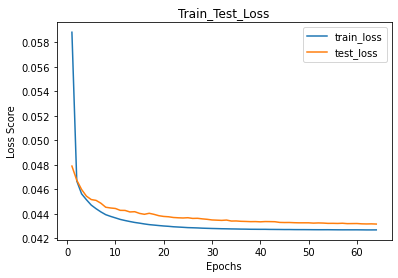

65
Train Epoch: 65 [0/7471 (0%)]	Loss: 0.042789
Train Epoch: 65 [160/7471 (2%)]	Loss: 0.043107
Train Epoch: 65 [320/7471 (4%)]	Loss: 0.043055
Train Epoch: 65 [480/7471 (6%)]	Loss: 0.043057
Train Epoch: 65 [640/7471 (9%)]	Loss: 0.043084
Train Epoch: 65 [800/7471 (11%)]	Loss: 0.042747
Train Epoch: 65 [960/7471 (13%)]	Loss: 0.042873
Train Epoch: 65 [1120/7471 (15%)]	Loss: 0.042833
Train Epoch: 65 [1280/7471 (17%)]	Loss: 0.042336
Train Epoch: 65 [1440/7471 (19%)]	Loss: 0.042806
Train Epoch: 65 [1600/7471 (21%)]	Loss: 0.042720
Train Epoch: 65 [1760/7471 (24%)]	Loss: 0.043032
Train Epoch: 65 [1920/7471 (26%)]	Loss: 0.042471
Train Epoch: 65 [2080/7471 (28%)]	Loss: 0.042828
Train Epoch: 65 [2240/7471 (30%)]	Loss: 0.042728
Train Epoch: 65 [2400/7471 (32%)]	Loss: 0.042667
Train Epoch: 65 [2560/7471 (34%)]	Loss: 0.042631
Train Epoch: 65 [2720/7471 (36%)]	Loss: 0.042872
Train Epoch: 65 [2880/7471 (39%)]	Loss: 0.042293
Train Epoch: 65 [3040/7471 (41%)]	Loss: 0.042737
Train Epoch: 65 [3200/7471 (43%

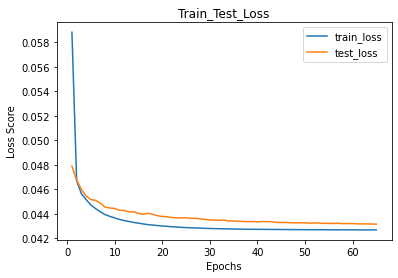

66
Train Epoch: 66 [0/7471 (0%)]	Loss: 0.042815
Train Epoch: 66 [160/7471 (2%)]	Loss: 0.042692
Train Epoch: 66 [320/7471 (4%)]	Loss: 0.041886
Train Epoch: 66 [480/7471 (6%)]	Loss: 0.042305
Train Epoch: 66 [640/7471 (9%)]	Loss: 0.042756
Train Epoch: 66 [800/7471 (11%)]	Loss: 0.042516
Train Epoch: 66 [960/7471 (13%)]	Loss: 0.042676
Train Epoch: 66 [1120/7471 (15%)]	Loss: 0.042651
Train Epoch: 66 [1280/7471 (17%)]	Loss: 0.042629
Train Epoch: 66 [1440/7471 (19%)]	Loss: 0.042747
Train Epoch: 66 [1600/7471 (21%)]	Loss: 0.042666
Train Epoch: 66 [1760/7471 (24%)]	Loss: 0.042917
Train Epoch: 66 [1920/7471 (26%)]	Loss: 0.042666
Train Epoch: 66 [2080/7471 (28%)]	Loss: 0.042421
Train Epoch: 66 [2240/7471 (30%)]	Loss: 0.043045
Train Epoch: 66 [2400/7471 (32%)]	Loss: 0.042723
Train Epoch: 66 [2560/7471 (34%)]	Loss: 0.042694
Train Epoch: 66 [2720/7471 (36%)]	Loss: 0.042833
Train Epoch: 66 [2880/7471 (39%)]	Loss: 0.042723
Train Epoch: 66 [3040/7471 (41%)]	Loss: 0.042139
Train Epoch: 66 [3200/7471 (43%

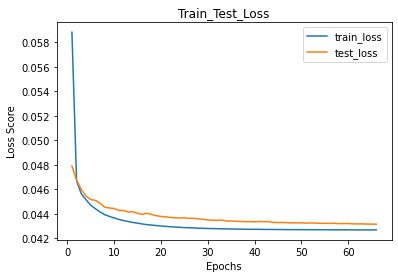

67
Train Epoch: 67 [0/7471 (0%)]	Loss: 0.042869
Train Epoch: 67 [160/7471 (2%)]	Loss: 0.042572
Train Epoch: 67 [320/7471 (4%)]	Loss: 0.042510
Train Epoch: 67 [480/7471 (6%)]	Loss: 0.042633
Train Epoch: 67 [640/7471 (9%)]	Loss: 0.042650
Train Epoch: 67 [800/7471 (11%)]	Loss: 0.042494
Train Epoch: 67 [960/7471 (13%)]	Loss: 0.042926
Train Epoch: 67 [1120/7471 (15%)]	Loss: 0.042988
Train Epoch: 67 [1280/7471 (17%)]	Loss: 0.042688
Train Epoch: 67 [1440/7471 (19%)]	Loss: 0.042521
Train Epoch: 67 [1600/7471 (21%)]	Loss: 0.042629
Train Epoch: 67 [1760/7471 (24%)]	Loss: 0.042757
Train Epoch: 67 [1920/7471 (26%)]	Loss: 0.042540
Train Epoch: 67 [2080/7471 (28%)]	Loss: 0.042363
Train Epoch: 67 [2240/7471 (30%)]	Loss: 0.042819
Train Epoch: 67 [2400/7471 (32%)]	Loss: 0.042844
Train Epoch: 67 [2560/7471 (34%)]	Loss: 0.042263
Train Epoch: 67 [2720/7471 (36%)]	Loss: 0.043175
Train Epoch: 67 [2880/7471 (39%)]	Loss: 0.042930
Train Epoch: 67 [3040/7471 (41%)]	Loss: 0.042471
Train Epoch: 67 [3200/7471 (43%

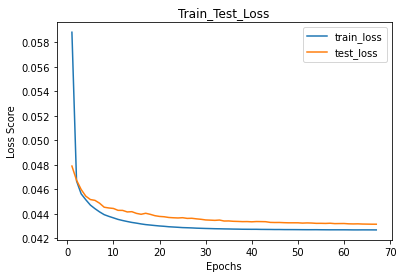

68
Train Epoch: 68 [0/7471 (0%)]	Loss: 0.042449
Train Epoch: 68 [160/7471 (2%)]	Loss: 0.042970
Train Epoch: 68 [320/7471 (4%)]	Loss: 0.043040
Train Epoch: 68 [480/7471 (6%)]	Loss: 0.042622
Train Epoch: 68 [640/7471 (9%)]	Loss: 0.042552
Train Epoch: 68 [800/7471 (11%)]	Loss: 0.042694
Train Epoch: 68 [960/7471 (13%)]	Loss: 0.042622
Train Epoch: 68 [1120/7471 (15%)]	Loss: 0.042506
Train Epoch: 68 [1280/7471 (17%)]	Loss: 0.042398
Train Epoch: 68 [1440/7471 (19%)]	Loss: 0.042433
Train Epoch: 68 [1600/7471 (21%)]	Loss: 0.042720
Train Epoch: 68 [1760/7471 (24%)]	Loss: 0.042667
Train Epoch: 68 [1920/7471 (26%)]	Loss: 0.042573
Train Epoch: 68 [2080/7471 (28%)]	Loss: 0.042701
Train Epoch: 68 [2240/7471 (30%)]	Loss: 0.042556
Train Epoch: 68 [2400/7471 (32%)]	Loss: 0.042903
Train Epoch: 68 [2560/7471 (34%)]	Loss: 0.042781
Train Epoch: 68 [2720/7471 (36%)]	Loss: 0.042642
Train Epoch: 68 [2880/7471 (39%)]	Loss: 0.042438
Train Epoch: 68 [3040/7471 (41%)]	Loss: 0.042532
Train Epoch: 68 [3200/7471 (43%

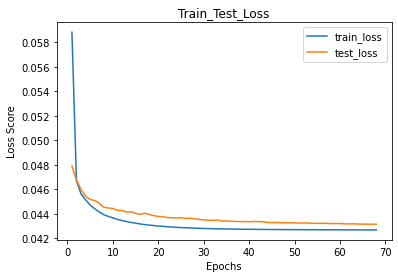

69
Train Epoch: 69 [0/7471 (0%)]	Loss: 0.042981
Train Epoch: 69 [160/7471 (2%)]	Loss: 0.042486
Train Epoch: 69 [320/7471 (4%)]	Loss: 0.043245
Train Epoch: 69 [480/7471 (6%)]	Loss: 0.042846
Train Epoch: 69 [640/7471 (9%)]	Loss: 0.042557
Train Epoch: 69 [800/7471 (11%)]	Loss: 0.042755
Train Epoch: 69 [960/7471 (13%)]	Loss: 0.042611
Train Epoch: 69 [1120/7471 (15%)]	Loss: 0.042432
Train Epoch: 69 [1280/7471 (17%)]	Loss: 0.042896
Train Epoch: 69 [1440/7471 (19%)]	Loss: 0.042772
Train Epoch: 69 [1600/7471 (21%)]	Loss: 0.042679
Train Epoch: 69 [1760/7471 (24%)]	Loss: 0.042924
Train Epoch: 69 [1920/7471 (26%)]	Loss: 0.042696
Train Epoch: 69 [2080/7471 (28%)]	Loss: 0.042900
Train Epoch: 69 [2240/7471 (30%)]	Loss: 0.042843
Train Epoch: 69 [2400/7471 (32%)]	Loss: 0.042562
Train Epoch: 69 [2560/7471 (34%)]	Loss: 0.042732
Train Epoch: 69 [2720/7471 (36%)]	Loss: 0.042871
Train Epoch: 69 [2880/7471 (39%)]	Loss: 0.042760
Train Epoch: 69 [3040/7471 (41%)]	Loss: 0.042797
Train Epoch: 69 [3200/7471 (43%

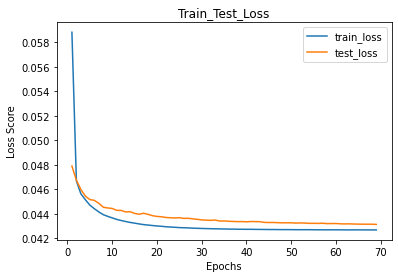

70
Train Epoch: 70 [0/7471 (0%)]	Loss: 0.042668
Train Epoch: 70 [160/7471 (2%)]	Loss: 0.042879
Train Epoch: 70 [320/7471 (4%)]	Loss: 0.042694
Train Epoch: 70 [480/7471 (6%)]	Loss: 0.042468
Train Epoch: 70 [640/7471 (9%)]	Loss: 0.042709
Train Epoch: 70 [800/7471 (11%)]	Loss: 0.043174
Train Epoch: 70 [960/7471 (13%)]	Loss: 0.042804
Train Epoch: 70 [1120/7471 (15%)]	Loss: 0.042673
Train Epoch: 70 [1280/7471 (17%)]	Loss: 0.042688
Train Epoch: 70 [1440/7471 (19%)]	Loss: 0.042336
Train Epoch: 70 [1600/7471 (21%)]	Loss: 0.042589
Train Epoch: 70 [1760/7471 (24%)]	Loss: 0.042297
Train Epoch: 70 [1920/7471 (26%)]	Loss: 0.042826
Train Epoch: 70 [2080/7471 (28%)]	Loss: 0.042914
Train Epoch: 70 [2240/7471 (30%)]	Loss: 0.042931
Train Epoch: 70 [2400/7471 (32%)]	Loss: 0.042263
Train Epoch: 70 [2560/7471 (34%)]	Loss: 0.042625
Train Epoch: 70 [2720/7471 (36%)]	Loss: 0.042766
Train Epoch: 70 [2880/7471 (39%)]	Loss: 0.042620
Train Epoch: 70 [3040/7471 (41%)]	Loss: 0.042580
Train Epoch: 70 [3200/7471 (43%

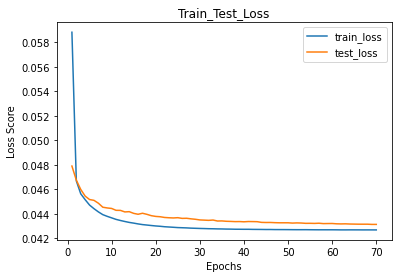

71
Train Epoch: 71 [0/7471 (0%)]	Loss: 0.042460
Train Epoch: 71 [160/7471 (2%)]	Loss: 0.042527
Train Epoch: 71 [320/7471 (4%)]	Loss: 0.042379
Train Epoch: 71 [480/7471 (6%)]	Loss: 0.042392
Train Epoch: 71 [640/7471 (9%)]	Loss: 0.042493
Train Epoch: 71 [800/7471 (11%)]	Loss: 0.042400
Train Epoch: 71 [960/7471 (13%)]	Loss: 0.042861
Train Epoch: 71 [1120/7471 (15%)]	Loss: 0.042721
Train Epoch: 71 [1280/7471 (17%)]	Loss: 0.042932
Train Epoch: 71 [1440/7471 (19%)]	Loss: 0.042671
Train Epoch: 71 [1600/7471 (21%)]	Loss: 0.042563
Train Epoch: 71 [1760/7471 (24%)]	Loss: 0.042767
Train Epoch: 71 [1920/7471 (26%)]	Loss: 0.042614
Train Epoch: 71 [2080/7471 (28%)]	Loss: 0.042415
Train Epoch: 71 [2240/7471 (30%)]	Loss: 0.042129
Train Epoch: 71 [2400/7471 (32%)]	Loss: 0.042804
Train Epoch: 71 [2560/7471 (34%)]	Loss: 0.042918
Train Epoch: 71 [2720/7471 (36%)]	Loss: 0.042502
Train Epoch: 71 [2880/7471 (39%)]	Loss: 0.042182
Train Epoch: 71 [3040/7471 (41%)]	Loss: 0.042758
Train Epoch: 71 [3200/7471 (43%

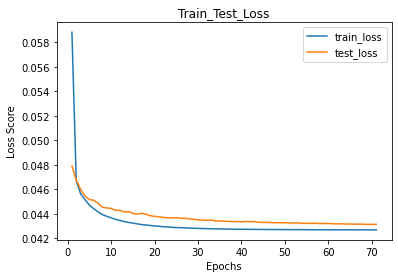

72
Train Epoch: 72 [0/7471 (0%)]	Loss: 0.042286
Train Epoch: 72 [160/7471 (2%)]	Loss: 0.042705
Train Epoch: 72 [320/7471 (4%)]	Loss: 0.042621
Train Epoch: 72 [480/7471 (6%)]	Loss: 0.042712
Train Epoch: 72 [640/7471 (9%)]	Loss: 0.042618
Train Epoch: 72 [800/7471 (11%)]	Loss: 0.042333
Train Epoch: 72 [960/7471 (13%)]	Loss: 0.042442
Train Epoch: 72 [1120/7471 (15%)]	Loss: 0.042980
Train Epoch: 72 [1280/7471 (17%)]	Loss: 0.042733
Train Epoch: 72 [1440/7471 (19%)]	Loss: 0.042677
Train Epoch: 72 [1600/7471 (21%)]	Loss: 0.042590
Train Epoch: 72 [1760/7471 (24%)]	Loss: 0.042434
Train Epoch: 72 [1920/7471 (26%)]	Loss: 0.042575
Train Epoch: 72 [2080/7471 (28%)]	Loss: 0.042565
Train Epoch: 72 [2240/7471 (30%)]	Loss: 0.042598
Train Epoch: 72 [2400/7471 (32%)]	Loss: 0.042433
Train Epoch: 72 [2560/7471 (34%)]	Loss: 0.042674
Train Epoch: 72 [2720/7471 (36%)]	Loss: 0.042800
Train Epoch: 72 [2880/7471 (39%)]	Loss: 0.042702
Train Epoch: 72 [3040/7471 (41%)]	Loss: 0.042602
Train Epoch: 72 [3200/7471 (43%

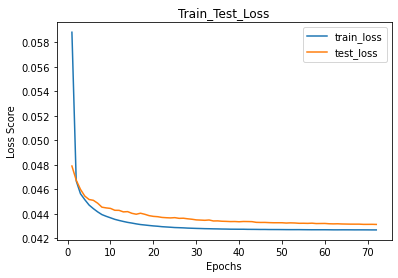

73
Train Epoch: 73 [0/7471 (0%)]	Loss: 0.043063
Train Epoch: 73 [160/7471 (2%)]	Loss: 0.042796
Train Epoch: 73 [320/7471 (4%)]	Loss: 0.042945
Train Epoch: 73 [480/7471 (6%)]	Loss: 0.041922
Train Epoch: 73 [640/7471 (9%)]	Loss: 0.042443
Train Epoch: 73 [800/7471 (11%)]	Loss: 0.042699
Train Epoch: 73 [960/7471 (13%)]	Loss: 0.042505
Train Epoch: 73 [1120/7471 (15%)]	Loss: 0.042628
Train Epoch: 73 [1280/7471 (17%)]	Loss: 0.042700
Train Epoch: 73 [1440/7471 (19%)]	Loss: 0.042607
Train Epoch: 73 [1600/7471 (21%)]	Loss: 0.042859
Train Epoch: 73 [1760/7471 (24%)]	Loss: 0.043010
Train Epoch: 73 [1920/7471 (26%)]	Loss: 0.042268
Train Epoch: 73 [2080/7471 (28%)]	Loss: 0.042756
Train Epoch: 73 [2240/7471 (30%)]	Loss: 0.042771
Train Epoch: 73 [2400/7471 (32%)]	Loss: 0.042696
Train Epoch: 73 [2560/7471 (34%)]	Loss: 0.042481
Train Epoch: 73 [2720/7471 (36%)]	Loss: 0.043041
Train Epoch: 73 [2880/7471 (39%)]	Loss: 0.042728
Train Epoch: 73 [3040/7471 (41%)]	Loss: 0.042676
Train Epoch: 73 [3200/7471 (43%

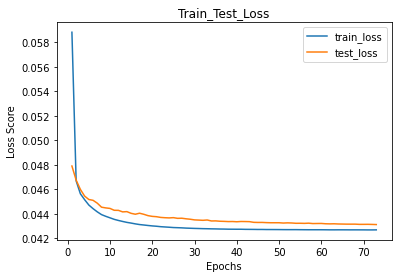

74
Train Epoch: 74 [0/7471 (0%)]	Loss: 0.042702
Train Epoch: 74 [160/7471 (2%)]	Loss: 0.042703
Train Epoch: 74 [320/7471 (4%)]	Loss: 0.042524
Train Epoch: 74 [480/7471 (6%)]	Loss: 0.042847
Train Epoch: 74 [640/7471 (9%)]	Loss: 0.042520
Train Epoch: 74 [800/7471 (11%)]	Loss: 0.042981
Train Epoch: 74 [960/7471 (13%)]	Loss: 0.042884
Train Epoch: 74 [1120/7471 (15%)]	Loss: 0.042903
Train Epoch: 74 [1280/7471 (17%)]	Loss: 0.042712
Train Epoch: 74 [1440/7471 (19%)]	Loss: 0.042302
Train Epoch: 74 [1600/7471 (21%)]	Loss: 0.042453
Train Epoch: 74 [1760/7471 (24%)]	Loss: 0.042949
Train Epoch: 74 [1920/7471 (26%)]	Loss: 0.042914
Train Epoch: 74 [2080/7471 (28%)]	Loss: 0.042769
Train Epoch: 74 [2240/7471 (30%)]	Loss: 0.042184
Train Epoch: 74 [2400/7471 (32%)]	Loss: 0.042826
Train Epoch: 74 [2560/7471 (34%)]	Loss: 0.042632
Train Epoch: 74 [2720/7471 (36%)]	Loss: 0.042696
Train Epoch: 74 [2880/7471 (39%)]	Loss: 0.042887
Train Epoch: 74 [3040/7471 (41%)]	Loss: 0.042956
Train Epoch: 74 [3200/7471 (43%

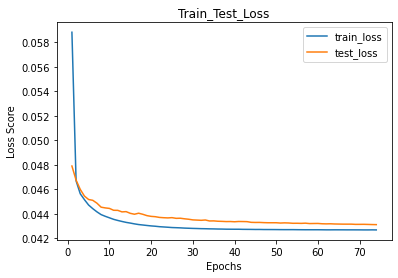

75
Train Epoch: 75 [0/7471 (0%)]	Loss: 0.042941
Train Epoch: 75 [160/7471 (2%)]	Loss: 0.042855
Train Epoch: 75 [320/7471 (4%)]	Loss: 0.042582
Train Epoch: 75 [480/7471 (6%)]	Loss: 0.042873
Train Epoch: 75 [640/7471 (9%)]	Loss: 0.042497
Train Epoch: 75 [800/7471 (11%)]	Loss: 0.043009
Train Epoch: 75 [960/7471 (13%)]	Loss: 0.042877
Train Epoch: 75 [1120/7471 (15%)]	Loss: 0.042988
Train Epoch: 75 [1280/7471 (17%)]	Loss: 0.042794
Train Epoch: 75 [1440/7471 (19%)]	Loss: 0.042678
Train Epoch: 75 [1600/7471 (21%)]	Loss: 0.042882
Train Epoch: 75 [1760/7471 (24%)]	Loss: 0.042026
Train Epoch: 75 [1920/7471 (26%)]	Loss: 0.042276
Train Epoch: 75 [2080/7471 (28%)]	Loss: 0.042644
Train Epoch: 75 [2240/7471 (30%)]	Loss: 0.042520
Train Epoch: 75 [2400/7471 (32%)]	Loss: 0.042879
Train Epoch: 75 [2560/7471 (34%)]	Loss: 0.042788
Train Epoch: 75 [2720/7471 (36%)]	Loss: 0.042757
Train Epoch: 75 [2880/7471 (39%)]	Loss: 0.042987
Train Epoch: 75 [3040/7471 (41%)]	Loss: 0.042221
Train Epoch: 75 [3200/7471 (43%

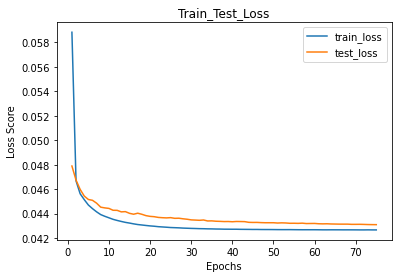

76
Train Epoch: 76 [0/7471 (0%)]	Loss: 0.042714
Train Epoch: 76 [160/7471 (2%)]	Loss: 0.042635
Train Epoch: 76 [320/7471 (4%)]	Loss: 0.042621
Train Epoch: 76 [480/7471 (6%)]	Loss: 0.042661
Train Epoch: 76 [640/7471 (9%)]	Loss: 0.042519
Train Epoch: 76 [800/7471 (11%)]	Loss: 0.042493
Train Epoch: 76 [960/7471 (13%)]	Loss: 0.041740
Train Epoch: 76 [1120/7471 (15%)]	Loss: 0.042253
Train Epoch: 76 [1280/7471 (17%)]	Loss: 0.043150
Train Epoch: 76 [1440/7471 (19%)]	Loss: 0.042795
Train Epoch: 76 [1600/7471 (21%)]	Loss: 0.042045
Train Epoch: 76 [1760/7471 (24%)]	Loss: 0.042464
Train Epoch: 76 [1920/7471 (26%)]	Loss: 0.042518
Train Epoch: 76 [2080/7471 (28%)]	Loss: 0.042616
Train Epoch: 76 [2240/7471 (30%)]	Loss: 0.042370
Train Epoch: 76 [2400/7471 (32%)]	Loss: 0.043134
Train Epoch: 76 [2560/7471 (34%)]	Loss: 0.042821
Train Epoch: 76 [2720/7471 (36%)]	Loss: 0.042633
Train Epoch: 76 [2880/7471 (39%)]	Loss: 0.042860
Train Epoch: 76 [3040/7471 (41%)]	Loss: 0.042617
Train Epoch: 76 [3200/7471 (43%

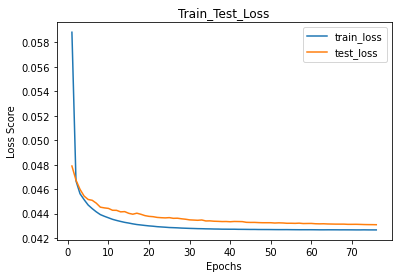

77
Train Epoch: 77 [0/7471 (0%)]	Loss: 0.042874
Train Epoch: 77 [160/7471 (2%)]	Loss: 0.042763
Train Epoch: 77 [320/7471 (4%)]	Loss: 0.042225
Train Epoch: 77 [480/7471 (6%)]	Loss: 0.042959
Train Epoch: 77 [640/7471 (9%)]	Loss: 0.042514
Train Epoch: 77 [800/7471 (11%)]	Loss: 0.042643
Train Epoch: 77 [960/7471 (13%)]	Loss: 0.042473
Train Epoch: 77 [1120/7471 (15%)]	Loss: 0.042398
Train Epoch: 77 [1280/7471 (17%)]	Loss: 0.042803
Train Epoch: 77 [1440/7471 (19%)]	Loss: 0.042711
Train Epoch: 77 [1600/7471 (21%)]	Loss: 0.042478
Train Epoch: 77 [1760/7471 (24%)]	Loss: 0.042805
Train Epoch: 77 [1920/7471 (26%)]	Loss: 0.042676
Train Epoch: 77 [2080/7471 (28%)]	Loss: 0.042472
Train Epoch: 77 [2240/7471 (30%)]	Loss: 0.042478
Train Epoch: 77 [2400/7471 (32%)]	Loss: 0.042677
Train Epoch: 77 [2560/7471 (34%)]	Loss: 0.042741
Train Epoch: 77 [2720/7471 (36%)]	Loss: 0.042477
Train Epoch: 77 [2880/7471 (39%)]	Loss: 0.043122
Train Epoch: 77 [3040/7471 (41%)]	Loss: 0.042513
Train Epoch: 77 [3200/7471 (43%

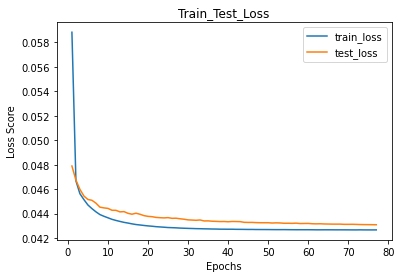

78
Train Epoch: 78 [0/7471 (0%)]	Loss: 0.042561
Train Epoch: 78 [160/7471 (2%)]	Loss: 0.042591
Train Epoch: 78 [320/7471 (4%)]	Loss: 0.042726
Train Epoch: 78 [480/7471 (6%)]	Loss: 0.042997
Train Epoch: 78 [640/7471 (9%)]	Loss: 0.042693
Train Epoch: 78 [800/7471 (11%)]	Loss: 0.042714
Train Epoch: 78 [960/7471 (13%)]	Loss: 0.042310
Train Epoch: 78 [1120/7471 (15%)]	Loss: 0.042509
Train Epoch: 78 [1280/7471 (17%)]	Loss: 0.042737
Train Epoch: 78 [1440/7471 (19%)]	Loss: 0.042132
Train Epoch: 78 [1600/7471 (21%)]	Loss: 0.042540
Train Epoch: 78 [1760/7471 (24%)]	Loss: 0.042906
Train Epoch: 78 [1920/7471 (26%)]	Loss: 0.042748
Train Epoch: 78 [2080/7471 (28%)]	Loss: 0.042327
Train Epoch: 78 [2240/7471 (30%)]	Loss: 0.042933
Train Epoch: 78 [2400/7471 (32%)]	Loss: 0.043011
Train Epoch: 78 [2560/7471 (34%)]	Loss: 0.042410
Train Epoch: 78 [2720/7471 (36%)]	Loss: 0.042802
Train Epoch: 78 [2880/7471 (39%)]	Loss: 0.042385
Train Epoch: 78 [3040/7471 (41%)]	Loss: 0.042406
Train Epoch: 78 [3200/7471 (43%

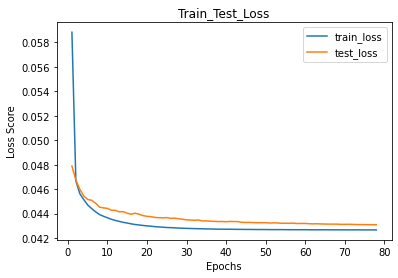

79
Train Epoch: 79 [0/7471 (0%)]	Loss: 0.042857
Train Epoch: 79 [160/7471 (2%)]	Loss: 0.042753
Train Epoch: 79 [320/7471 (4%)]	Loss: 0.042619
Train Epoch: 79 [480/7471 (6%)]	Loss: 0.042716
Train Epoch: 79 [640/7471 (9%)]	Loss: 0.042390
Train Epoch: 79 [800/7471 (11%)]	Loss: 0.042717
Train Epoch: 79 [960/7471 (13%)]	Loss: 0.042632
Train Epoch: 79 [1120/7471 (15%)]	Loss: 0.043010
Train Epoch: 79 [1280/7471 (17%)]	Loss: 0.042346
Train Epoch: 79 [1440/7471 (19%)]	Loss: 0.042866
Train Epoch: 79 [1600/7471 (21%)]	Loss: 0.042601
Train Epoch: 79 [1760/7471 (24%)]	Loss: 0.042865
Train Epoch: 79 [1920/7471 (26%)]	Loss: 0.042548
Train Epoch: 79 [2080/7471 (28%)]	Loss: 0.042548
Train Epoch: 79 [2240/7471 (30%)]	Loss: 0.042293
Train Epoch: 79 [2400/7471 (32%)]	Loss: 0.042594
Train Epoch: 79 [2560/7471 (34%)]	Loss: 0.042518
Train Epoch: 79 [2720/7471 (36%)]	Loss: 0.043071
Train Epoch: 79 [2880/7471 (39%)]	Loss: 0.042789
Train Epoch: 79 [3040/7471 (41%)]	Loss: 0.042645
Train Epoch: 79 [3200/7471 (43%

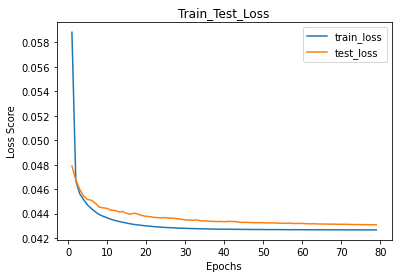

80
Train Epoch: 80 [0/7471 (0%)]	Loss: 0.042919
Train Epoch: 80 [160/7471 (2%)]	Loss: 0.042747
Train Epoch: 80 [320/7471 (4%)]	Loss: 0.042784
Train Epoch: 80 [480/7471 (6%)]	Loss: 0.042740
Train Epoch: 80 [640/7471 (9%)]	Loss: 0.042396
Train Epoch: 80 [800/7471 (11%)]	Loss: 0.042841
Train Epoch: 80 [960/7471 (13%)]	Loss: 0.042731
Train Epoch: 80 [1120/7471 (15%)]	Loss: 0.042666
Train Epoch: 80 [1280/7471 (17%)]	Loss: 0.042766
Train Epoch: 80 [1440/7471 (19%)]	Loss: 0.042527
Train Epoch: 80 [1600/7471 (21%)]	Loss: 0.042887
Train Epoch: 80 [1760/7471 (24%)]	Loss: 0.042736
Train Epoch: 80 [1920/7471 (26%)]	Loss: 0.042554
Train Epoch: 80 [2080/7471 (28%)]	Loss: 0.042878
Train Epoch: 80 [2240/7471 (30%)]	Loss: 0.042625
Train Epoch: 80 [2400/7471 (32%)]	Loss: 0.042176
Train Epoch: 80 [2560/7471 (34%)]	Loss: 0.042794
Train Epoch: 80 [2720/7471 (36%)]	Loss: 0.042937
Train Epoch: 80 [2880/7471 (39%)]	Loss: 0.042438
Train Epoch: 80 [3040/7471 (41%)]	Loss: 0.042549
Train Epoch: 80 [3200/7471 (43%

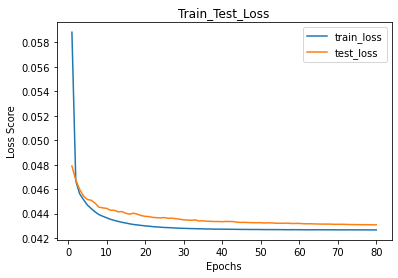

81
Train Epoch: 81 [0/7471 (0%)]	Loss: 0.042530
Train Epoch: 81 [160/7471 (2%)]	Loss: 0.042359
Train Epoch: 81 [320/7471 (4%)]	Loss: 0.042638
Train Epoch: 81 [480/7471 (6%)]	Loss: 0.043290
Train Epoch: 81 [640/7471 (9%)]	Loss: 0.042917
Train Epoch: 81 [800/7471 (11%)]	Loss: 0.042837
Train Epoch: 81 [960/7471 (13%)]	Loss: 0.042504
Train Epoch: 81 [1120/7471 (15%)]	Loss: 0.042687
Train Epoch: 81 [1280/7471 (17%)]	Loss: 0.042797
Train Epoch: 81 [1440/7471 (19%)]	Loss: 0.042750
Train Epoch: 81 [1600/7471 (21%)]	Loss: 0.042822
Train Epoch: 81 [1760/7471 (24%)]	Loss: 0.042528
Train Epoch: 81 [1920/7471 (26%)]	Loss: 0.043147
Train Epoch: 81 [2080/7471 (28%)]	Loss: 0.042815
Train Epoch: 81 [2240/7471 (30%)]	Loss: 0.042604
Train Epoch: 81 [2400/7471 (32%)]	Loss: 0.042581
Train Epoch: 81 [2560/7471 (34%)]	Loss: 0.042688
Train Epoch: 81 [2720/7471 (36%)]	Loss: 0.042248
Train Epoch: 81 [2880/7471 (39%)]	Loss: 0.042641
Train Epoch: 81 [3040/7471 (41%)]	Loss: 0.042947
Train Epoch: 81 [3200/7471 (43%

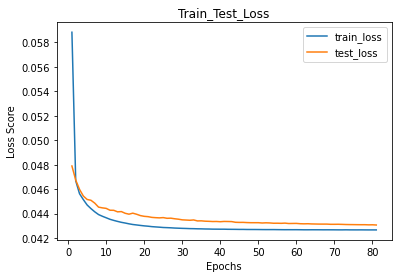

82
Train Epoch: 82 [0/7471 (0%)]	Loss: 0.042656
Train Epoch: 82 [160/7471 (2%)]	Loss: 0.042457
Train Epoch: 82 [320/7471 (4%)]	Loss: 0.042391
Train Epoch: 82 [480/7471 (6%)]	Loss: 0.042462
Train Epoch: 82 [640/7471 (9%)]	Loss: 0.042554
Train Epoch: 82 [800/7471 (11%)]	Loss: 0.042887
Train Epoch: 82 [960/7471 (13%)]	Loss: 0.042903
Train Epoch: 82 [1120/7471 (15%)]	Loss: 0.042792
Train Epoch: 82 [1280/7471 (17%)]	Loss: 0.042739
Train Epoch: 82 [1440/7471 (19%)]	Loss: 0.042701
Train Epoch: 82 [1600/7471 (21%)]	Loss: 0.042582
Train Epoch: 82 [1760/7471 (24%)]	Loss: 0.042464
Train Epoch: 82 [1920/7471 (26%)]	Loss: 0.042616
Train Epoch: 82 [2080/7471 (28%)]	Loss: 0.042752
Train Epoch: 82 [2240/7471 (30%)]	Loss: 0.042790
Train Epoch: 82 [2400/7471 (32%)]	Loss: 0.042506
Train Epoch: 82 [2560/7471 (34%)]	Loss: 0.042557
Train Epoch: 82 [2720/7471 (36%)]	Loss: 0.042609
Train Epoch: 82 [2880/7471 (39%)]	Loss: 0.042526
Train Epoch: 82 [3040/7471 (41%)]	Loss: 0.042015
Train Epoch: 82 [3200/7471 (43%

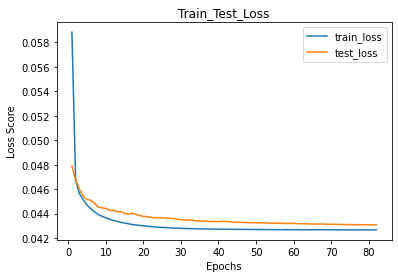

83
Train Epoch: 83 [0/7471 (0%)]	Loss: 0.042667
Train Epoch: 83 [160/7471 (2%)]	Loss: 0.042733
Train Epoch: 83 [320/7471 (4%)]	Loss: 0.042776
Train Epoch: 83 [480/7471 (6%)]	Loss: 0.042854
Train Epoch: 83 [640/7471 (9%)]	Loss: 0.042720
Train Epoch: 83 [800/7471 (11%)]	Loss: 0.042666
Train Epoch: 83 [960/7471 (13%)]	Loss: 0.042421
Train Epoch: 83 [1120/7471 (15%)]	Loss: 0.042927
Train Epoch: 83 [1280/7471 (17%)]	Loss: 0.042573
Train Epoch: 83 [1440/7471 (19%)]	Loss: 0.042905
Train Epoch: 83 [1600/7471 (21%)]	Loss: 0.042455
Train Epoch: 83 [1760/7471 (24%)]	Loss: 0.042818
Train Epoch: 83 [1920/7471 (26%)]	Loss: 0.042702
Train Epoch: 83 [2080/7471 (28%)]	Loss: 0.042210
Train Epoch: 83 [2240/7471 (30%)]	Loss: 0.042758
Train Epoch: 83 [2400/7471 (32%)]	Loss: 0.042785
Train Epoch: 83 [2560/7471 (34%)]	Loss: 0.042289
Train Epoch: 83 [2720/7471 (36%)]	Loss: 0.042714
Train Epoch: 83 [2880/7471 (39%)]	Loss: 0.042428
Train Epoch: 83 [3040/7471 (41%)]	Loss: 0.042953
Train Epoch: 83 [3200/7471 (43%

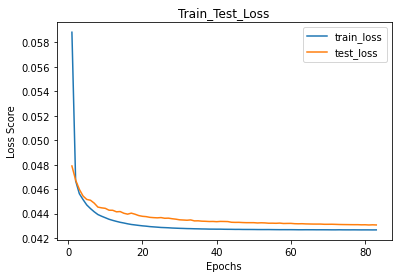

84
Train Epoch: 84 [0/7471 (0%)]	Loss: 0.042483
Train Epoch: 84 [160/7471 (2%)]	Loss: 0.042198
Train Epoch: 84 [320/7471 (4%)]	Loss: 0.042460
Train Epoch: 84 [480/7471 (6%)]	Loss: 0.042284
Train Epoch: 84 [640/7471 (9%)]	Loss: 0.042963
Train Epoch: 84 [800/7471 (11%)]	Loss: 0.042787
Train Epoch: 84 [960/7471 (13%)]	Loss: 0.042785
Train Epoch: 84 [1120/7471 (15%)]	Loss: 0.043089
Train Epoch: 84 [1280/7471 (17%)]	Loss: 0.042858
Train Epoch: 84 [1440/7471 (19%)]	Loss: 0.042559
Train Epoch: 84 [1600/7471 (21%)]	Loss: 0.042224
Train Epoch: 84 [1760/7471 (24%)]	Loss: 0.042618
Train Epoch: 84 [1920/7471 (26%)]	Loss: 0.042694
Train Epoch: 84 [2080/7471 (28%)]	Loss: 0.042606
Train Epoch: 84 [2240/7471 (30%)]	Loss: 0.042773
Train Epoch: 84 [2400/7471 (32%)]	Loss: 0.042840
Train Epoch: 84 [2560/7471 (34%)]	Loss: 0.042282
Train Epoch: 84 [2720/7471 (36%)]	Loss: 0.042571
Train Epoch: 84 [2880/7471 (39%)]	Loss: 0.042680
Train Epoch: 84 [3040/7471 (41%)]	Loss: 0.042307
Train Epoch: 84 [3200/7471 (43%

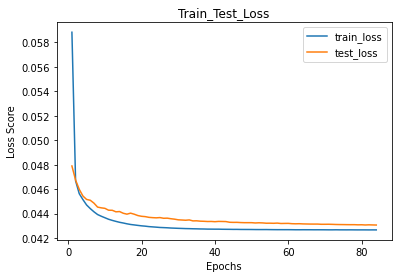

85
Train Epoch: 85 [0/7471 (0%)]	Loss: 0.042722
Train Epoch: 85 [160/7471 (2%)]	Loss: 0.042585
Train Epoch: 85 [320/7471 (4%)]	Loss: 0.042827
Train Epoch: 85 [480/7471 (6%)]	Loss: 0.042409
Train Epoch: 85 [640/7471 (9%)]	Loss: 0.042728
Train Epoch: 85 [800/7471 (11%)]	Loss: 0.043137
Train Epoch: 85 [960/7471 (13%)]	Loss: 0.043046
Train Epoch: 85 [1120/7471 (15%)]	Loss: 0.042620
Train Epoch: 85 [1280/7471 (17%)]	Loss: 0.042514
Train Epoch: 85 [1440/7471 (19%)]	Loss: 0.042571
Train Epoch: 85 [1600/7471 (21%)]	Loss: 0.042952
Train Epoch: 85 [1760/7471 (24%)]	Loss: 0.042699
Train Epoch: 85 [1920/7471 (26%)]	Loss: 0.042634
Train Epoch: 85 [2080/7471 (28%)]	Loss: 0.042381
Train Epoch: 85 [2240/7471 (30%)]	Loss: 0.042731
Train Epoch: 85 [2400/7471 (32%)]	Loss: 0.042327
Train Epoch: 85 [2560/7471 (34%)]	Loss: 0.042898
Train Epoch: 85 [2720/7471 (36%)]	Loss: 0.042496
Train Epoch: 85 [2880/7471 (39%)]	Loss: 0.042633
Train Epoch: 85 [3040/7471 (41%)]	Loss: 0.042871
Train Epoch: 85 [3200/7471 (43%

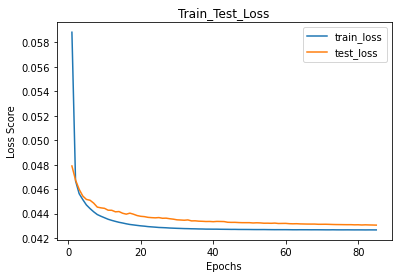

86
Train Epoch: 86 [0/7471 (0%)]	Loss: 0.042821
Train Epoch: 86 [160/7471 (2%)]	Loss: 0.042978
Train Epoch: 86 [320/7471 (4%)]	Loss: 0.042681
Train Epoch: 86 [480/7471 (6%)]	Loss: 0.042722
Train Epoch: 86 [640/7471 (9%)]	Loss: 0.042220
Train Epoch: 86 [800/7471 (11%)]	Loss: 0.042709
Train Epoch: 86 [960/7471 (13%)]	Loss: 0.042612
Train Epoch: 86 [1120/7471 (15%)]	Loss: 0.043134
Train Epoch: 86 [1280/7471 (17%)]	Loss: 0.042772
Train Epoch: 86 [1440/7471 (19%)]	Loss: 0.042734
Train Epoch: 86 [1600/7471 (21%)]	Loss: 0.042820
Train Epoch: 86 [1760/7471 (24%)]	Loss: 0.042597
Train Epoch: 86 [1920/7471 (26%)]	Loss: 0.042641
Train Epoch: 86 [2080/7471 (28%)]	Loss: 0.042419
Train Epoch: 86 [2240/7471 (30%)]	Loss: 0.042588
Train Epoch: 86 [2400/7471 (32%)]	Loss: 0.043131
Train Epoch: 86 [2560/7471 (34%)]	Loss: 0.042430
Train Epoch: 86 [2720/7471 (36%)]	Loss: 0.042857
Train Epoch: 86 [2880/7471 (39%)]	Loss: 0.042457
Train Epoch: 86 [3040/7471 (41%)]	Loss: 0.042803
Train Epoch: 86 [3200/7471 (43%

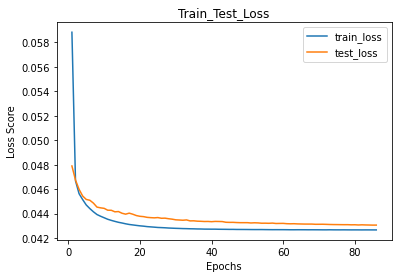

87
Train Epoch: 87 [0/7471 (0%)]	Loss: 0.042506
Train Epoch: 87 [160/7471 (2%)]	Loss: 0.042817
Train Epoch: 87 [320/7471 (4%)]	Loss: 0.042464
Train Epoch: 87 [480/7471 (6%)]	Loss: 0.042737
Train Epoch: 87 [640/7471 (9%)]	Loss: 0.042401
Train Epoch: 87 [800/7471 (11%)]	Loss: 0.042733
Train Epoch: 87 [960/7471 (13%)]	Loss: 0.042298
Train Epoch: 87 [1120/7471 (15%)]	Loss: 0.042889
Train Epoch: 87 [1280/7471 (17%)]	Loss: 0.042931
Train Epoch: 87 [1440/7471 (19%)]	Loss: 0.042911
Train Epoch: 87 [1600/7471 (21%)]	Loss: 0.042783
Train Epoch: 87 [1760/7471 (24%)]	Loss: 0.042619
Train Epoch: 87 [1920/7471 (26%)]	Loss: 0.042524
Train Epoch: 87 [2080/7471 (28%)]	Loss: 0.042405
Train Epoch: 87 [2240/7471 (30%)]	Loss: 0.042918
Train Epoch: 87 [2400/7471 (32%)]	Loss: 0.042908
Train Epoch: 87 [2560/7471 (34%)]	Loss: 0.042751
Train Epoch: 87 [2720/7471 (36%)]	Loss: 0.042807
Train Epoch: 87 [2880/7471 (39%)]	Loss: 0.042809
Train Epoch: 87 [3040/7471 (41%)]	Loss: 0.042084
Train Epoch: 87 [3200/7471 (43%

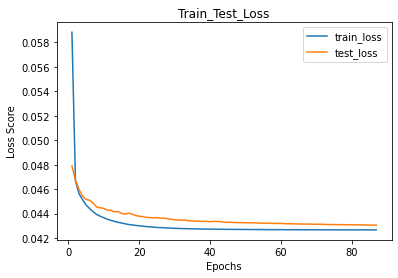

88
Train Epoch: 88 [0/7471 (0%)]	Loss: 0.042719
Train Epoch: 88 [160/7471 (2%)]	Loss: 0.042640
Train Epoch: 88 [320/7471 (4%)]	Loss: 0.043031
Train Epoch: 88 [480/7471 (6%)]	Loss: 0.042887
Train Epoch: 88 [640/7471 (9%)]	Loss: 0.042516
Train Epoch: 88 [800/7471 (11%)]	Loss: 0.042927
Train Epoch: 88 [960/7471 (13%)]	Loss: 0.042560
Train Epoch: 88 [1120/7471 (15%)]	Loss: 0.042731
Train Epoch: 88 [1280/7471 (17%)]	Loss: 0.043088
Train Epoch: 88 [1440/7471 (19%)]	Loss: 0.043056
Train Epoch: 88 [1600/7471 (21%)]	Loss: 0.042861
Train Epoch: 88 [1760/7471 (24%)]	Loss: 0.042310
Train Epoch: 88 [1920/7471 (26%)]	Loss: 0.042797
Train Epoch: 88 [2080/7471 (28%)]	Loss: 0.042117
Train Epoch: 88 [2240/7471 (30%)]	Loss: 0.042879
Train Epoch: 88 [2400/7471 (32%)]	Loss: 0.042858
Train Epoch: 88 [2560/7471 (34%)]	Loss: 0.042774
Train Epoch: 88 [2720/7471 (36%)]	Loss: 0.042830
Train Epoch: 88 [2880/7471 (39%)]	Loss: 0.042855
Train Epoch: 88 [3040/7471 (41%)]	Loss: 0.042465
Train Epoch: 88 [3200/7471 (43%

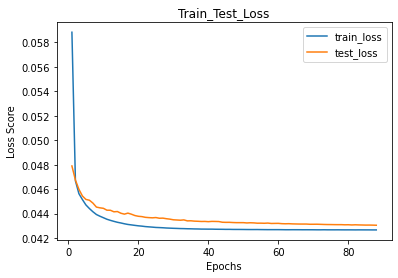

89
Train Epoch: 89 [0/7471 (0%)]	Loss: 0.042758
Train Epoch: 89 [160/7471 (2%)]	Loss: 0.042826
Train Epoch: 89 [320/7471 (4%)]	Loss: 0.042536
Train Epoch: 89 [480/7471 (6%)]	Loss: 0.042299
Train Epoch: 89 [640/7471 (9%)]	Loss: 0.042400
Train Epoch: 89 [800/7471 (11%)]	Loss: 0.042779
Train Epoch: 89 [960/7471 (13%)]	Loss: 0.042864
Train Epoch: 89 [1120/7471 (15%)]	Loss: 0.042775
Train Epoch: 89 [1280/7471 (17%)]	Loss: 0.042464
Train Epoch: 89 [1440/7471 (19%)]	Loss: 0.042562
Train Epoch: 89 [1600/7471 (21%)]	Loss: 0.042732
Train Epoch: 89 [1760/7471 (24%)]	Loss: 0.042502
Train Epoch: 89 [1920/7471 (26%)]	Loss: 0.042834
Train Epoch: 89 [2080/7471 (28%)]	Loss: 0.042710
Train Epoch: 89 [2240/7471 (30%)]	Loss: 0.042555
Train Epoch: 89 [2400/7471 (32%)]	Loss: 0.042251
Train Epoch: 89 [2560/7471 (34%)]	Loss: 0.043186
Train Epoch: 89 [2720/7471 (36%)]	Loss: 0.042716
Train Epoch: 89 [2880/7471 (39%)]	Loss: 0.042821
Train Epoch: 89 [3040/7471 (41%)]	Loss: 0.042934
Train Epoch: 89 [3200/7471 (43%

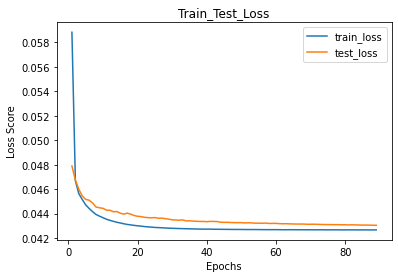

90
Train Epoch: 90 [0/7471 (0%)]	Loss: 0.042457
Train Epoch: 90 [160/7471 (2%)]	Loss: 0.042861
Train Epoch: 90 [320/7471 (4%)]	Loss: 0.042292
Train Epoch: 90 [480/7471 (6%)]	Loss: 0.042886
Train Epoch: 90 [640/7471 (9%)]	Loss: 0.042323
Train Epoch: 90 [800/7471 (11%)]	Loss: 0.042736
Train Epoch: 90 [960/7471 (13%)]	Loss: 0.042486
Train Epoch: 90 [1120/7471 (15%)]	Loss: 0.042865
Train Epoch: 90 [1280/7471 (17%)]	Loss: 0.042613
Train Epoch: 90 [1440/7471 (19%)]	Loss: 0.042983
Train Epoch: 90 [1600/7471 (21%)]	Loss: 0.042482
Train Epoch: 90 [1760/7471 (24%)]	Loss: 0.042261
Train Epoch: 90 [1920/7471 (26%)]	Loss: 0.042607
Train Epoch: 90 [2080/7471 (28%)]	Loss: 0.042994
Train Epoch: 90 [2240/7471 (30%)]	Loss: 0.042389
Train Epoch: 90 [2400/7471 (32%)]	Loss: 0.042855
Train Epoch: 90 [2560/7471 (34%)]	Loss: 0.042477
Train Epoch: 90 [2720/7471 (36%)]	Loss: 0.042620
Train Epoch: 90 [2880/7471 (39%)]	Loss: 0.042829
Train Epoch: 90 [3040/7471 (41%)]	Loss: 0.042653
Train Epoch: 90 [3200/7471 (43%

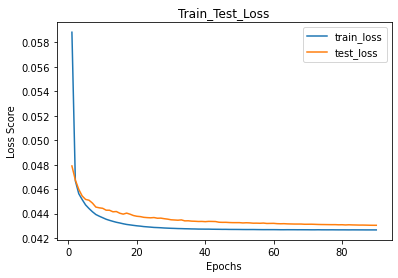

91
Train Epoch: 91 [0/7471 (0%)]	Loss: 0.042603
Train Epoch: 91 [160/7471 (2%)]	Loss: 0.042530
Train Epoch: 91 [320/7471 (4%)]	Loss: 0.043031
Train Epoch: 91 [480/7471 (6%)]	Loss: 0.042763
Train Epoch: 91 [640/7471 (9%)]	Loss: 0.042561
Train Epoch: 91 [800/7471 (11%)]	Loss: 0.042869
Train Epoch: 91 [960/7471 (13%)]	Loss: 0.042883
Train Epoch: 91 [1120/7471 (15%)]	Loss: 0.042381
Train Epoch: 91 [1280/7471 (17%)]	Loss: 0.042232
Train Epoch: 91 [1440/7471 (19%)]	Loss: 0.042767
Train Epoch: 91 [1600/7471 (21%)]	Loss: 0.042781
Train Epoch: 91 [1760/7471 (24%)]	Loss: 0.042773
Train Epoch: 91 [1920/7471 (26%)]	Loss: 0.042538
Train Epoch: 91 [2080/7471 (28%)]	Loss: 0.042618
Train Epoch: 91 [2240/7471 (30%)]	Loss: 0.042423
Train Epoch: 91 [2400/7471 (32%)]	Loss: 0.042798
Train Epoch: 91 [2560/7471 (34%)]	Loss: 0.042695
Train Epoch: 91 [2720/7471 (36%)]	Loss: 0.042867
Train Epoch: 91 [2880/7471 (39%)]	Loss: 0.042751
Train Epoch: 91 [3040/7471 (41%)]	Loss: 0.042538
Train Epoch: 91 [3200/7471 (43%

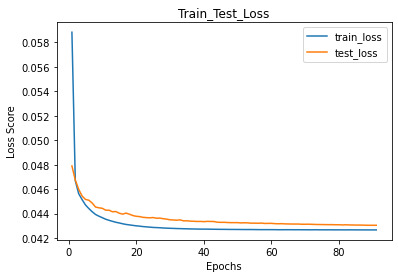

92
Train Epoch: 92 [0/7471 (0%)]	Loss: 0.042221
Train Epoch: 92 [160/7471 (2%)]	Loss: 0.043050
Train Epoch: 92 [320/7471 (4%)]	Loss: 0.042826
Train Epoch: 92 [480/7471 (6%)]	Loss: 0.042744
Train Epoch: 92 [640/7471 (9%)]	Loss: 0.042478
Train Epoch: 92 [800/7471 (11%)]	Loss: 0.042941
Train Epoch: 92 [960/7471 (13%)]	Loss: 0.042661
Train Epoch: 92 [1120/7471 (15%)]	Loss: 0.042446
Train Epoch: 92 [1280/7471 (17%)]	Loss: 0.042582
Train Epoch: 92 [1440/7471 (19%)]	Loss: 0.042778
Train Epoch: 92 [1600/7471 (21%)]	Loss: 0.043039
Train Epoch: 92 [1760/7471 (24%)]	Loss: 0.042831
Train Epoch: 92 [1920/7471 (26%)]	Loss: 0.043085
Train Epoch: 92 [2080/7471 (28%)]	Loss: 0.042500
Train Epoch: 92 [2240/7471 (30%)]	Loss: 0.042562
Train Epoch: 92 [2400/7471 (32%)]	Loss: 0.042616
Train Epoch: 92 [2560/7471 (34%)]	Loss: 0.042451
Train Epoch: 92 [2720/7471 (36%)]	Loss: 0.042790
Train Epoch: 92 [2880/7471 (39%)]	Loss: 0.042479
Train Epoch: 92 [3040/7471 (41%)]	Loss: 0.042483
Train Epoch: 92 [3200/7471 (43%

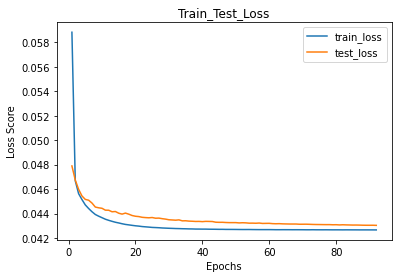

93
Train Epoch: 93 [0/7471 (0%)]	Loss: 0.042574
Train Epoch: 93 [160/7471 (2%)]	Loss: 0.042520
Train Epoch: 93 [320/7471 (4%)]	Loss: 0.042966
Train Epoch: 93 [480/7471 (6%)]	Loss: 0.042525
Train Epoch: 93 [640/7471 (9%)]	Loss: 0.042470
Train Epoch: 93 [800/7471 (11%)]	Loss: 0.042777
Train Epoch: 93 [960/7471 (13%)]	Loss: 0.043168
Train Epoch: 93 [1120/7471 (15%)]	Loss: 0.042527
Train Epoch: 93 [1280/7471 (17%)]	Loss: 0.042643
Train Epoch: 93 [1440/7471 (19%)]	Loss: 0.042304
Train Epoch: 93 [1600/7471 (21%)]	Loss: 0.042617
Train Epoch: 93 [1760/7471 (24%)]	Loss: 0.042859
Train Epoch: 93 [1920/7471 (26%)]	Loss: 0.042656
Train Epoch: 93 [2080/7471 (28%)]	Loss: 0.042622
Train Epoch: 93 [2240/7471 (30%)]	Loss: 0.042530
Train Epoch: 93 [2400/7471 (32%)]	Loss: 0.042604
Train Epoch: 93 [2560/7471 (34%)]	Loss: 0.042715
Train Epoch: 93 [2720/7471 (36%)]	Loss: 0.042024
Train Epoch: 93 [2880/7471 (39%)]	Loss: 0.042950
Train Epoch: 93 [3040/7471 (41%)]	Loss: 0.042257
Train Epoch: 93 [3200/7471 (43%

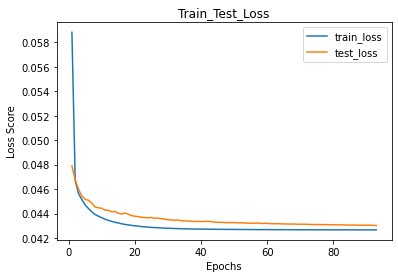

94
Train Epoch: 94 [0/7471 (0%)]	Loss: 0.042571
Train Epoch: 94 [160/7471 (2%)]	Loss: 0.042679
Train Epoch: 94 [320/7471 (4%)]	Loss: 0.042950
Train Epoch: 94 [480/7471 (6%)]	Loss: 0.042634
Train Epoch: 94 [640/7471 (9%)]	Loss: 0.042714
Train Epoch: 94 [800/7471 (11%)]	Loss: 0.042631
Train Epoch: 94 [960/7471 (13%)]	Loss: 0.042639
Train Epoch: 94 [1120/7471 (15%)]	Loss: 0.042832
Train Epoch: 94 [1280/7471 (17%)]	Loss: 0.042571
Train Epoch: 94 [1440/7471 (19%)]	Loss: 0.042399
Train Epoch: 94 [1600/7471 (21%)]	Loss: 0.042427
Train Epoch: 94 [1760/7471 (24%)]	Loss: 0.043002
Train Epoch: 94 [1920/7471 (26%)]	Loss: 0.042683
Train Epoch: 94 [2080/7471 (28%)]	Loss: 0.042576
Train Epoch: 94 [2240/7471 (30%)]	Loss: 0.042545
Train Epoch: 94 [2400/7471 (32%)]	Loss: 0.042421
Train Epoch: 94 [2560/7471 (34%)]	Loss: 0.042782
Train Epoch: 94 [2720/7471 (36%)]	Loss: 0.042831
Train Epoch: 94 [2880/7471 (39%)]	Loss: 0.042627
Train Epoch: 94 [3040/7471 (41%)]	Loss: 0.042846
Train Epoch: 94 [3200/7471 (43%

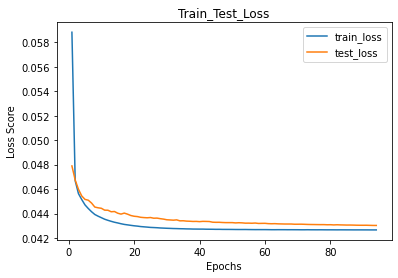

95
Train Epoch: 95 [0/7471 (0%)]	Loss: 0.042775
Train Epoch: 95 [160/7471 (2%)]	Loss: 0.042795
Train Epoch: 95 [320/7471 (4%)]	Loss: 0.042502
Train Epoch: 95 [480/7471 (6%)]	Loss: 0.042791
Train Epoch: 95 [640/7471 (9%)]	Loss: 0.042844
Train Epoch: 95 [800/7471 (11%)]	Loss: 0.043131
Train Epoch: 95 [960/7471 (13%)]	Loss: 0.042805
Train Epoch: 95 [1120/7471 (15%)]	Loss: 0.042392
Train Epoch: 95 [1280/7471 (17%)]	Loss: 0.042374
Train Epoch: 95 [1440/7471 (19%)]	Loss: 0.042450
Train Epoch: 95 [1600/7471 (21%)]	Loss: 0.042331
Train Epoch: 95 [1760/7471 (24%)]	Loss: 0.042730
Train Epoch: 95 [1920/7471 (26%)]	Loss: 0.042391
Train Epoch: 95 [2080/7471 (28%)]	Loss: 0.042985
Train Epoch: 95 [2240/7471 (30%)]	Loss: 0.042594
Train Epoch: 95 [2400/7471 (32%)]	Loss: 0.042692
Train Epoch: 95 [2560/7471 (34%)]	Loss: 0.042300
Train Epoch: 95 [2720/7471 (36%)]	Loss: 0.042474
Train Epoch: 95 [2880/7471 (39%)]	Loss: 0.042740
Train Epoch: 95 [3040/7471 (41%)]	Loss: 0.042487
Train Epoch: 95 [3200/7471 (43%

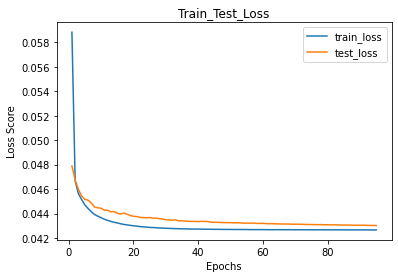

96
Train Epoch: 96 [0/7471 (0%)]	Loss: 0.042680
Train Epoch: 96 [160/7471 (2%)]	Loss: 0.042425
Train Epoch: 96 [320/7471 (4%)]	Loss: 0.042225
Train Epoch: 96 [480/7471 (6%)]	Loss: 0.042794
Train Epoch: 96 [640/7471 (9%)]	Loss: 0.042225
Train Epoch: 96 [800/7471 (11%)]	Loss: 0.042606
Train Epoch: 96 [960/7471 (13%)]	Loss: 0.042714
Train Epoch: 96 [1120/7471 (15%)]	Loss: 0.042777
Train Epoch: 96 [1280/7471 (17%)]	Loss: 0.042517
Train Epoch: 96 [1440/7471 (19%)]	Loss: 0.042860
Train Epoch: 96 [1600/7471 (21%)]	Loss: 0.042528
Train Epoch: 96 [1760/7471 (24%)]	Loss: 0.042688
Train Epoch: 96 [1920/7471 (26%)]	Loss: 0.042927
Train Epoch: 96 [2080/7471 (28%)]	Loss: 0.042539
Train Epoch: 96 [2240/7471 (30%)]	Loss: 0.042954
Train Epoch: 96 [2400/7471 (32%)]	Loss: 0.042430
Train Epoch: 96 [2560/7471 (34%)]	Loss: 0.043023
Train Epoch: 96 [2720/7471 (36%)]	Loss: 0.042837
Train Epoch: 96 [2880/7471 (39%)]	Loss: 0.042519
Train Epoch: 96 [3040/7471 (41%)]	Loss: 0.043056
Train Epoch: 96 [3200/7471 (43%

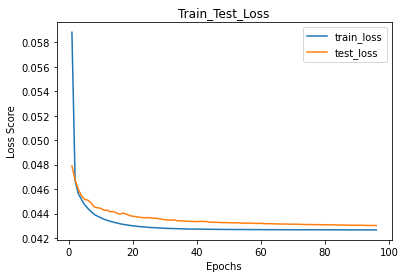

97
Train Epoch: 97 [0/7471 (0%)]	Loss: 0.041954
Train Epoch: 97 [160/7471 (2%)]	Loss: 0.043012
Train Epoch: 97 [320/7471 (4%)]	Loss: 0.042695
Train Epoch: 97 [480/7471 (6%)]	Loss: 0.042526
Train Epoch: 97 [640/7471 (9%)]	Loss: 0.042845
Train Epoch: 97 [800/7471 (11%)]	Loss: 0.042482
Train Epoch: 97 [960/7471 (13%)]	Loss: 0.042561
Train Epoch: 97 [1120/7471 (15%)]	Loss: 0.042436
Train Epoch: 97 [1280/7471 (17%)]	Loss: 0.042882
Train Epoch: 97 [1440/7471 (19%)]	Loss: 0.042765
Train Epoch: 97 [1600/7471 (21%)]	Loss: 0.042707
Train Epoch: 97 [1760/7471 (24%)]	Loss: 0.042645
Train Epoch: 97 [1920/7471 (26%)]	Loss: 0.042810
Train Epoch: 97 [2080/7471 (28%)]	Loss: 0.042547
Train Epoch: 97 [2240/7471 (30%)]	Loss: 0.042583
Train Epoch: 97 [2400/7471 (32%)]	Loss: 0.042773
Train Epoch: 97 [2560/7471 (34%)]	Loss: 0.042554
Train Epoch: 97 [2720/7471 (36%)]	Loss: 0.042552
Train Epoch: 97 [2880/7471 (39%)]	Loss: 0.042121
Train Epoch: 97 [3040/7471 (41%)]	Loss: 0.042566
Train Epoch: 97 [3200/7471 (43%

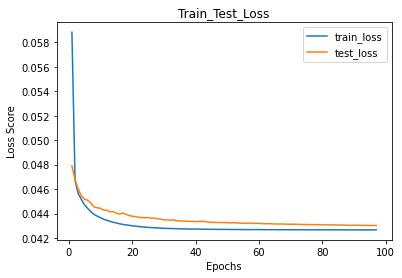

98
Train Epoch: 98 [0/7471 (0%)]	Loss: 0.042862
Train Epoch: 98 [160/7471 (2%)]	Loss: 0.042838
Train Epoch: 98 [320/7471 (4%)]	Loss: 0.042598
Train Epoch: 98 [480/7471 (6%)]	Loss: 0.042571
Train Epoch: 98 [640/7471 (9%)]	Loss: 0.042792
Train Epoch: 98 [800/7471 (11%)]	Loss: 0.043259
Train Epoch: 98 [960/7471 (13%)]	Loss: 0.042383
Train Epoch: 98 [1120/7471 (15%)]	Loss: 0.042958
Train Epoch: 98 [1280/7471 (17%)]	Loss: 0.042471
Train Epoch: 98 [1440/7471 (19%)]	Loss: 0.042374
Train Epoch: 98 [1600/7471 (21%)]	Loss: 0.042318
Train Epoch: 98 [1760/7471 (24%)]	Loss: 0.042904
Train Epoch: 98 [1920/7471 (26%)]	Loss: 0.042024
Train Epoch: 98 [2080/7471 (28%)]	Loss: 0.042521
Train Epoch: 98 [2240/7471 (30%)]	Loss: 0.042616
Train Epoch: 98 [2400/7471 (32%)]	Loss: 0.042645
Train Epoch: 98 [2560/7471 (34%)]	Loss: 0.042620
Train Epoch: 98 [2720/7471 (36%)]	Loss: 0.042671
Train Epoch: 98 [2880/7471 (39%)]	Loss: 0.042575
Train Epoch: 98 [3040/7471 (41%)]	Loss: 0.042777
Train Epoch: 98 [3200/7471 (43%

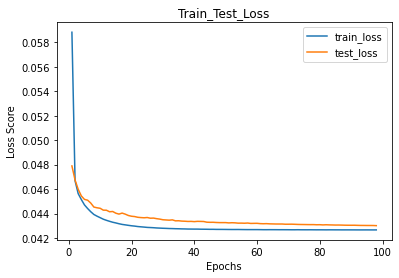

99
Train Epoch: 99 [0/7471 (0%)]	Loss: 0.042885
Train Epoch: 99 [160/7471 (2%)]	Loss: 0.042736
Train Epoch: 99 [320/7471 (4%)]	Loss: 0.042591
Train Epoch: 99 [480/7471 (6%)]	Loss: 0.042337
Train Epoch: 99 [640/7471 (9%)]	Loss: 0.042905
Train Epoch: 99 [800/7471 (11%)]	Loss: 0.042802
Train Epoch: 99 [960/7471 (13%)]	Loss: 0.042416
Train Epoch: 99 [1120/7471 (15%)]	Loss: 0.042587
Train Epoch: 99 [1280/7471 (17%)]	Loss: 0.042843
Train Epoch: 99 [1440/7471 (19%)]	Loss: 0.042716
Train Epoch: 99 [1600/7471 (21%)]	Loss: 0.043048
Train Epoch: 99 [1760/7471 (24%)]	Loss: 0.042163
Train Epoch: 99 [1920/7471 (26%)]	Loss: 0.042801
Train Epoch: 99 [2080/7471 (28%)]	Loss: 0.042779
Train Epoch: 99 [2240/7471 (30%)]	Loss: 0.042645
Train Epoch: 99 [2400/7471 (32%)]	Loss: 0.042914
Train Epoch: 99 [2560/7471 (34%)]	Loss: 0.042588
Train Epoch: 99 [2720/7471 (36%)]	Loss: 0.042821
Train Epoch: 99 [2880/7471 (39%)]	Loss: 0.042607
Train Epoch: 99 [3040/7471 (41%)]	Loss: 0.042520
Train Epoch: 99 [3200/7471 (43%

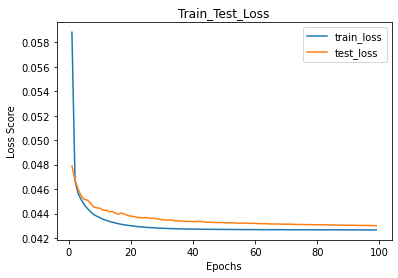

100
Train Epoch: 100 [0/7471 (0%)]	Loss: 0.042909
Train Epoch: 100 [160/7471 (2%)]	Loss: 0.042714
Train Epoch: 100 [320/7471 (4%)]	Loss: 0.042621
Train Epoch: 100 [480/7471 (6%)]	Loss: 0.042796
Train Epoch: 100 [640/7471 (9%)]	Loss: 0.042730
Train Epoch: 100 [800/7471 (11%)]	Loss: 0.042936
Train Epoch: 100 [960/7471 (13%)]	Loss: 0.042777
Train Epoch: 100 [1120/7471 (15%)]	Loss: 0.042895
Train Epoch: 100 [1280/7471 (17%)]	Loss: 0.042822
Train Epoch: 100 [1440/7471 (19%)]	Loss: 0.042483
Train Epoch: 100 [1600/7471 (21%)]	Loss: 0.042664
Train Epoch: 100 [1760/7471 (24%)]	Loss: 0.042671
Train Epoch: 100 [1920/7471 (26%)]	Loss: 0.042765
Train Epoch: 100 [2080/7471 (28%)]	Loss: 0.042717
Train Epoch: 100 [2240/7471 (30%)]	Loss: 0.042947
Train Epoch: 100 [2400/7471 (32%)]	Loss: 0.042832
Train Epoch: 100 [2560/7471 (34%)]	Loss: 0.042765
Train Epoch: 100 [2720/7471 (36%)]	Loss: 0.042788
Train Epoch: 100 [2880/7471 (39%)]	Loss: 0.042333
Train Epoch: 100 [3040/7471 (41%)]	Loss: 0.042621
Train Epoc

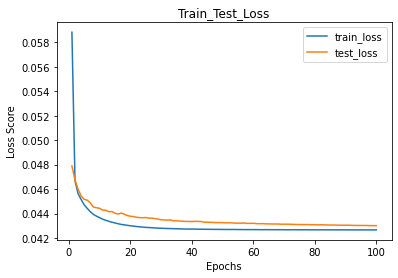

101
Train Epoch: 101 [0/7471 (0%)]	Loss: 0.042502
Train Epoch: 101 [160/7471 (2%)]	Loss: 0.042864
Train Epoch: 101 [320/7471 (4%)]	Loss: 0.042819
Train Epoch: 101 [480/7471 (6%)]	Loss: 0.043027
Train Epoch: 101 [640/7471 (9%)]	Loss: 0.042528
Train Epoch: 101 [800/7471 (11%)]	Loss: 0.042742
Train Epoch: 101 [960/7471 (13%)]	Loss: 0.042423
Train Epoch: 101 [1120/7471 (15%)]	Loss: 0.043023
Train Epoch: 101 [1280/7471 (17%)]	Loss: 0.042754
Train Epoch: 101 [1440/7471 (19%)]	Loss: 0.042852
Train Epoch: 101 [1600/7471 (21%)]	Loss: 0.042708
Train Epoch: 101 [1760/7471 (24%)]	Loss: 0.042710
Train Epoch: 101 [1920/7471 (26%)]	Loss: 0.041873
Train Epoch: 101 [2080/7471 (28%)]	Loss: 0.042751
Train Epoch: 101 [2240/7471 (30%)]	Loss: 0.042927
Train Epoch: 101 [2400/7471 (32%)]	Loss: 0.042757
Train Epoch: 101 [2560/7471 (34%)]	Loss: 0.042432
Train Epoch: 101 [2720/7471 (36%)]	Loss: 0.042905
Train Epoch: 101 [2880/7471 (39%)]	Loss: 0.042434
Train Epoch: 101 [3040/7471 (41%)]	Loss: 0.042938
Train Epoc

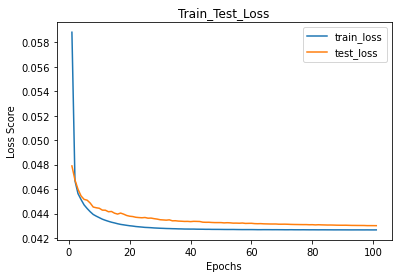

102
Train Epoch: 102 [0/7471 (0%)]	Loss: 0.043123
Train Epoch: 102 [160/7471 (2%)]	Loss: 0.042852
Train Epoch: 102 [320/7471 (4%)]	Loss: 0.042557
Train Epoch: 102 [480/7471 (6%)]	Loss: 0.042948
Train Epoch: 102 [640/7471 (9%)]	Loss: 0.042744
Train Epoch: 102 [800/7471 (11%)]	Loss: 0.042678
Train Epoch: 102 [960/7471 (13%)]	Loss: 0.042818
Train Epoch: 102 [1120/7471 (15%)]	Loss: 0.042713
Train Epoch: 102 [1280/7471 (17%)]	Loss: 0.042826
Train Epoch: 102 [1440/7471 (19%)]	Loss: 0.042604
Train Epoch: 102 [1600/7471 (21%)]	Loss: 0.042863
Train Epoch: 102 [1760/7471 (24%)]	Loss: 0.042725
Train Epoch: 102 [1920/7471 (26%)]	Loss: 0.042741
Train Epoch: 102 [2080/7471 (28%)]	Loss: 0.042549
Train Epoch: 102 [2240/7471 (30%)]	Loss: 0.042824
Train Epoch: 102 [2400/7471 (32%)]	Loss: 0.043033
Train Epoch: 102 [2560/7471 (34%)]	Loss: 0.042838
Train Epoch: 102 [2720/7471 (36%)]	Loss: 0.043025
Train Epoch: 102 [2880/7471 (39%)]	Loss: 0.042638
Train Epoch: 102 [3040/7471 (41%)]	Loss: 0.042553
Train Epoc

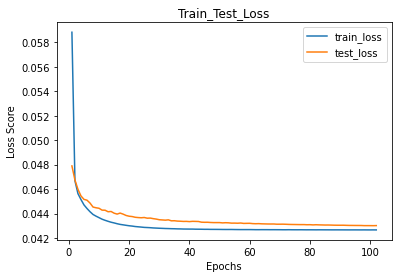

103
Train Epoch: 103 [0/7471 (0%)]	Loss: 0.043119
Train Epoch: 103 [160/7471 (2%)]	Loss: 0.042655
Train Epoch: 103 [320/7471 (4%)]	Loss: 0.042793
Train Epoch: 103 [480/7471 (6%)]	Loss: 0.042138
Train Epoch: 103 [640/7471 (9%)]	Loss: 0.042237
Train Epoch: 103 [800/7471 (11%)]	Loss: 0.042382
Train Epoch: 103 [960/7471 (13%)]	Loss: 0.042857
Train Epoch: 103 [1120/7471 (15%)]	Loss: 0.042397
Train Epoch: 103 [1280/7471 (17%)]	Loss: 0.042915
Train Epoch: 103 [1440/7471 (19%)]	Loss: 0.042983
Train Epoch: 103 [1600/7471 (21%)]	Loss: 0.042919
Train Epoch: 103 [1760/7471 (24%)]	Loss: 0.042849
Train Epoch: 103 [1920/7471 (26%)]	Loss: 0.042707
Train Epoch: 103 [2080/7471 (28%)]	Loss: 0.042374
Train Epoch: 103 [2240/7471 (30%)]	Loss: 0.042865
Train Epoch: 103 [2400/7471 (32%)]	Loss: 0.042295
Train Epoch: 103 [2560/7471 (34%)]	Loss: 0.042423
Train Epoch: 103 [2720/7471 (36%)]	Loss: 0.042949
Train Epoch: 103 [2880/7471 (39%)]	Loss: 0.042874
Train Epoch: 103 [3040/7471 (41%)]	Loss: 0.042414
Train Epoc

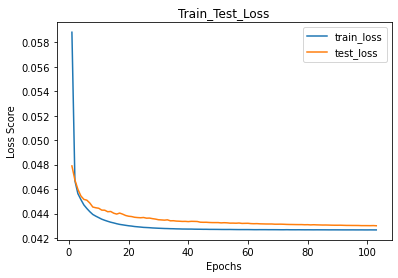

104
Train Epoch: 104 [0/7471 (0%)]	Loss: 0.042700
Train Epoch: 104 [160/7471 (2%)]	Loss: 0.042591
Train Epoch: 104 [320/7471 (4%)]	Loss: 0.042717
Train Epoch: 104 [480/7471 (6%)]	Loss: 0.042834
Train Epoch: 104 [640/7471 (9%)]	Loss: 0.042766
Train Epoch: 104 [800/7471 (11%)]	Loss: 0.042985
Train Epoch: 104 [960/7471 (13%)]	Loss: 0.042692
Train Epoch: 104 [1120/7471 (15%)]	Loss: 0.042395
Train Epoch: 104 [1280/7471 (17%)]	Loss: 0.042825
Train Epoch: 104 [1440/7471 (19%)]	Loss: 0.042787
Train Epoch: 104 [1600/7471 (21%)]	Loss: 0.042781
Train Epoch: 104 [1760/7471 (24%)]	Loss: 0.042741
Train Epoch: 104 [1920/7471 (26%)]	Loss: 0.042536
Train Epoch: 104 [2080/7471 (28%)]	Loss: 0.042395
Train Epoch: 104 [2240/7471 (30%)]	Loss: 0.042416
Train Epoch: 104 [2400/7471 (32%)]	Loss: 0.042779
Train Epoch: 104 [2560/7471 (34%)]	Loss: 0.042217
Train Epoch: 104 [2720/7471 (36%)]	Loss: 0.042507
Train Epoch: 104 [2880/7471 (39%)]	Loss: 0.042794
Train Epoch: 104 [3040/7471 (41%)]	Loss: 0.042603
Train Epoc

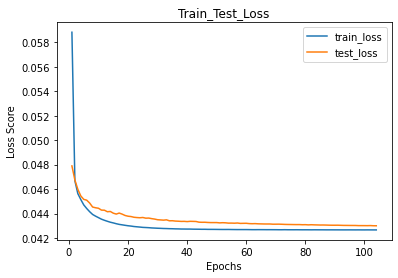

105
Train Epoch: 105 [0/7471 (0%)]	Loss: 0.042676
Train Epoch: 105 [160/7471 (2%)]	Loss: 0.042439
Train Epoch: 105 [320/7471 (4%)]	Loss: 0.043066
Train Epoch: 105 [480/7471 (6%)]	Loss: 0.042228
Train Epoch: 105 [640/7471 (9%)]	Loss: 0.042636
Train Epoch: 105 [800/7471 (11%)]	Loss: 0.042920
Train Epoch: 105 [960/7471 (13%)]	Loss: 0.042641
Train Epoch: 105 [1120/7471 (15%)]	Loss: 0.042448
Train Epoch: 105 [1280/7471 (17%)]	Loss: 0.042459
Train Epoch: 105 [1440/7471 (19%)]	Loss: 0.042732
Train Epoch: 105 [1600/7471 (21%)]	Loss: 0.042680
Train Epoch: 105 [1760/7471 (24%)]	Loss: 0.042513
Train Epoch: 105 [1920/7471 (26%)]	Loss: 0.042897
Train Epoch: 105 [2080/7471 (28%)]	Loss: 0.042782
Train Epoch: 105 [2240/7471 (30%)]	Loss: 0.042471
Train Epoch: 105 [2400/7471 (32%)]	Loss: 0.042733
Train Epoch: 105 [2560/7471 (34%)]	Loss: 0.042252
Train Epoch: 105 [2720/7471 (36%)]	Loss: 0.042527
Train Epoch: 105 [2880/7471 (39%)]	Loss: 0.042743
Train Epoch: 105 [3040/7471 (41%)]	Loss: 0.042708
Train Epoc

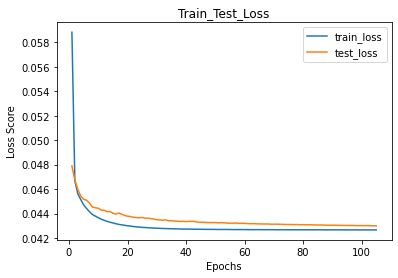

106
Train Epoch: 106 [0/7471 (0%)]	Loss: 0.042869
Train Epoch: 106 [160/7471 (2%)]	Loss: 0.042577
Train Epoch: 106 [320/7471 (4%)]	Loss: 0.042623
Train Epoch: 106 [480/7471 (6%)]	Loss: 0.042766
Train Epoch: 106 [640/7471 (9%)]	Loss: 0.042446
Train Epoch: 106 [800/7471 (11%)]	Loss: 0.042493
Train Epoch: 106 [960/7471 (13%)]	Loss: 0.042828
Train Epoch: 106 [1120/7471 (15%)]	Loss: 0.042758
Train Epoch: 106 [1280/7471 (17%)]	Loss: 0.043009
Train Epoch: 106 [1440/7471 (19%)]	Loss: 0.042877
Train Epoch: 106 [1600/7471 (21%)]	Loss: 0.042730
Train Epoch: 106 [1760/7471 (24%)]	Loss: 0.042617
Train Epoch: 106 [1920/7471 (26%)]	Loss: 0.042820
Train Epoch: 106 [2080/7471 (28%)]	Loss: 0.042740
Train Epoch: 106 [2240/7471 (30%)]	Loss: 0.042561
Train Epoch: 106 [2400/7471 (32%)]	Loss: 0.042443
Train Epoch: 106 [2560/7471 (34%)]	Loss: 0.042551
Train Epoch: 106 [2720/7471 (36%)]	Loss: 0.042736
Train Epoch: 106 [2880/7471 (39%)]	Loss: 0.042920
Train Epoch: 106 [3040/7471 (41%)]	Loss: 0.042559
Train Epoc

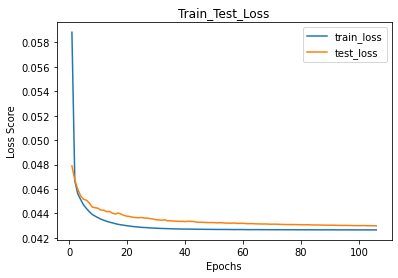

107
Train Epoch: 107 [0/7471 (0%)]	Loss: 0.042410
Train Epoch: 107 [160/7471 (2%)]	Loss: 0.042494
Train Epoch: 107 [320/7471 (4%)]	Loss: 0.042596
Train Epoch: 107 [480/7471 (6%)]	Loss: 0.042409
Train Epoch: 107 [640/7471 (9%)]	Loss: 0.042430
Train Epoch: 107 [800/7471 (11%)]	Loss: 0.042890
Train Epoch: 107 [960/7471 (13%)]	Loss: 0.042813
Train Epoch: 107 [1120/7471 (15%)]	Loss: 0.042473
Train Epoch: 107 [1280/7471 (17%)]	Loss: 0.042790
Train Epoch: 107 [1440/7471 (19%)]	Loss: 0.042697
Train Epoch: 107 [1600/7471 (21%)]	Loss: 0.042616
Train Epoch: 107 [1760/7471 (24%)]	Loss: 0.042637
Train Epoch: 107 [1920/7471 (26%)]	Loss: 0.042459
Train Epoch: 107 [2080/7471 (28%)]	Loss: 0.042902
Train Epoch: 107 [2240/7471 (30%)]	Loss: 0.042392
Train Epoch: 107 [2400/7471 (32%)]	Loss: 0.042323
Train Epoch: 107 [2560/7471 (34%)]	Loss: 0.042370
Train Epoch: 107 [2720/7471 (36%)]	Loss: 0.043109
Train Epoch: 107 [2880/7471 (39%)]	Loss: 0.042716
Train Epoch: 107 [3040/7471 (41%)]	Loss: 0.042107
Train Epoc

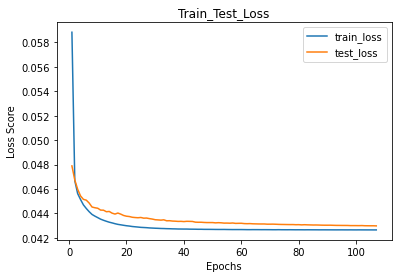

108
Train Epoch: 108 [0/7471 (0%)]	Loss: 0.042530
Train Epoch: 108 [160/7471 (2%)]	Loss: 0.042392
Train Epoch: 108 [320/7471 (4%)]	Loss: 0.042384
Train Epoch: 108 [480/7471 (6%)]	Loss: 0.042382
Train Epoch: 108 [640/7471 (9%)]	Loss: 0.042939
Train Epoch: 108 [800/7471 (11%)]	Loss: 0.042524
Train Epoch: 108 [960/7471 (13%)]	Loss: 0.042797
Train Epoch: 108 [1120/7471 (15%)]	Loss: 0.042484
Train Epoch: 108 [1280/7471 (17%)]	Loss: 0.042466
Train Epoch: 108 [1440/7471 (19%)]	Loss: 0.042383
Train Epoch: 108 [1600/7471 (21%)]	Loss: 0.042435
Train Epoch: 108 [1760/7471 (24%)]	Loss: 0.042706
Train Epoch: 108 [1920/7471 (26%)]	Loss: 0.042668
Train Epoch: 108 [2080/7471 (28%)]	Loss: 0.042666
Train Epoch: 108 [2240/7471 (30%)]	Loss: 0.043224
Train Epoch: 108 [2400/7471 (32%)]	Loss: 0.042942
Train Epoch: 108 [2560/7471 (34%)]	Loss: 0.042317
Train Epoch: 108 [2720/7471 (36%)]	Loss: 0.042546
Train Epoch: 108 [2880/7471 (39%)]	Loss: 0.042569
Train Epoch: 108 [3040/7471 (41%)]	Loss: 0.042429
Train Epoc

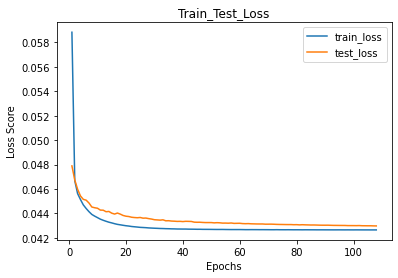

109
Train Epoch: 109 [0/7471 (0%)]	Loss: 0.042921
Train Epoch: 109 [160/7471 (2%)]	Loss: 0.042684
Train Epoch: 109 [320/7471 (4%)]	Loss: 0.042711
Train Epoch: 109 [480/7471 (6%)]	Loss: 0.042688
Train Epoch: 109 [640/7471 (9%)]	Loss: 0.042479
Train Epoch: 109 [800/7471 (11%)]	Loss: 0.042823
Train Epoch: 109 [960/7471 (13%)]	Loss: 0.042296
Train Epoch: 109 [1120/7471 (15%)]	Loss: 0.042808
Train Epoch: 109 [1280/7471 (17%)]	Loss: 0.042687
Train Epoch: 109 [1440/7471 (19%)]	Loss: 0.042203
Train Epoch: 109 [1600/7471 (21%)]	Loss: 0.042826
Train Epoch: 109 [1760/7471 (24%)]	Loss: 0.042863
Train Epoch: 109 [1920/7471 (26%)]	Loss: 0.042533
Train Epoch: 109 [2080/7471 (28%)]	Loss: 0.042789
Train Epoch: 109 [2240/7471 (30%)]	Loss: 0.042717
Train Epoch: 109 [2400/7471 (32%)]	Loss: 0.042728
Train Epoch: 109 [2560/7471 (34%)]	Loss: 0.042687
Train Epoch: 109 [2720/7471 (36%)]	Loss: 0.042728
Train Epoch: 109 [2880/7471 (39%)]	Loss: 0.043004
Train Epoch: 109 [3040/7471 (41%)]	Loss: 0.042457
Train Epoc

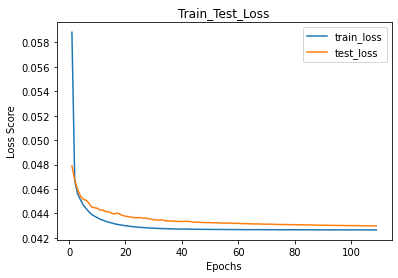

110
Train Epoch: 110 [0/7471 (0%)]	Loss: 0.042920
Train Epoch: 110 [160/7471 (2%)]	Loss: 0.042922
Train Epoch: 110 [320/7471 (4%)]	Loss: 0.042491
Train Epoch: 110 [480/7471 (6%)]	Loss: 0.042632
Train Epoch: 110 [640/7471 (9%)]	Loss: 0.043023
Train Epoch: 110 [800/7471 (11%)]	Loss: 0.042813
Train Epoch: 110 [960/7471 (13%)]	Loss: 0.042668
Train Epoch: 110 [1120/7471 (15%)]	Loss: 0.042277
Train Epoch: 110 [1280/7471 (17%)]	Loss: 0.042609
Train Epoch: 110 [1440/7471 (19%)]	Loss: 0.042604
Train Epoch: 110 [1600/7471 (21%)]	Loss: 0.042593
Train Epoch: 110 [1760/7471 (24%)]	Loss: 0.042619
Train Epoch: 110 [1920/7471 (26%)]	Loss: 0.042488
Train Epoch: 110 [2080/7471 (28%)]	Loss: 0.042327
Train Epoch: 110 [2240/7471 (30%)]	Loss: 0.042837
Train Epoch: 110 [2400/7471 (32%)]	Loss: 0.042881
Train Epoch: 110 [2560/7471 (34%)]	Loss: 0.042635
Train Epoch: 110 [2720/7471 (36%)]	Loss: 0.042842
Train Epoch: 110 [2880/7471 (39%)]	Loss: 0.042199
Train Epoch: 110 [3040/7471 (41%)]	Loss: 0.042815
Train Epoc

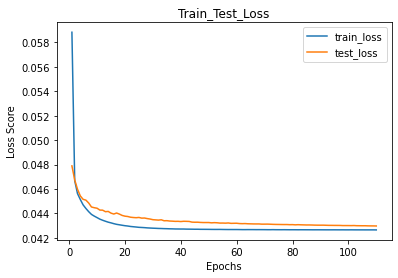

111
Train Epoch: 111 [0/7471 (0%)]	Loss: 0.042713
Train Epoch: 111 [160/7471 (2%)]	Loss: 0.042724
Train Epoch: 111 [320/7471 (4%)]	Loss: 0.042827
Train Epoch: 111 [480/7471 (6%)]	Loss: 0.042600
Train Epoch: 111 [640/7471 (9%)]	Loss: 0.042611
Train Epoch: 111 [800/7471 (11%)]	Loss: 0.042630
Train Epoch: 111 [960/7471 (13%)]	Loss: 0.042758
Train Epoch: 111 [1120/7471 (15%)]	Loss: 0.042301
Train Epoch: 111 [1280/7471 (17%)]	Loss: 0.041838
Train Epoch: 111 [1440/7471 (19%)]	Loss: 0.042463
Train Epoch: 111 [1600/7471 (21%)]	Loss: 0.042652
Train Epoch: 111 [1760/7471 (24%)]	Loss: 0.042432
Train Epoch: 111 [1920/7471 (26%)]	Loss: 0.042858
Train Epoch: 111 [2080/7471 (28%)]	Loss: 0.042736
Train Epoch: 111 [2240/7471 (30%)]	Loss: 0.042877
Train Epoch: 111 [2400/7471 (32%)]	Loss: 0.042585
Train Epoch: 111 [2560/7471 (34%)]	Loss: 0.042446
Train Epoch: 111 [2720/7471 (36%)]	Loss: 0.042127
Train Epoch: 111 [2880/7471 (39%)]	Loss: 0.042534
Train Epoch: 111 [3040/7471 (41%)]	Loss: 0.042648
Train Epoc

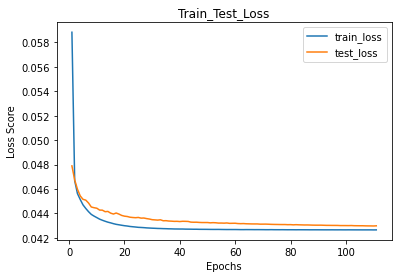

112
Train Epoch: 112 [0/7471 (0%)]	Loss: 0.042844
Train Epoch: 112 [160/7471 (2%)]	Loss: 0.042880
Train Epoch: 112 [320/7471 (4%)]	Loss: 0.042337
Train Epoch: 112 [480/7471 (6%)]	Loss: 0.042828
Train Epoch: 112 [640/7471 (9%)]	Loss: 0.042563
Train Epoch: 112 [800/7471 (11%)]	Loss: 0.042372
Train Epoch: 112 [960/7471 (13%)]	Loss: 0.042215
Train Epoch: 112 [1120/7471 (15%)]	Loss: 0.042521
Train Epoch: 112 [1280/7471 (17%)]	Loss: 0.042687
Train Epoch: 112 [1440/7471 (19%)]	Loss: 0.042735
Train Epoch: 112 [1600/7471 (21%)]	Loss: 0.042317
Train Epoch: 112 [1760/7471 (24%)]	Loss: 0.042748
Train Epoch: 112 [1920/7471 (26%)]	Loss: 0.042722
Train Epoch: 112 [2080/7471 (28%)]	Loss: 0.042713
Train Epoch: 112 [2240/7471 (30%)]	Loss: 0.042528
Train Epoch: 112 [2400/7471 (32%)]	Loss: 0.042823
Train Epoch: 112 [2560/7471 (34%)]	Loss: 0.042542
Train Epoch: 112 [2720/7471 (36%)]	Loss: 0.042756
Train Epoch: 112 [2880/7471 (39%)]	Loss: 0.042156
Train Epoch: 112 [3040/7471 (41%)]	Loss: 0.042675
Train Epoc

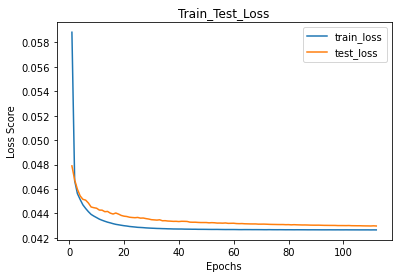

113
Train Epoch: 113 [0/7471 (0%)]	Loss: 0.042225
Train Epoch: 113 [160/7471 (2%)]	Loss: 0.042596
Train Epoch: 113 [320/7471 (4%)]	Loss: 0.042777
Train Epoch: 113 [480/7471 (6%)]	Loss: 0.042532
Train Epoch: 113 [640/7471 (9%)]	Loss: 0.042152
Train Epoch: 113 [800/7471 (11%)]	Loss: 0.042865
Train Epoch: 113 [960/7471 (13%)]	Loss: 0.042726
Train Epoch: 113 [1120/7471 (15%)]	Loss: 0.042883
Train Epoch: 113 [1280/7471 (17%)]	Loss: 0.042314
Train Epoch: 113 [1440/7471 (19%)]	Loss: 0.043027
Train Epoch: 113 [1600/7471 (21%)]	Loss: 0.043038
Train Epoch: 113 [1760/7471 (24%)]	Loss: 0.042680
Train Epoch: 113 [1920/7471 (26%)]	Loss: 0.042878
Train Epoch: 113 [2080/7471 (28%)]	Loss: 0.042558
Train Epoch: 113 [2240/7471 (30%)]	Loss: 0.042730
Train Epoch: 113 [2400/7471 (32%)]	Loss: 0.042998
Train Epoch: 113 [2560/7471 (34%)]	Loss: 0.042479
Train Epoch: 113 [2720/7471 (36%)]	Loss: 0.042602
Train Epoch: 113 [2880/7471 (39%)]	Loss: 0.042571
Train Epoch: 113 [3040/7471 (41%)]	Loss: 0.042662
Train Epoc

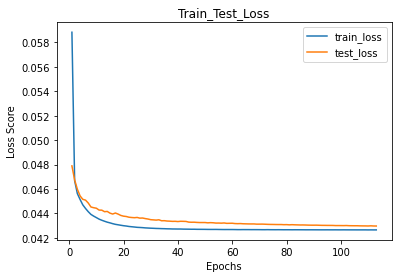

114
Train Epoch: 114 [0/7471 (0%)]	Loss: 0.042691
Train Epoch: 114 [160/7471 (2%)]	Loss: 0.042761
Train Epoch: 114 [320/7471 (4%)]	Loss: 0.042636
Train Epoch: 114 [480/7471 (6%)]	Loss: 0.042669
Train Epoch: 114 [640/7471 (9%)]	Loss: 0.043090
Train Epoch: 114 [800/7471 (11%)]	Loss: 0.042604
Train Epoch: 114 [960/7471 (13%)]	Loss: 0.042745
Train Epoch: 114 [1120/7471 (15%)]	Loss: 0.042646
Train Epoch: 114 [1280/7471 (17%)]	Loss: 0.042811
Train Epoch: 114 [1440/7471 (19%)]	Loss: 0.042433
Train Epoch: 114 [1600/7471 (21%)]	Loss: 0.042691
Train Epoch: 114 [1760/7471 (24%)]	Loss: 0.043152
Train Epoch: 114 [1920/7471 (26%)]	Loss: 0.042196
Train Epoch: 114 [2080/7471 (28%)]	Loss: 0.042669
Train Epoch: 114 [2240/7471 (30%)]	Loss: 0.042616
Train Epoch: 114 [2400/7471 (32%)]	Loss: 0.042704
Train Epoch: 114 [2560/7471 (34%)]	Loss: 0.042512
Train Epoch: 114 [2720/7471 (36%)]	Loss: 0.043150
Train Epoch: 114 [2880/7471 (39%)]	Loss: 0.042515
Train Epoch: 114 [3040/7471 (41%)]	Loss: 0.042744
Train Epoc

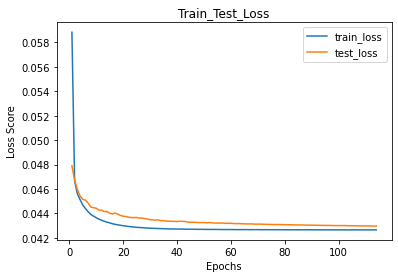

115
Train Epoch: 115 [0/7471 (0%)]	Loss: 0.042642
Train Epoch: 115 [160/7471 (2%)]	Loss: 0.042749
Train Epoch: 115 [320/7471 (4%)]	Loss: 0.042798
Train Epoch: 115 [480/7471 (6%)]	Loss: 0.042925
Train Epoch: 115 [640/7471 (9%)]	Loss: 0.042551
Train Epoch: 115 [800/7471 (11%)]	Loss: 0.043170
Train Epoch: 115 [960/7471 (13%)]	Loss: 0.042677
Train Epoch: 115 [1120/7471 (15%)]	Loss: 0.042224
Train Epoch: 115 [1280/7471 (17%)]	Loss: 0.042949
Train Epoch: 115 [1440/7471 (19%)]	Loss: 0.042295
Train Epoch: 115 [1600/7471 (21%)]	Loss: 0.042943
Train Epoch: 115 [1760/7471 (24%)]	Loss: 0.042647
Train Epoch: 115 [1920/7471 (26%)]	Loss: 0.042861
Train Epoch: 115 [2080/7471 (28%)]	Loss: 0.042353
Train Epoch: 115 [2240/7471 (30%)]	Loss: 0.043004
Train Epoch: 115 [2400/7471 (32%)]	Loss: 0.042638
Train Epoch: 115 [2560/7471 (34%)]	Loss: 0.042885
Train Epoch: 115 [2720/7471 (36%)]	Loss: 0.042923
Train Epoch: 115 [2880/7471 (39%)]	Loss: 0.042747
Train Epoch: 115 [3040/7471 (41%)]	Loss: 0.042416
Train Epoc

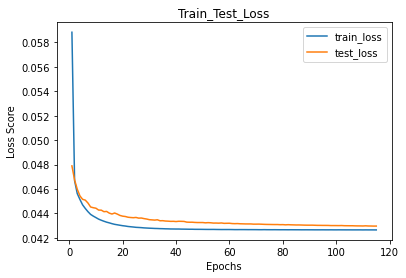

116
Train Epoch: 116 [0/7471 (0%)]	Loss: 0.042580
Train Epoch: 116 [160/7471 (2%)]	Loss: 0.042821
Train Epoch: 116 [320/7471 (4%)]	Loss: 0.042774
Train Epoch: 116 [480/7471 (6%)]	Loss: 0.042577
Train Epoch: 116 [640/7471 (9%)]	Loss: 0.042542
Train Epoch: 116 [800/7471 (11%)]	Loss: 0.042622
Train Epoch: 116 [960/7471 (13%)]	Loss: 0.043021
Train Epoch: 116 [1120/7471 (15%)]	Loss: 0.042018
Train Epoch: 116 [1280/7471 (17%)]	Loss: 0.042460
Train Epoch: 116 [1440/7471 (19%)]	Loss: 0.042385
Train Epoch: 116 [1600/7471 (21%)]	Loss: 0.042763
Train Epoch: 116 [1760/7471 (24%)]	Loss: 0.043021
Train Epoch: 116 [1920/7471 (26%)]	Loss: 0.042906
Train Epoch: 116 [2080/7471 (28%)]	Loss: 0.042829
Train Epoch: 116 [2240/7471 (30%)]	Loss: 0.042349
Train Epoch: 116 [2400/7471 (32%)]	Loss: 0.042824
Train Epoch: 116 [2560/7471 (34%)]	Loss: 0.043081
Train Epoch: 116 [2720/7471 (36%)]	Loss: 0.042849
Train Epoch: 116 [2880/7471 (39%)]	Loss: 0.042537
Train Epoch: 116 [3040/7471 (41%)]	Loss: 0.042517
Train Epoc

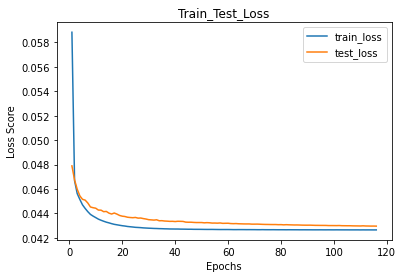

117
Train Epoch: 117 [0/7471 (0%)]	Loss: 0.042647
Train Epoch: 117 [160/7471 (2%)]	Loss: 0.042434
Train Epoch: 117 [320/7471 (4%)]	Loss: 0.042776
Train Epoch: 117 [480/7471 (6%)]	Loss: 0.042884
Train Epoch: 117 [640/7471 (9%)]	Loss: 0.042645
Train Epoch: 117 [800/7471 (11%)]	Loss: 0.042769
Train Epoch: 117 [960/7471 (13%)]	Loss: 0.042525
Train Epoch: 117 [1120/7471 (15%)]	Loss: 0.042622
Train Epoch: 117 [1280/7471 (17%)]	Loss: 0.042768
Train Epoch: 117 [1440/7471 (19%)]	Loss: 0.042530
Train Epoch: 117 [1600/7471 (21%)]	Loss: 0.042629
Train Epoch: 117 [1760/7471 (24%)]	Loss: 0.042635
Train Epoch: 117 [1920/7471 (26%)]	Loss: 0.042920
Train Epoch: 117 [2080/7471 (28%)]	Loss: 0.042407
Train Epoch: 117 [2240/7471 (30%)]	Loss: 0.042662
Train Epoch: 117 [2400/7471 (32%)]	Loss: 0.042971
Train Epoch: 117 [2560/7471 (34%)]	Loss: 0.042156
Train Epoch: 117 [2720/7471 (36%)]	Loss: 0.042824
Train Epoch: 117 [2880/7471 (39%)]	Loss: 0.042637
Train Epoch: 117 [3040/7471 (41%)]	Loss: 0.042357
Train Epoc

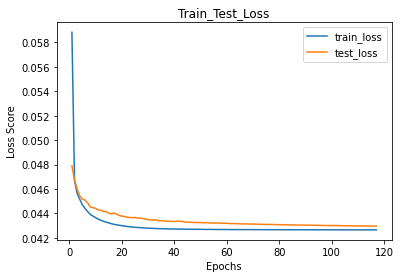

118
Train Epoch: 118 [0/7471 (0%)]	Loss: 0.042917
Train Epoch: 118 [160/7471 (2%)]	Loss: 0.042413
Train Epoch: 118 [320/7471 (4%)]	Loss: 0.042542
Train Epoch: 118 [480/7471 (6%)]	Loss: 0.042443
Train Epoch: 118 [640/7471 (9%)]	Loss: 0.042835
Train Epoch: 118 [800/7471 (11%)]	Loss: 0.042425
Train Epoch: 118 [960/7471 (13%)]	Loss: 0.042807
Train Epoch: 118 [1120/7471 (15%)]	Loss: 0.042363
Train Epoch: 118 [1280/7471 (17%)]	Loss: 0.042680
Train Epoch: 118 [1440/7471 (19%)]	Loss: 0.042449
Train Epoch: 118 [1600/7471 (21%)]	Loss: 0.042996
Train Epoch: 118 [1760/7471 (24%)]	Loss: 0.042631
Train Epoch: 118 [1920/7471 (26%)]	Loss: 0.042867
Train Epoch: 118 [2080/7471 (28%)]	Loss: 0.042167
Train Epoch: 118 [2240/7471 (30%)]	Loss: 0.042242
Train Epoch: 118 [2400/7471 (32%)]	Loss: 0.042687
Train Epoch: 118 [2560/7471 (34%)]	Loss: 0.042639
Train Epoch: 118 [2720/7471 (36%)]	Loss: 0.042863
Train Epoch: 118 [2880/7471 (39%)]	Loss: 0.042577
Train Epoch: 118 [3040/7471 (41%)]	Loss: 0.043031
Train Epoc

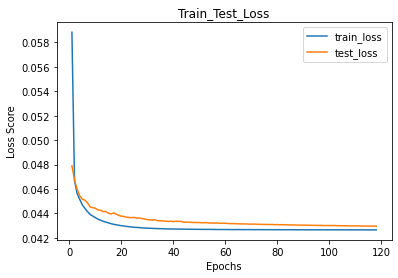

119
Train Epoch: 119 [0/7471 (0%)]	Loss: 0.042326
Train Epoch: 119 [160/7471 (2%)]	Loss: 0.042997
Train Epoch: 119 [320/7471 (4%)]	Loss: 0.042748
Train Epoch: 119 [480/7471 (6%)]	Loss: 0.042412
Train Epoch: 119 [640/7471 (9%)]	Loss: 0.042462
Train Epoch: 119 [800/7471 (11%)]	Loss: 0.042530
Train Epoch: 119 [960/7471 (13%)]	Loss: 0.042544
Train Epoch: 119 [1120/7471 (15%)]	Loss: 0.042569
Train Epoch: 119 [1280/7471 (17%)]	Loss: 0.042791
Train Epoch: 119 [1440/7471 (19%)]	Loss: 0.042489
Train Epoch: 119 [1600/7471 (21%)]	Loss: 0.042372
Train Epoch: 119 [1760/7471 (24%)]	Loss: 0.042297
Train Epoch: 119 [1920/7471 (26%)]	Loss: 0.042641
Train Epoch: 119 [2080/7471 (28%)]	Loss: 0.042642
Train Epoch: 119 [2240/7471 (30%)]	Loss: 0.042614
Train Epoch: 119 [2400/7471 (32%)]	Loss: 0.042982
Train Epoch: 119 [2560/7471 (34%)]	Loss: 0.042587
Train Epoch: 119 [2720/7471 (36%)]	Loss: 0.042729
Train Epoch: 119 [2880/7471 (39%)]	Loss: 0.042455
Train Epoch: 119 [3040/7471 (41%)]	Loss: 0.042696
Train Epoc

In [ ]:
epochs = 200


for epoch in range(1, epochs + 1):
        print(epoch)
        train(epoch)
        test(epoch)

        # change liveloss to my model
        # https://github.com/stared/livelossplot/blob/master/examples/pytorch.ipynb
        # https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php
        plt.plot(Epoch_Loss['train_epoch'],Epoch_Loss['train_loss'], label="train_loss")
        plt.plot(Epoch_Loss['test_epoch'],Epoch_Loss['test_loss'], label="test_loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss Score')
        plt.title('Train_Test_Loss')
        plt.legend()
        plt.savefig('./plot_Exp03/'+str(epoch)+'_epoch.png', dpi=300)
        plt.show()
    
        with torch.no_grad():
            sample = torch.randn(16, 100).to(device)  # Change it (64, 100) to (16, 100)
            sample = model.decode(sample).cpu()
            save_image(sample.view(16, 1, 224, 224),  # (64, 1, 224, 224) to (16, 1, 224, 224)
                       './results_Exp03/sample_' + str(epoch) + '.png')
        

In [ ]:
device = torch.device("cuda")
model = VAE()
model.load_state_dict(torch.load(PATH))
model.eval()
model.to(device)

IsADirectoryError: ignored

In [ ]:
! pwd

/content/drive/My Drive/InformationSecurity_Summer


In [ ]:
! ls

Exp01_10epochs_0628				 malimg
Exp01.VAE.ipynb					 results
Exp02.VAE-Change_Lossfunction_params_mean.ipynb  results_Exp02
Exp03.VAE-Change_lr_1e-5.ipynb			 results_Exp03


In [ ]:
'results_Exp03' == 'results_Exp03'

True

In [ ]:
! pwd

/content/drive/My Drive/InformationSecurity_Summer


In [ ]:
! ls

Exp01_10epochs_0628				 malimg
Exp01.VAE.ipynb					 results
Exp02.VAE-Change_Lossfunction_params_mean.ipynb  results_Exp02
Exp03.VAE-Change_lr_1e-5.ipynb			 results_Exp03


In [ ]:
model

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)

In [ ]:
## test torch.save(state_dict())

PATH = './results_Exp03/Exp03_model.pth'
torch.save(model.state_dict(), PATH)


In [ ]:
model = VAE()
model.load_state_dict(torch.load(PATH))
model.eval()

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)

In [ ]:
import visdom

ModuleNotFoundError: ignored

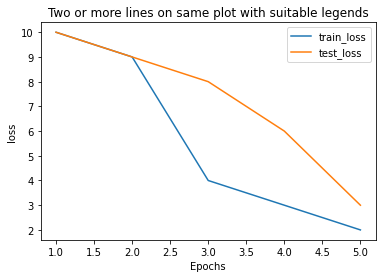

In [ ]:
import matplotlib.pyplot as plt

x1 = [1, 2, 3, 4, 5]
y1 = [10, 9, 4, 3, 2]

plt.plot(x1, y1, label="train_loss")

x2 = [1, 2, 3, 4, 5]
y2 = [10, 9, 8, 6, 3]

plt.plot(x2, y2, label='test_loss')

plt.xlabel('Epochs')
plt.ylabel('loss')

plt.title('Two or more lines on same plot with suitable legends')
plt.legend()

plt.savefig('./plot_Exp03/' +str(10)+'_epoch.png', dpi=300, bbox_inches='tight')
plt.show()

